In [2]:
import os
import pandas as pd
from datetime import datetime

# Function to extract the 10th date from an example folder
def extract_tenth_date(example_path):
    dates = []
    for file in os.listdir(example_path):
        if file.endswith('.txt'):
            date_str = file.split('.')[0]  # Extract YYYY-MM-DD from filename
            dates.append(date_str)

    # Sort dates chronologically
    dates.sort()

    # Return the 10th date if available
    if len(dates) >= 10:
        return dates[9]  # 0-indexed, so the 10th element is at index 9
    else:
        return None

# Function to process all examples in a directory
def process_directory(directory_path, stock_data):
    results = []

    for example_folder in os.listdir(directory_path):
        example_path = os.path.join(directory_path, example_folder)
        if os.path.isdir(example_path):
            tenth_date = extract_tenth_date(example_path)
            if tenth_date and tenth_date in stock_data.index:
                results.append(stock_data.loc[tenth_date])

    return pd.DataFrame(results)

# Main execution
def main(all_stock_path, train_dir, test_dir, val_dir):
    # Load stock data
    stock_data = pd.read_csv(all_stock_path, index_col=0)

    # Process each directory
    train_data = process_directory(train_dir, stock_data)
    test_data = process_directory(test_dir, stock_data)
    val_data = process_directory(val_dir, stock_data)

    # Save results
    train_data.to_csv('train.csv')
    test_data.to_csv('test.csv')
    val_data.to_csv('val.csv')

    print(f"Generated train.csv with {len(train_data)} entries")
    print(f"Generated test.csv with {len(test_data)} entries")
    print(f"Generated val.csv with {len(val_data)} entries")

# Replace these paths with your actual paths
all_stock_path = '/kaggle/input/results/stock_prices_complete.csv'
train_dir = '/kaggle/input/results/results/processed_dataset_v2/train'
test_dir = '/kaggle/input/results/results/processed_dataset_v2/test'
val_dir = '/kaggle/input/results/results/processed_dataset_v2/val'

main(all_stock_path, train_dir, test_dir, val_dir)

Generated train.csv with 340 entries
Generated test.csv with 42 entries
Generated val.csv with 44 entries


Using device: cuda
Creating datasets...
Loading embeddings from /kaggle/input/qwerty/train_embeddings_9x312.pt
Loading stock data from /kaggle/working/train.csv
Loading stock price data from /kaggle/working/train.csv...
CSV structure sample:
   Unnamed: 0  Adj Close  Adj Close.1  Adj Close.2  Adj Close.3  Adj Close.4  \
0  2018-01-14  41.614857    65.260002    56.263508    178.52858   221.229996   

       Close    Close.1    Close.2     Close.3  ...     Open.1     Open.2  \
0  44.272499  65.260002  56.532501  179.369995  ...  63.669498  55.505001   

       Open.3      Open.4       Volume     Volume.1    Volume.2    Volume.3  \
0  178.059998  217.179993  101672400.0  108874000.0  38586000.0  77551300.0   

    Volume.4  is_business_day  
0  8199400.0            False  

[1 rows x 32 columns]
CSV columns: ['Unnamed: 0', 'Adj Close', 'Adj Close.1', 'Adj Close.2', 'Adj Close.3', 'Adj Close.4', 'Close', 'Close.1', 'Close.2', 'Close.3', 'Close.4', 'High', 'High.1', 'High.2', 'High.3', 'Hig

/tmp/ipykernel_31/506184467.py:817: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.embeddings = torch.load(self.embeddings_path)
/tmp/ipykernel_31/506184467.py:817: Futu

Using device: cuda
Model parameters: 15777998
Fitting output normalizer...
Fitting output normalizer...
Output normalizer fitted successfully!
Starting training...
Normalization layer fitted: False
No denormalization applied: return_denormalized = False is_output_fitted = True
Normalization layer fitted: True
No denormalization applied: return_denormalized = False is_output_fitted = True
Normalization layer fitted: True
No denormalization applied: return_denormalized = False is_output_fitted = True
Normalization layer fitted: True
No denormalization applied: return_denormalized = False is_output_fitted = True
Normalization layer fitted: True
No denormalization applied: return_denormalized = False is_output_fitted = True
Normalization layer fitted: True
No denormalization applied: return_denormalized = False is_output_fitted = True
Normalization layer fitted: True
No denormalization applied: return_denormalized = False is_output_fitted = True
Normalization layer fitted: True
No denormal

/tmp/ipykernel_31/506184467.py:601: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to output
Normalization layer fitted: True
Denormalization applied to ou

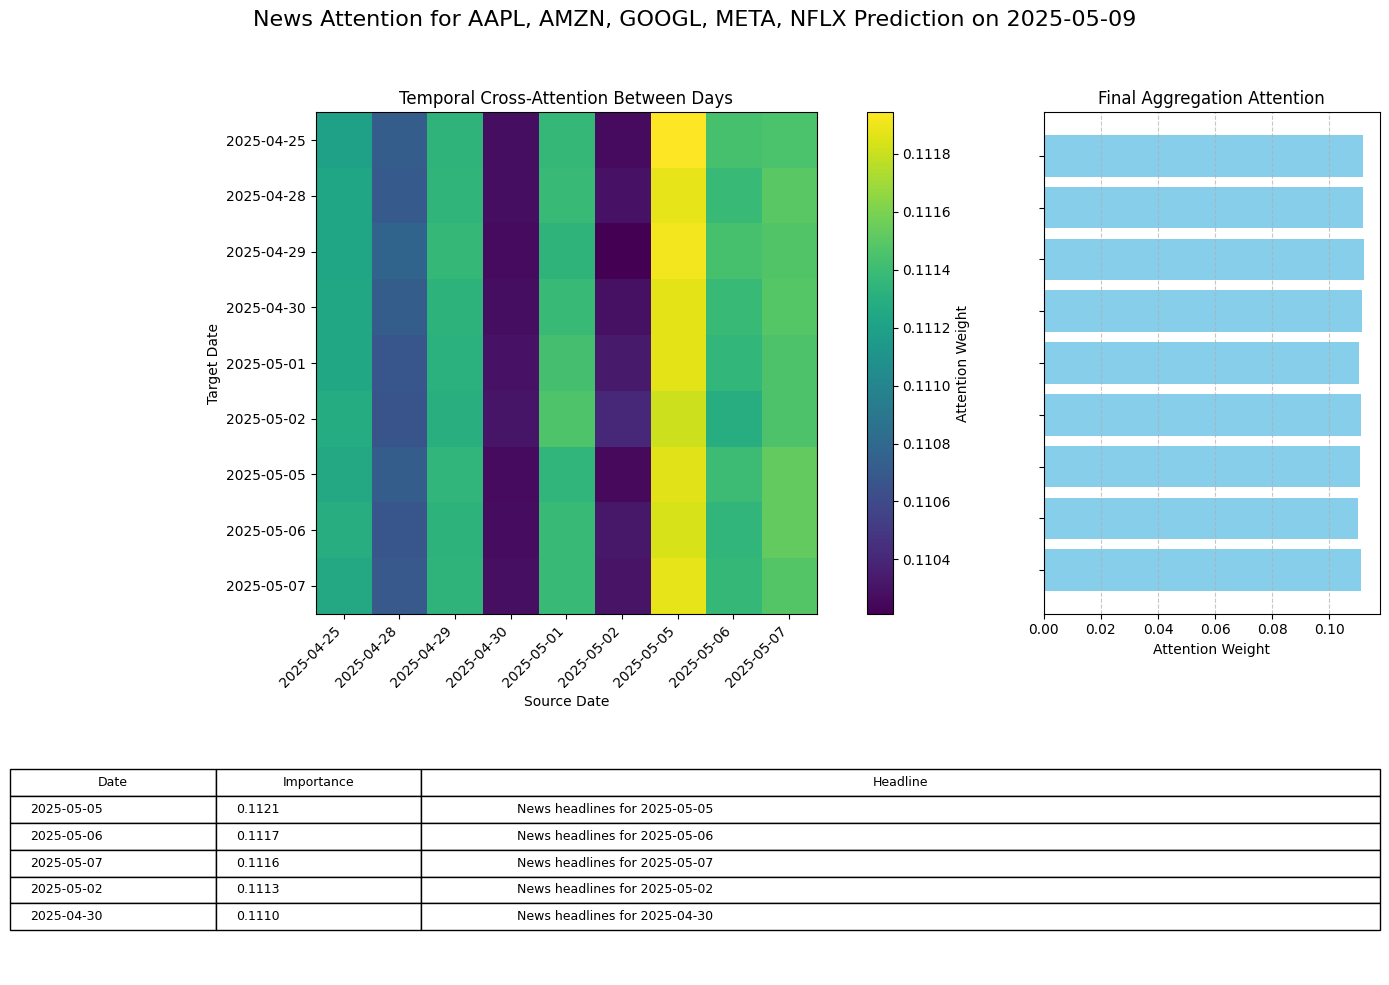

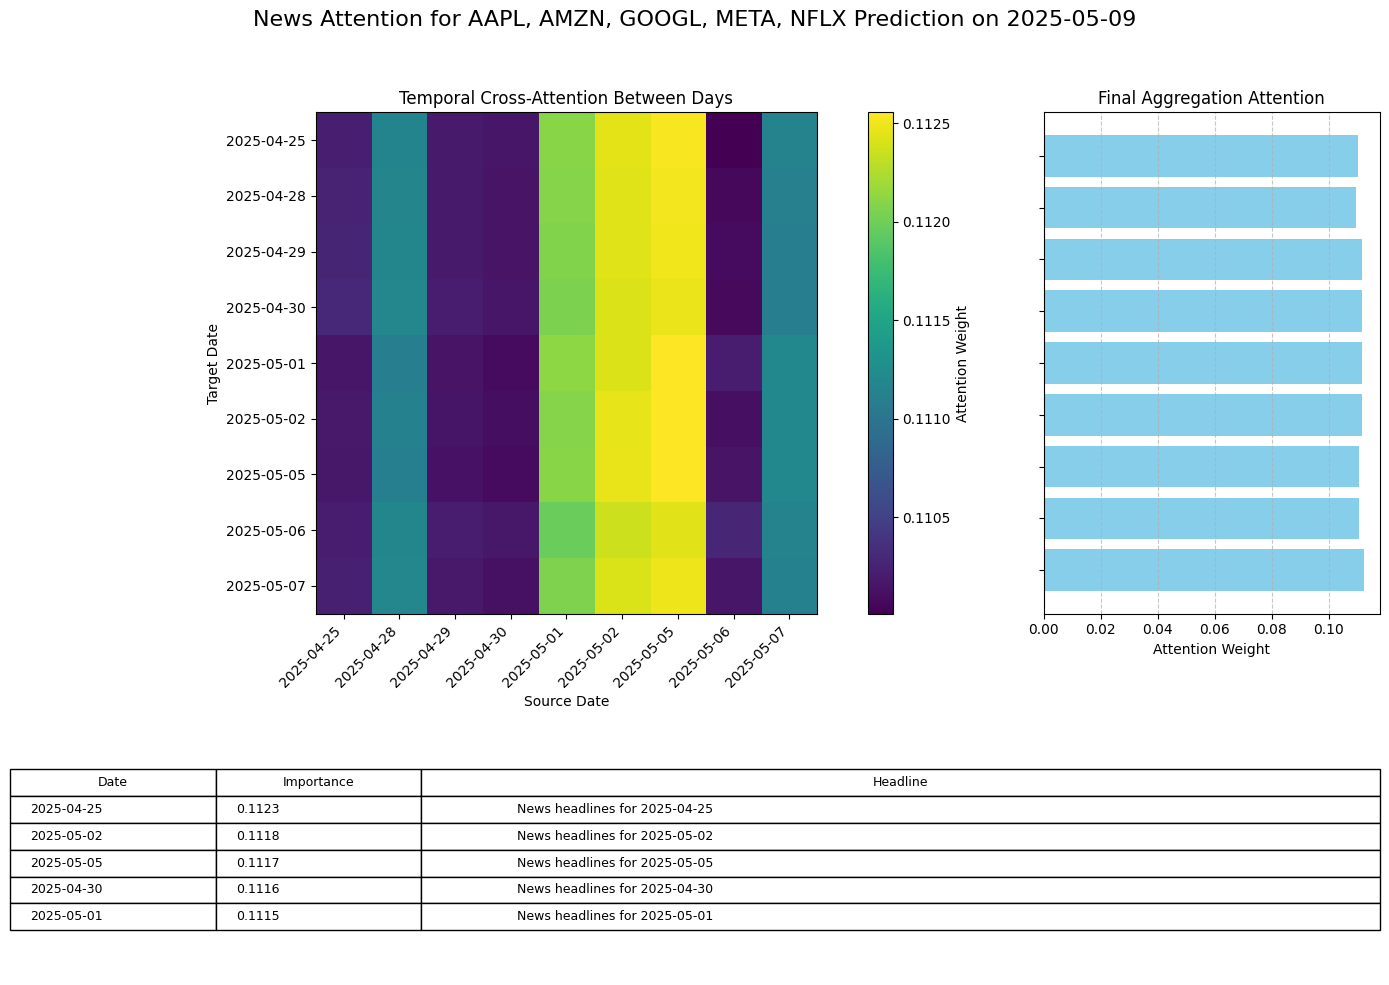

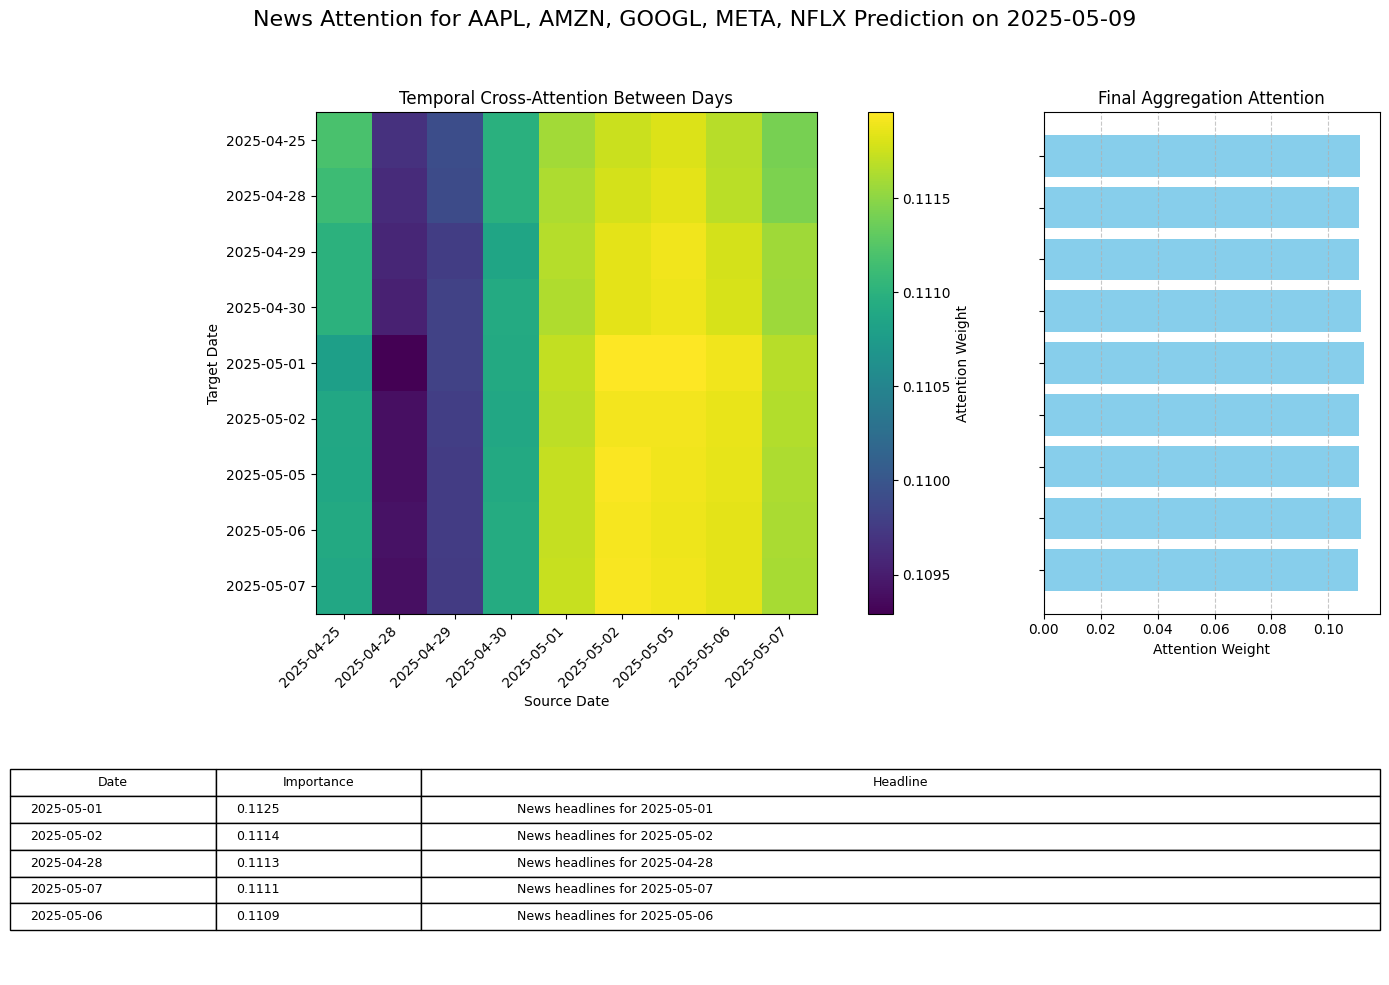

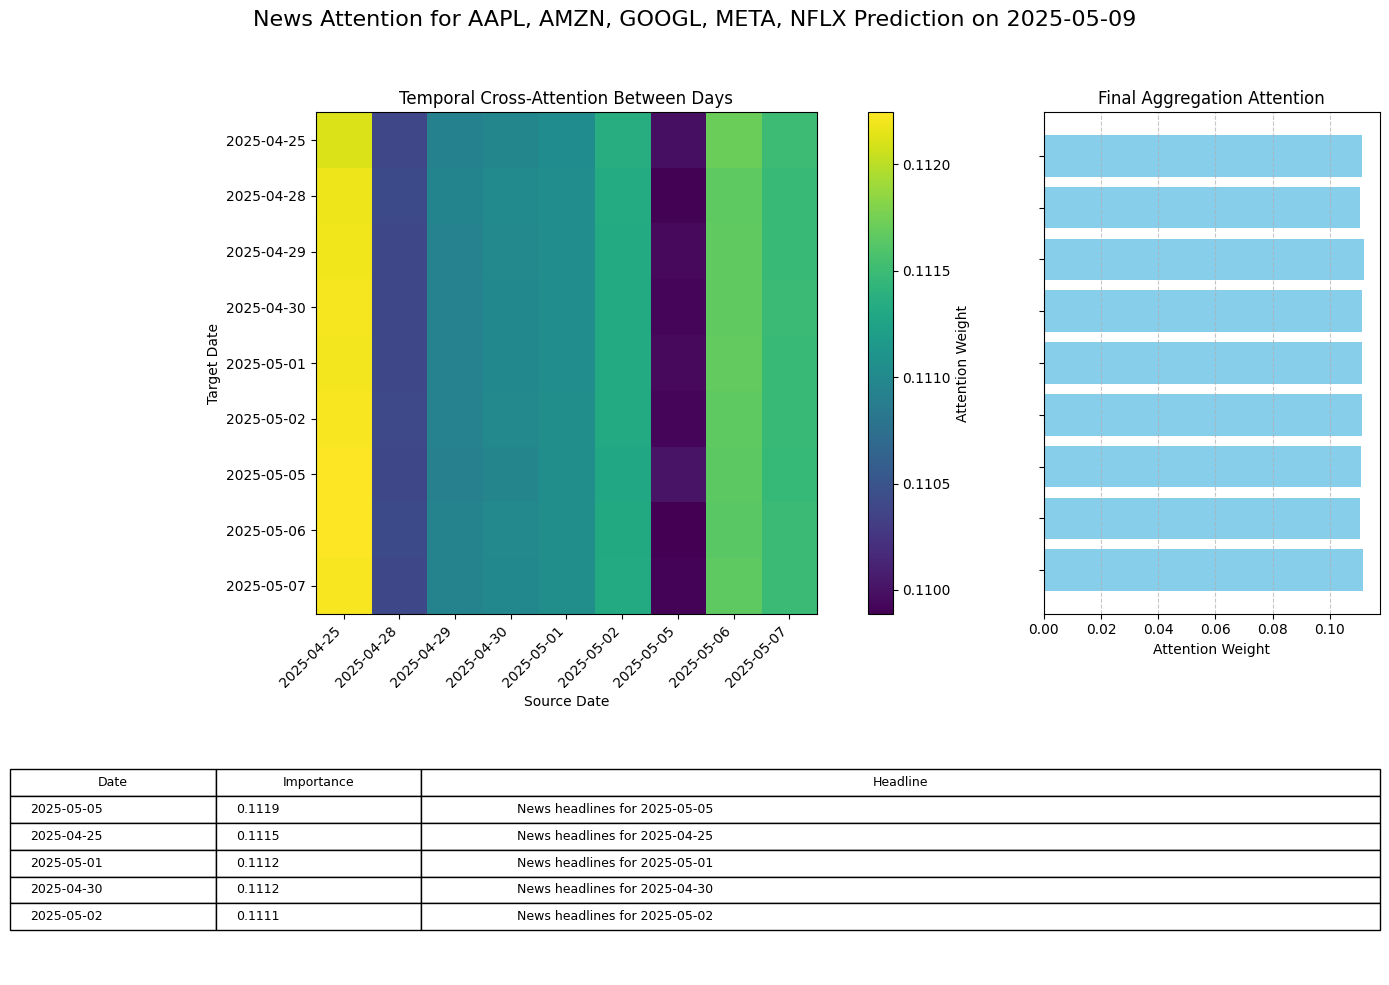

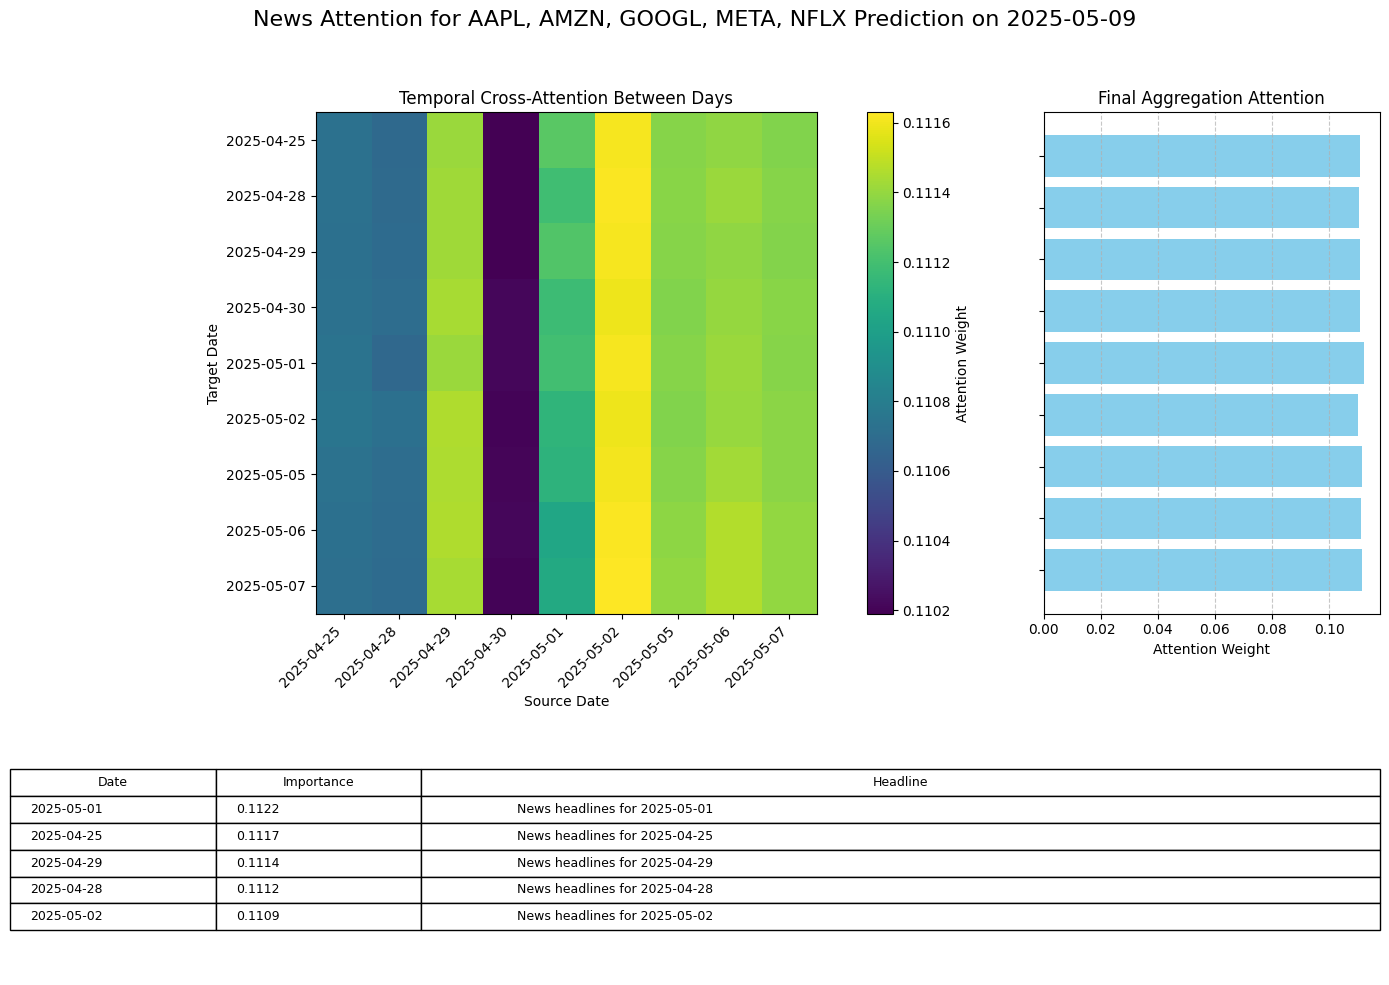

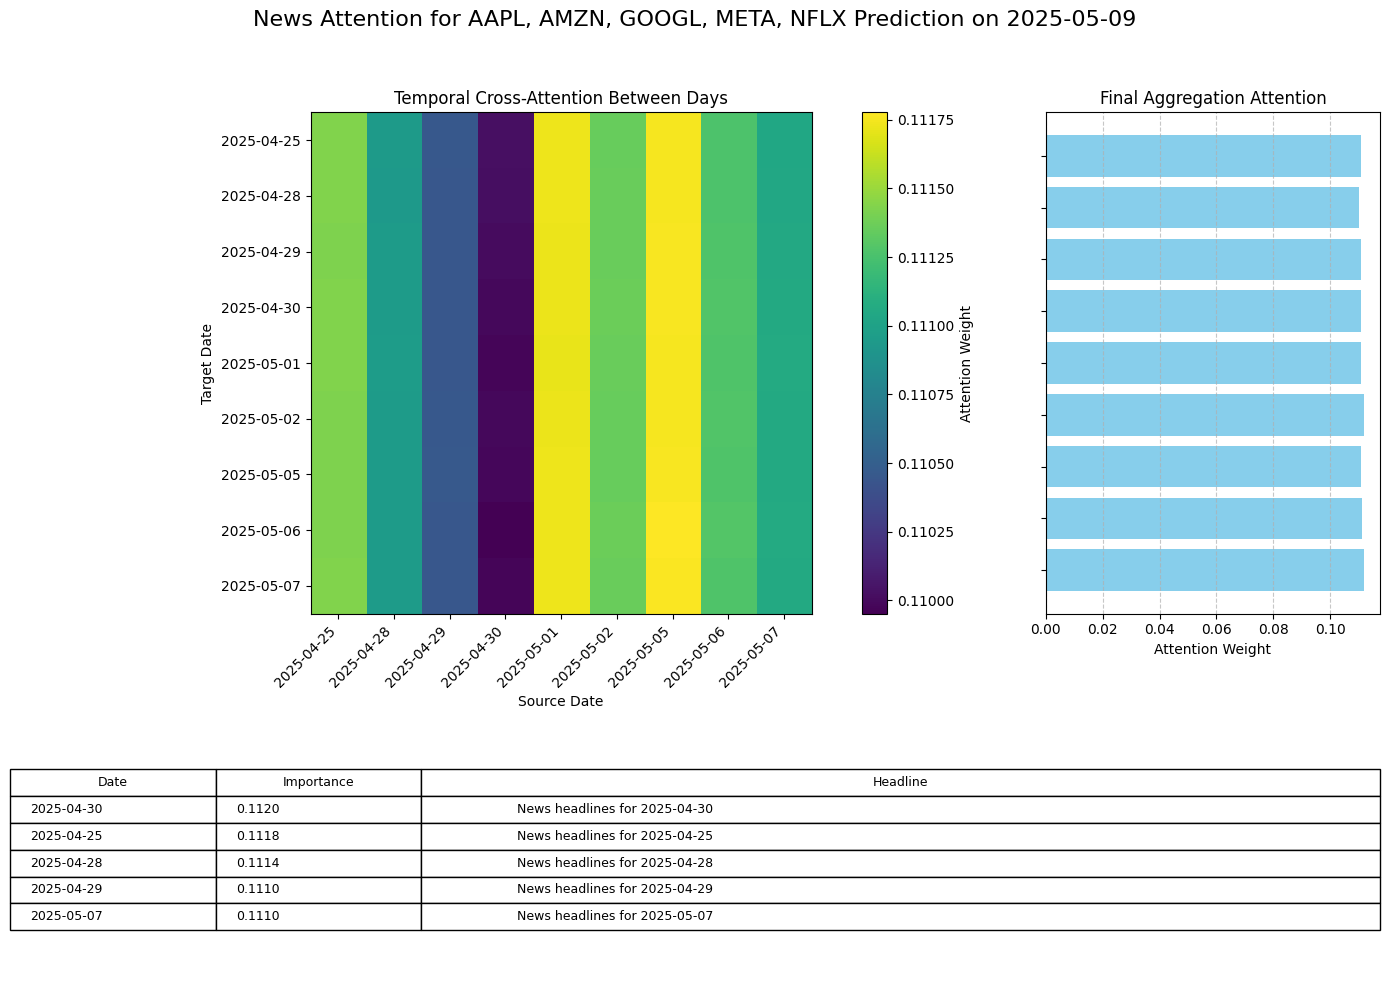

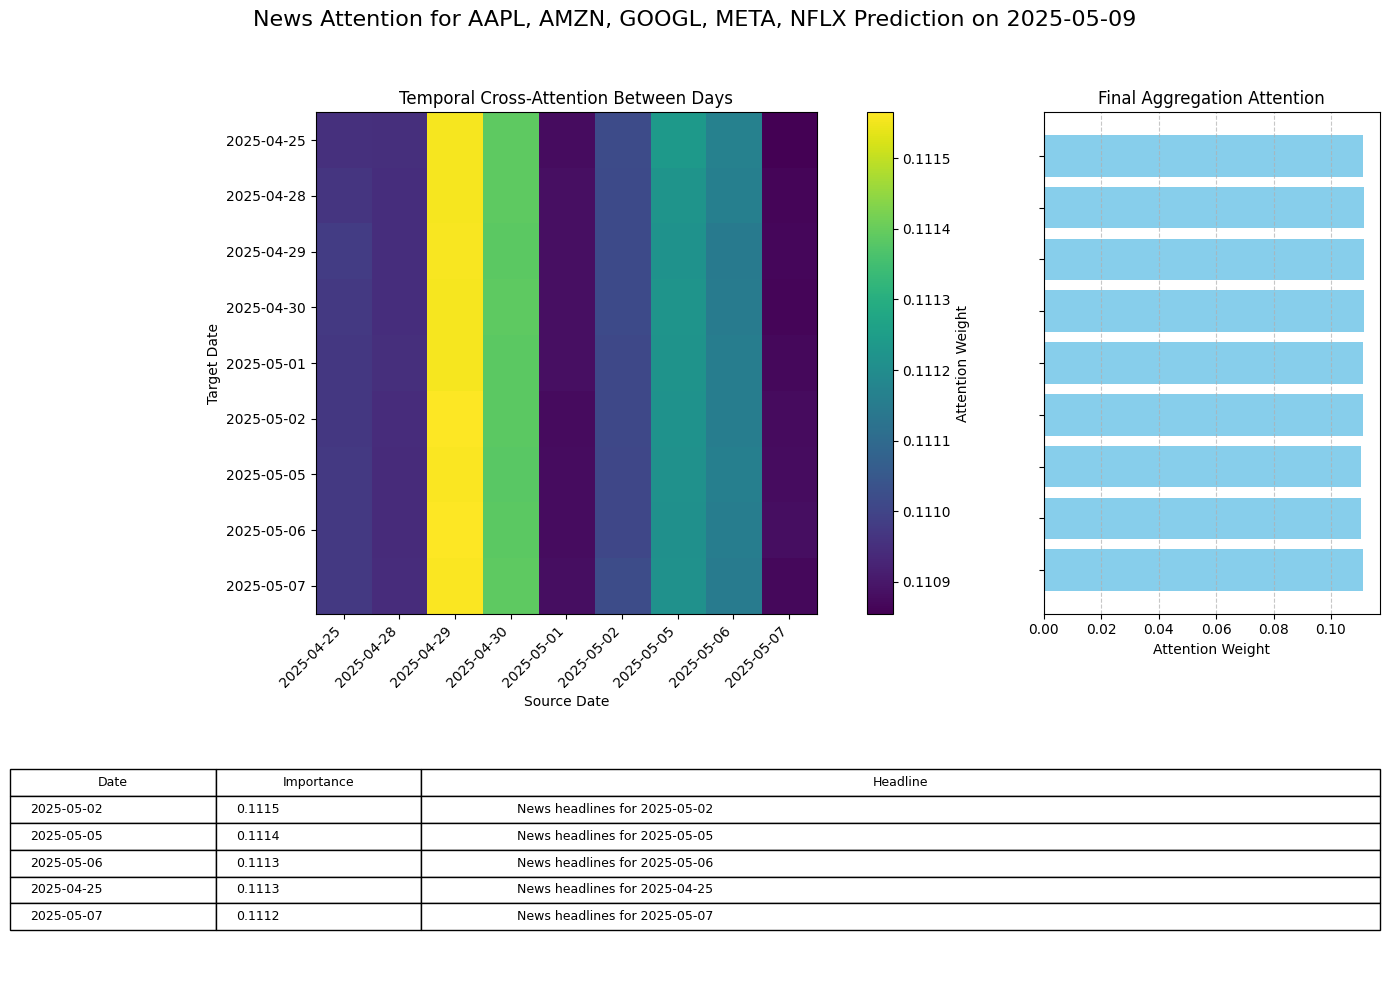

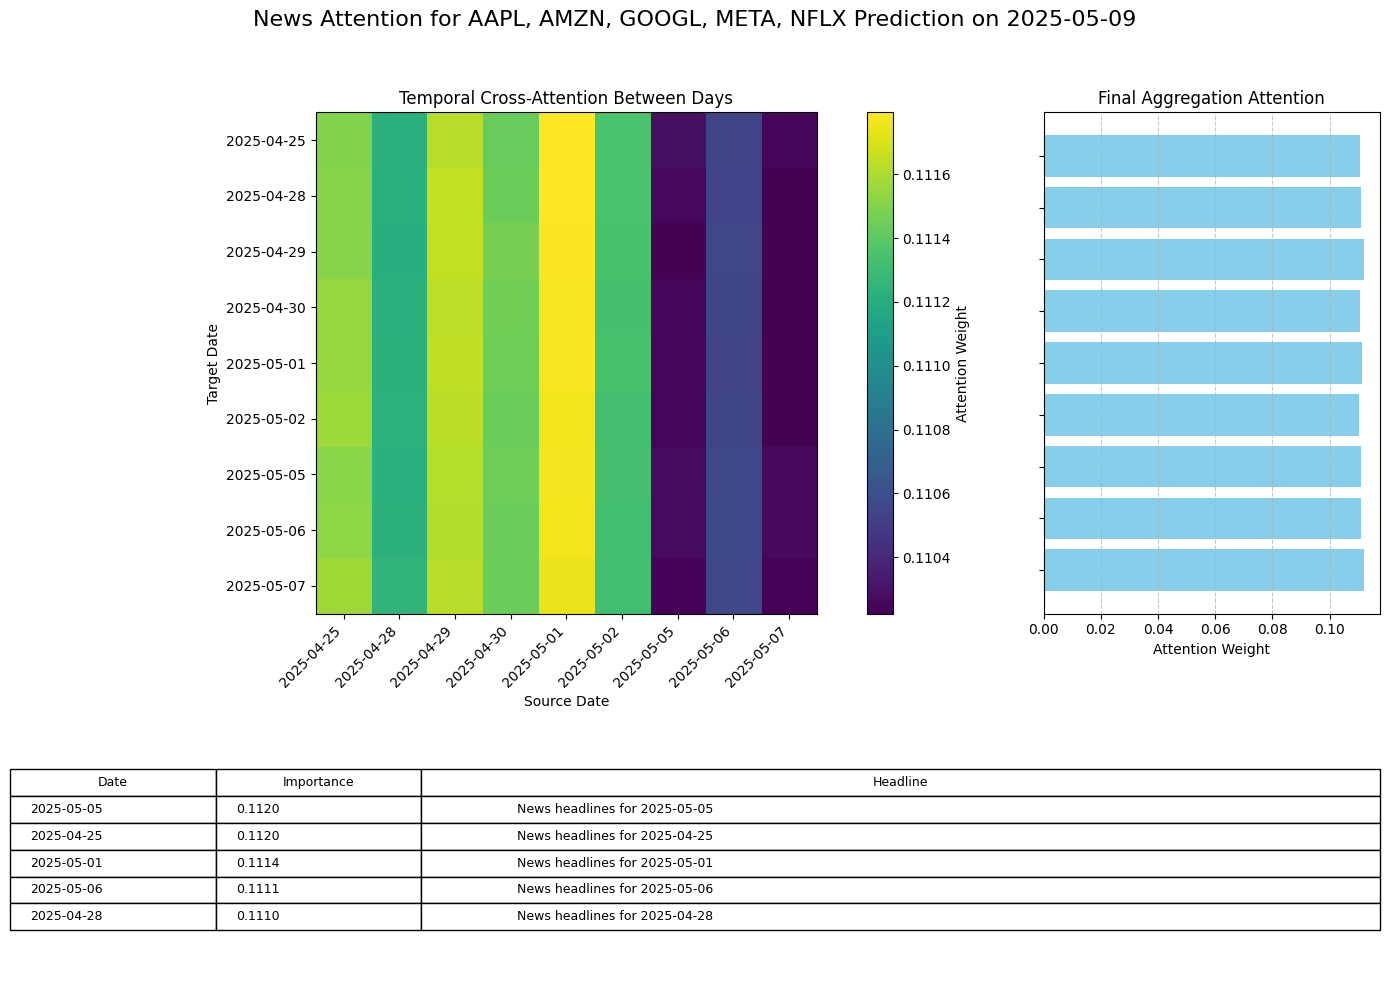

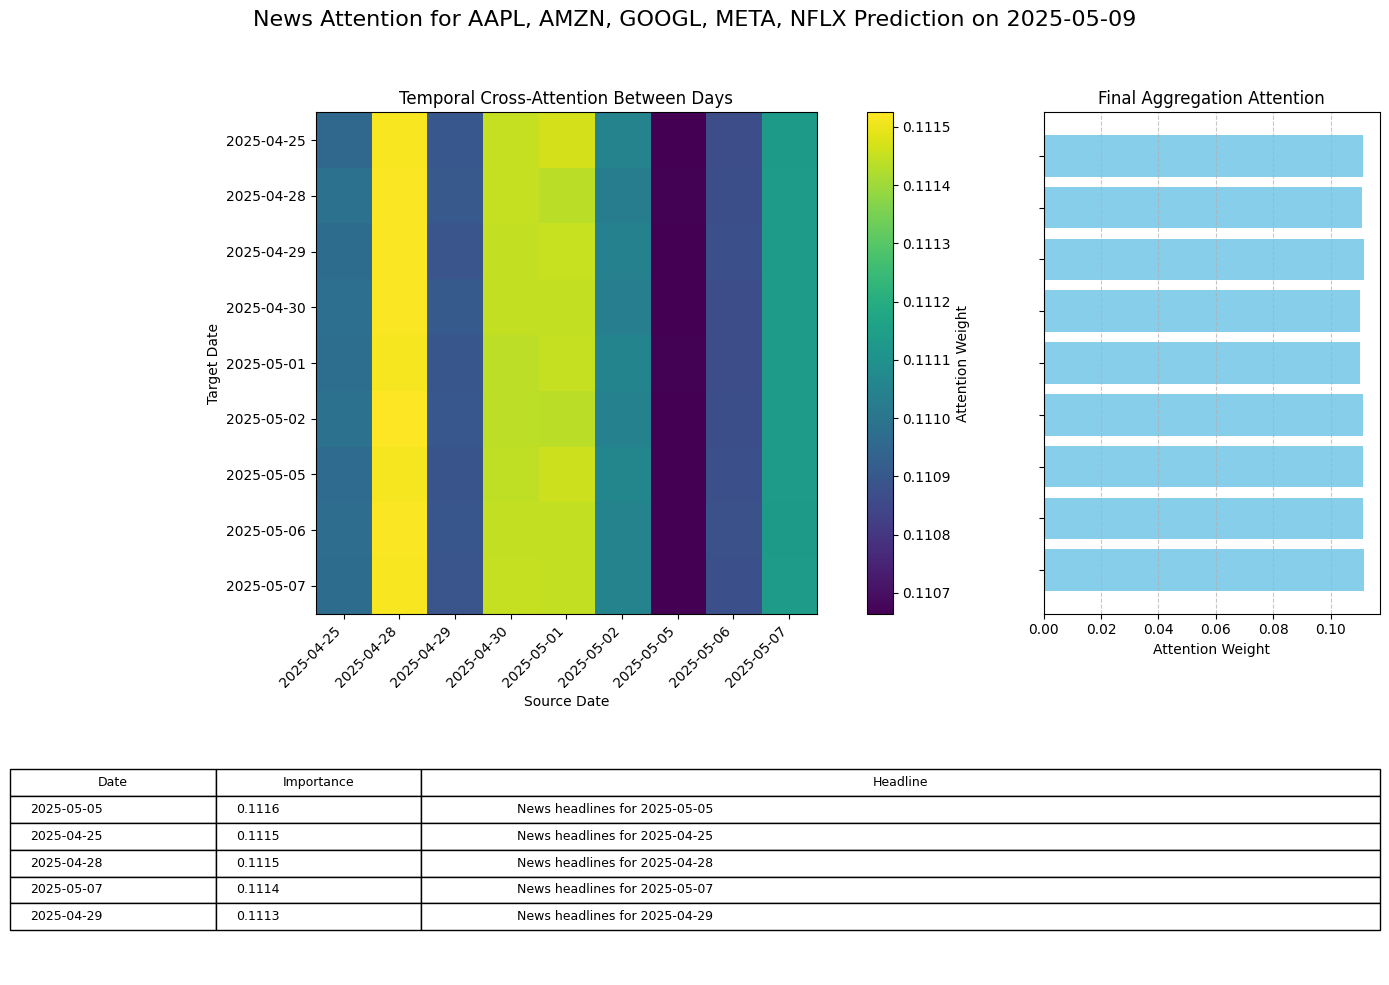

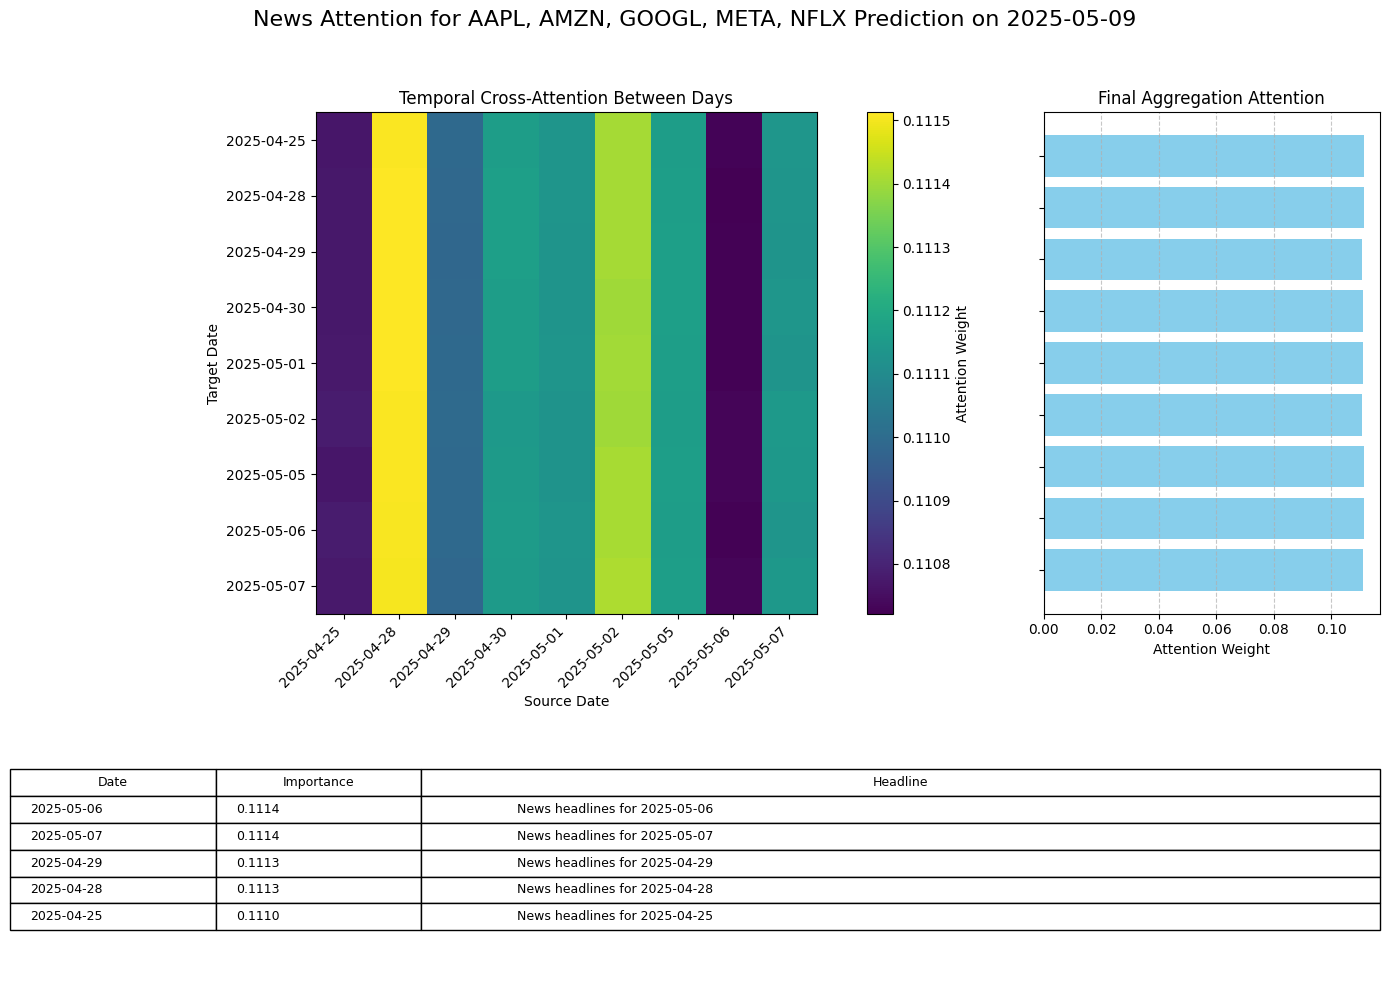

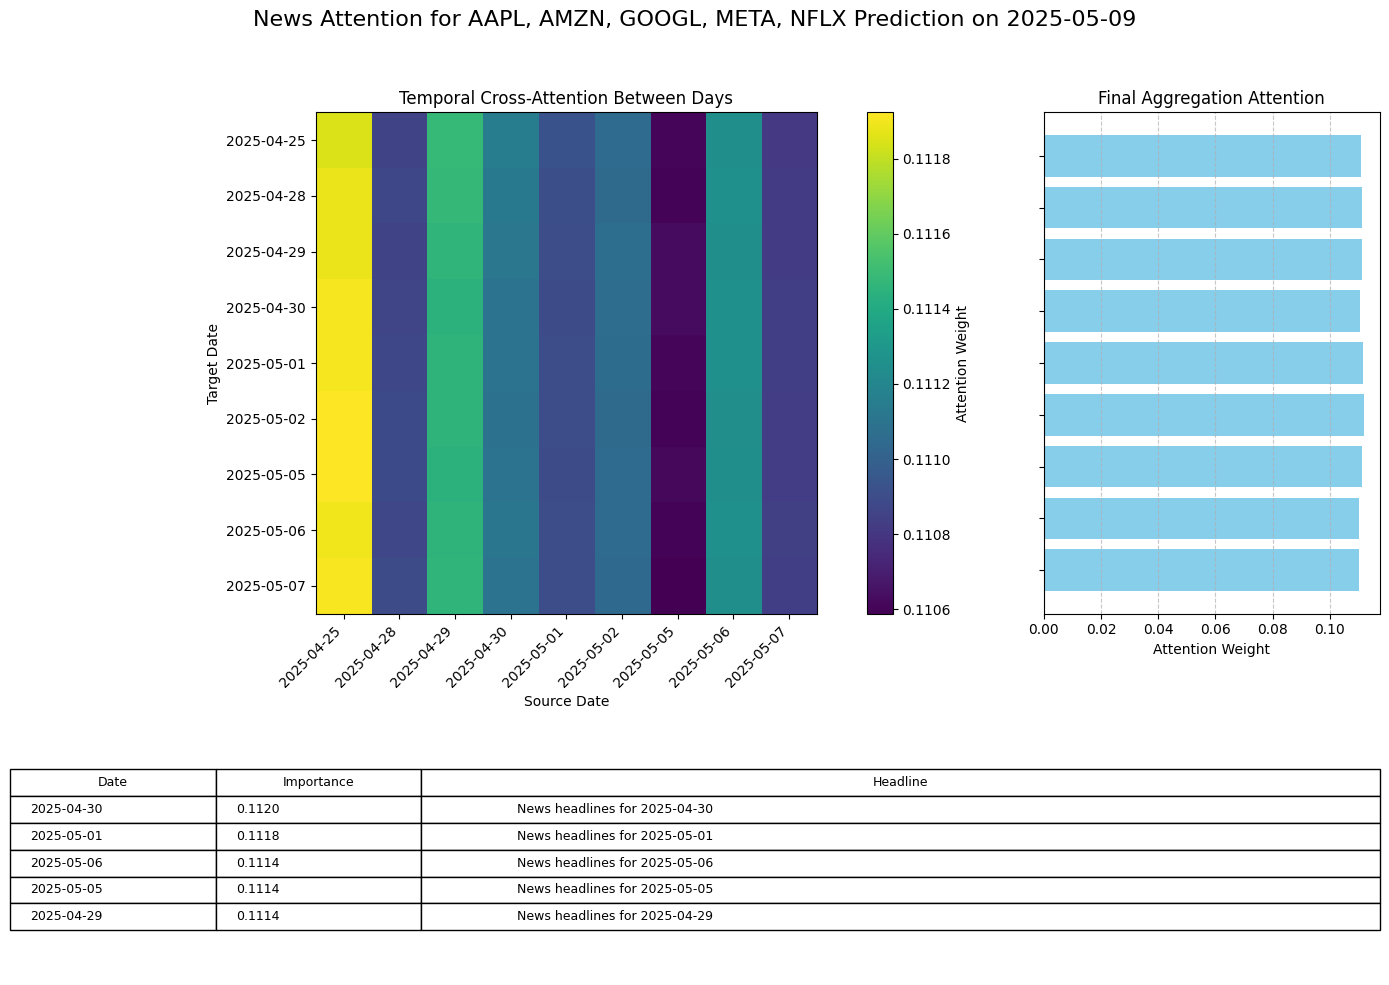

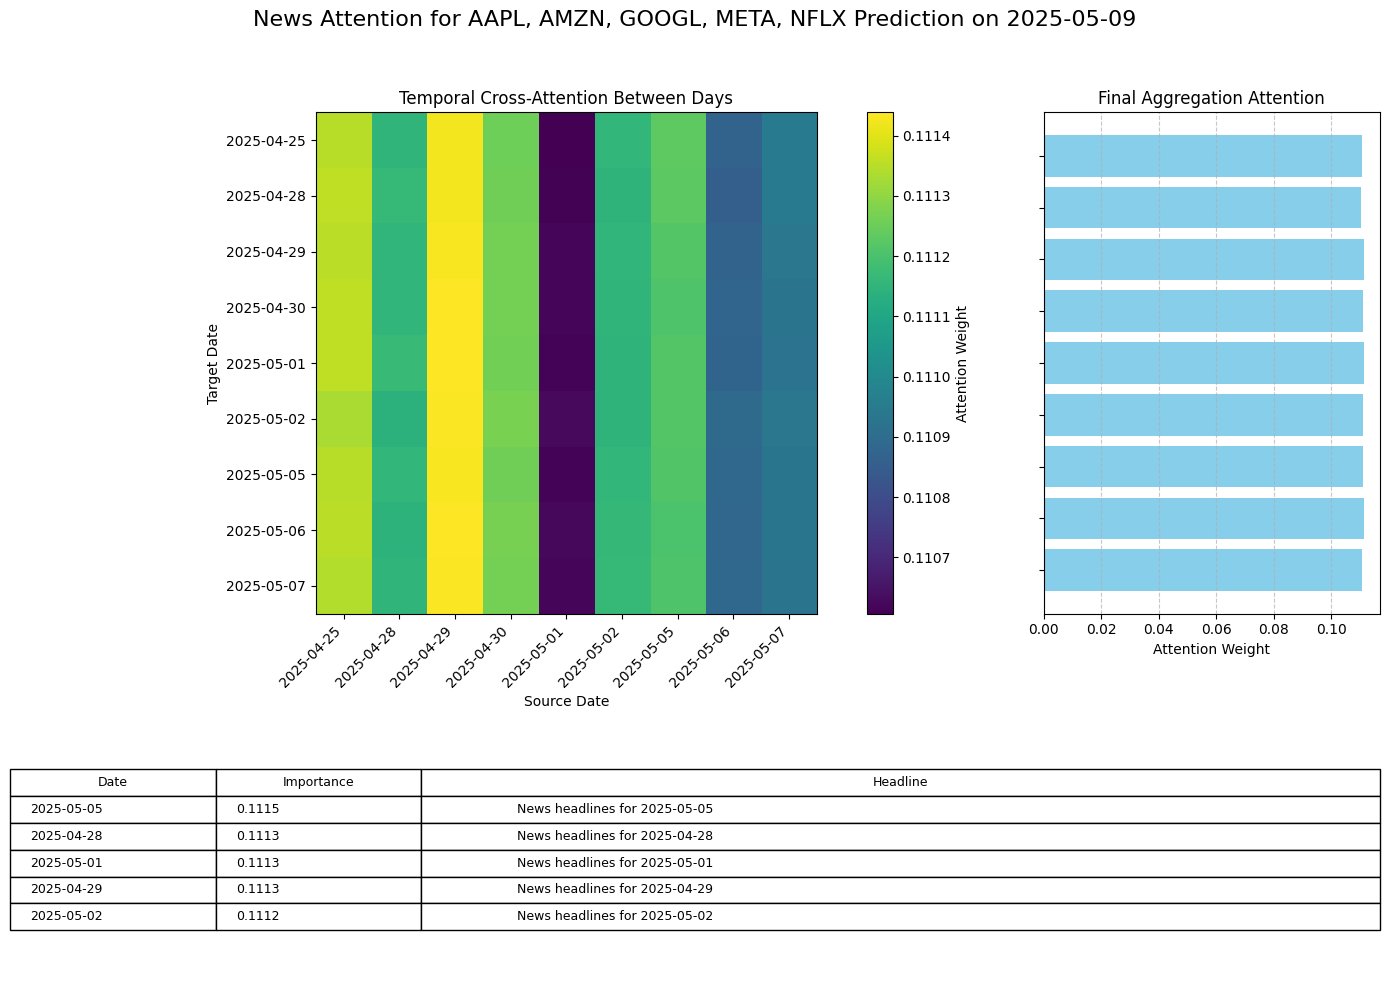

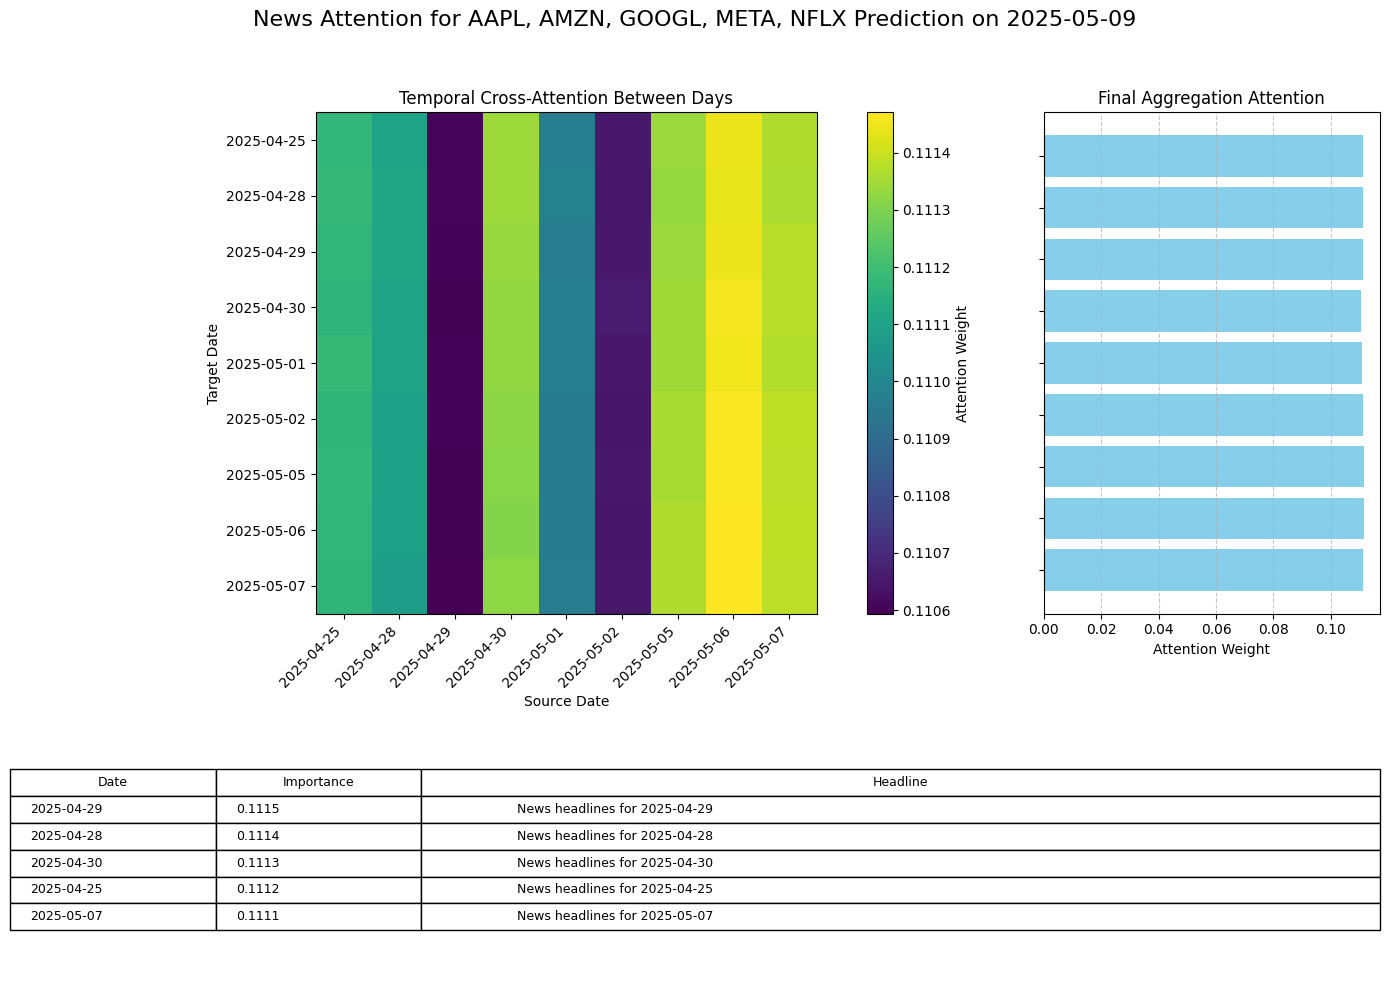

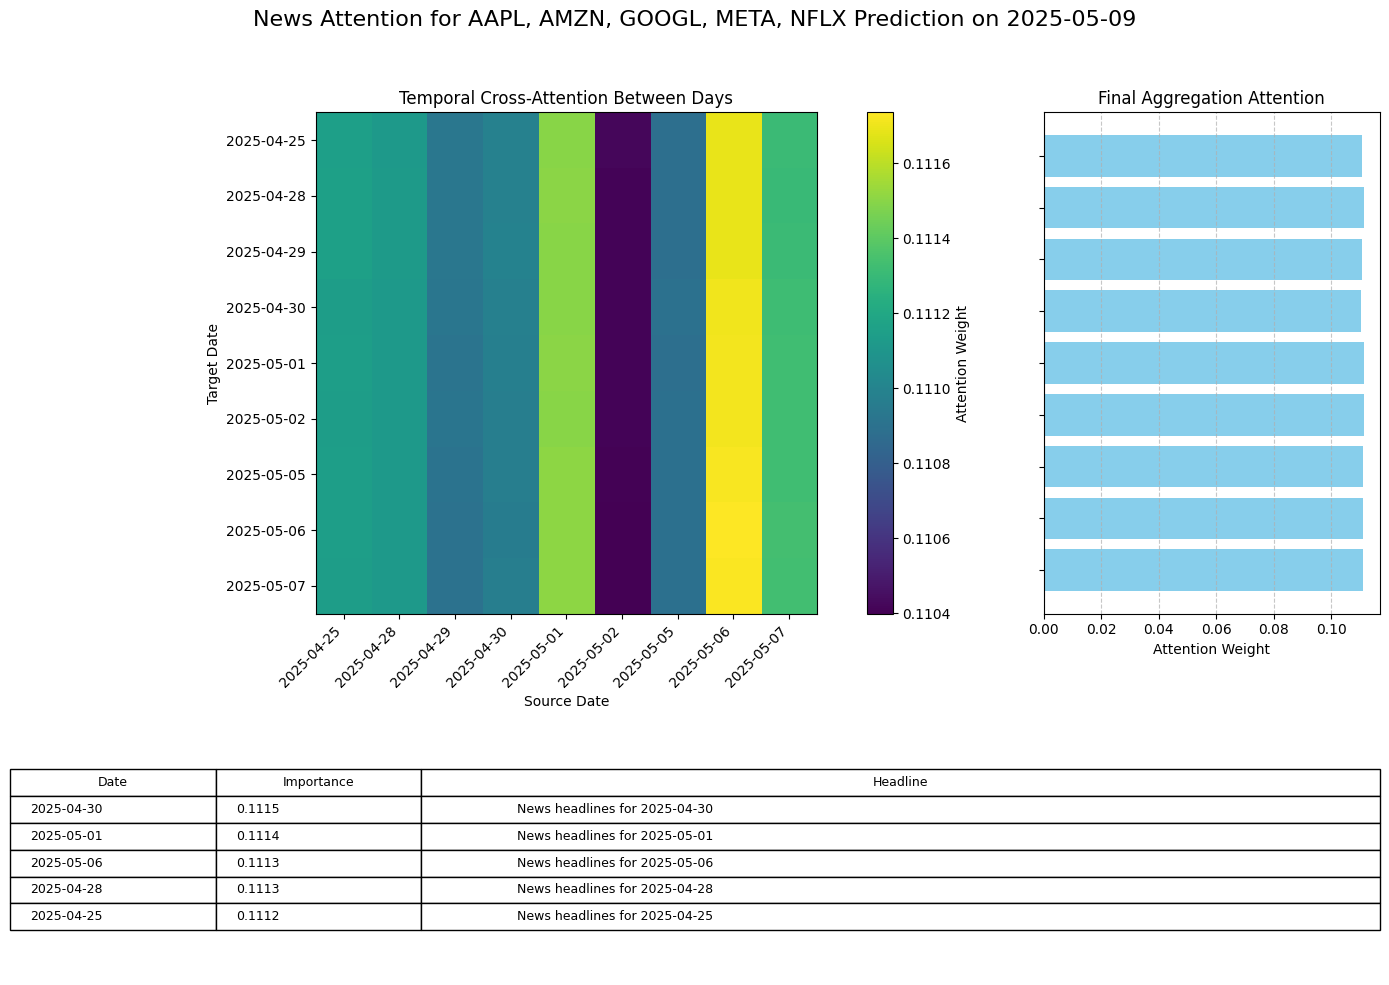

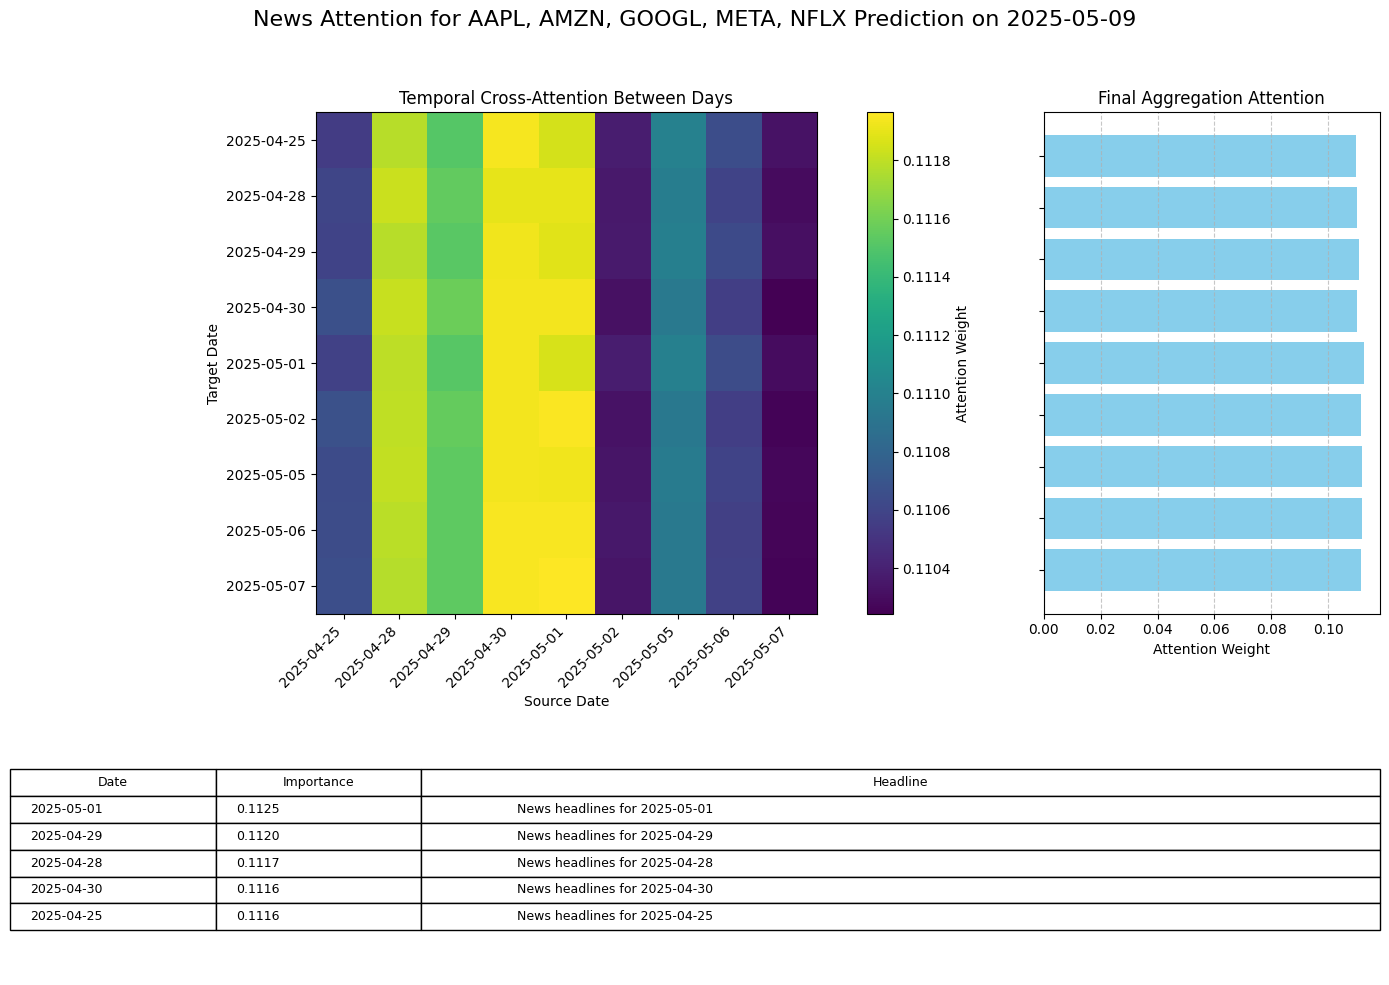

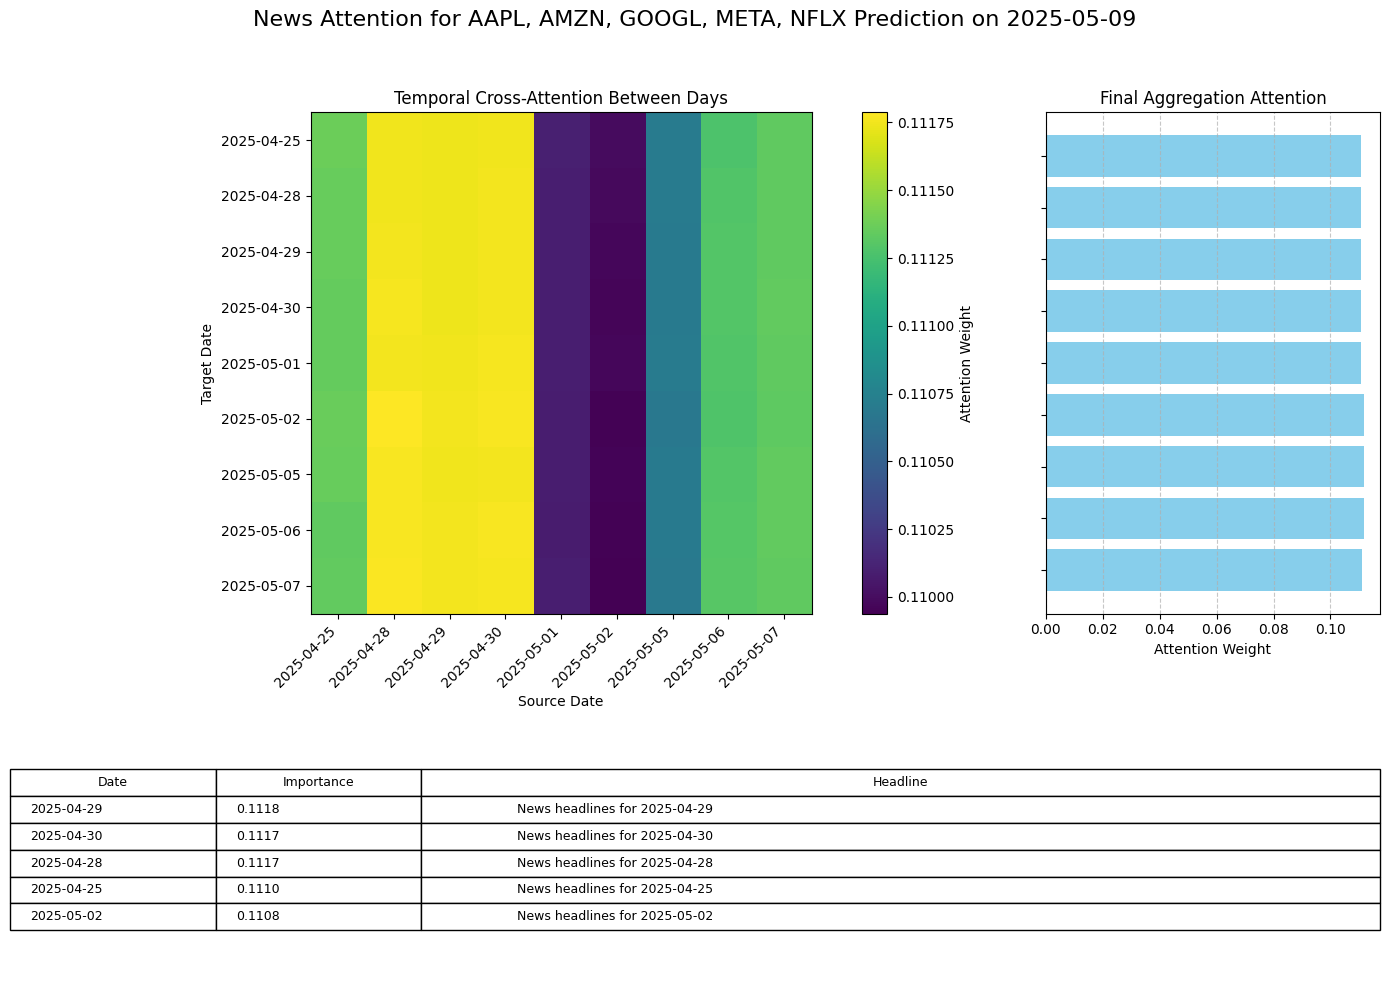

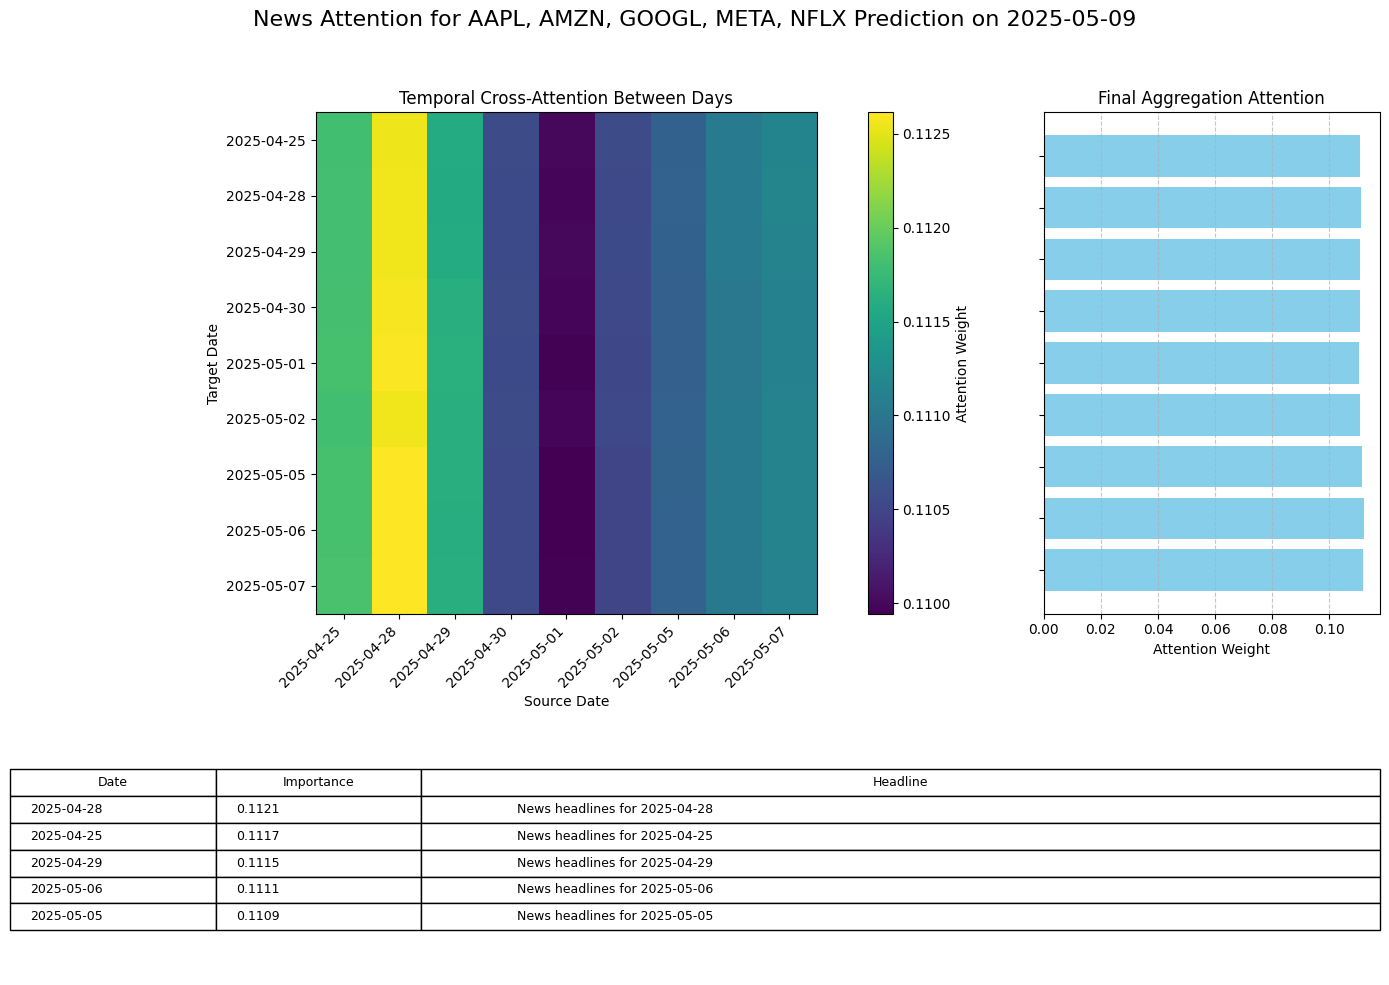

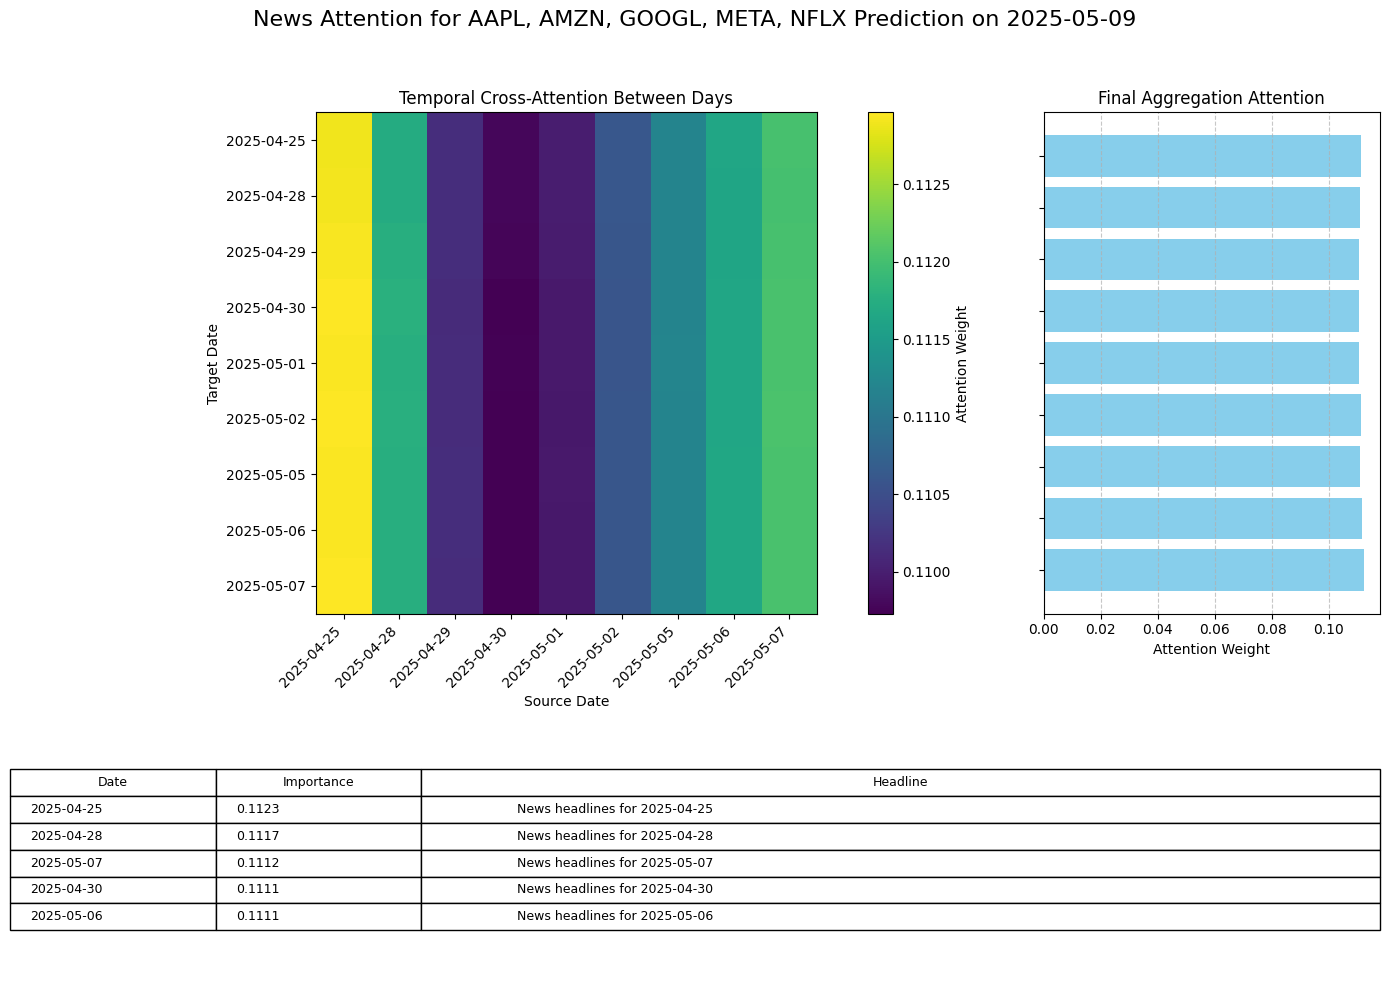

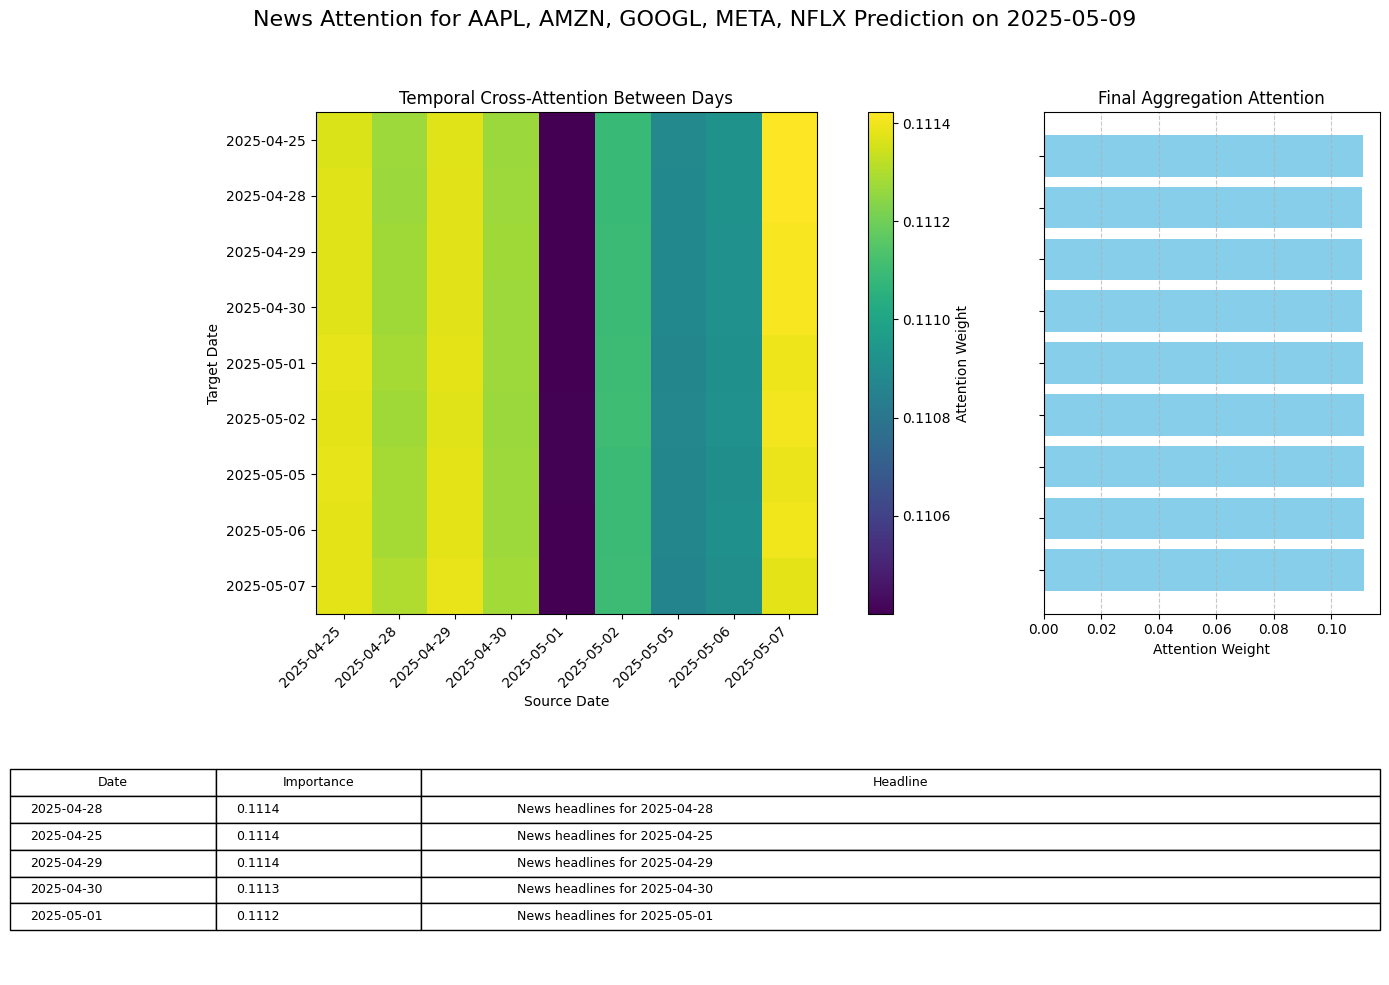

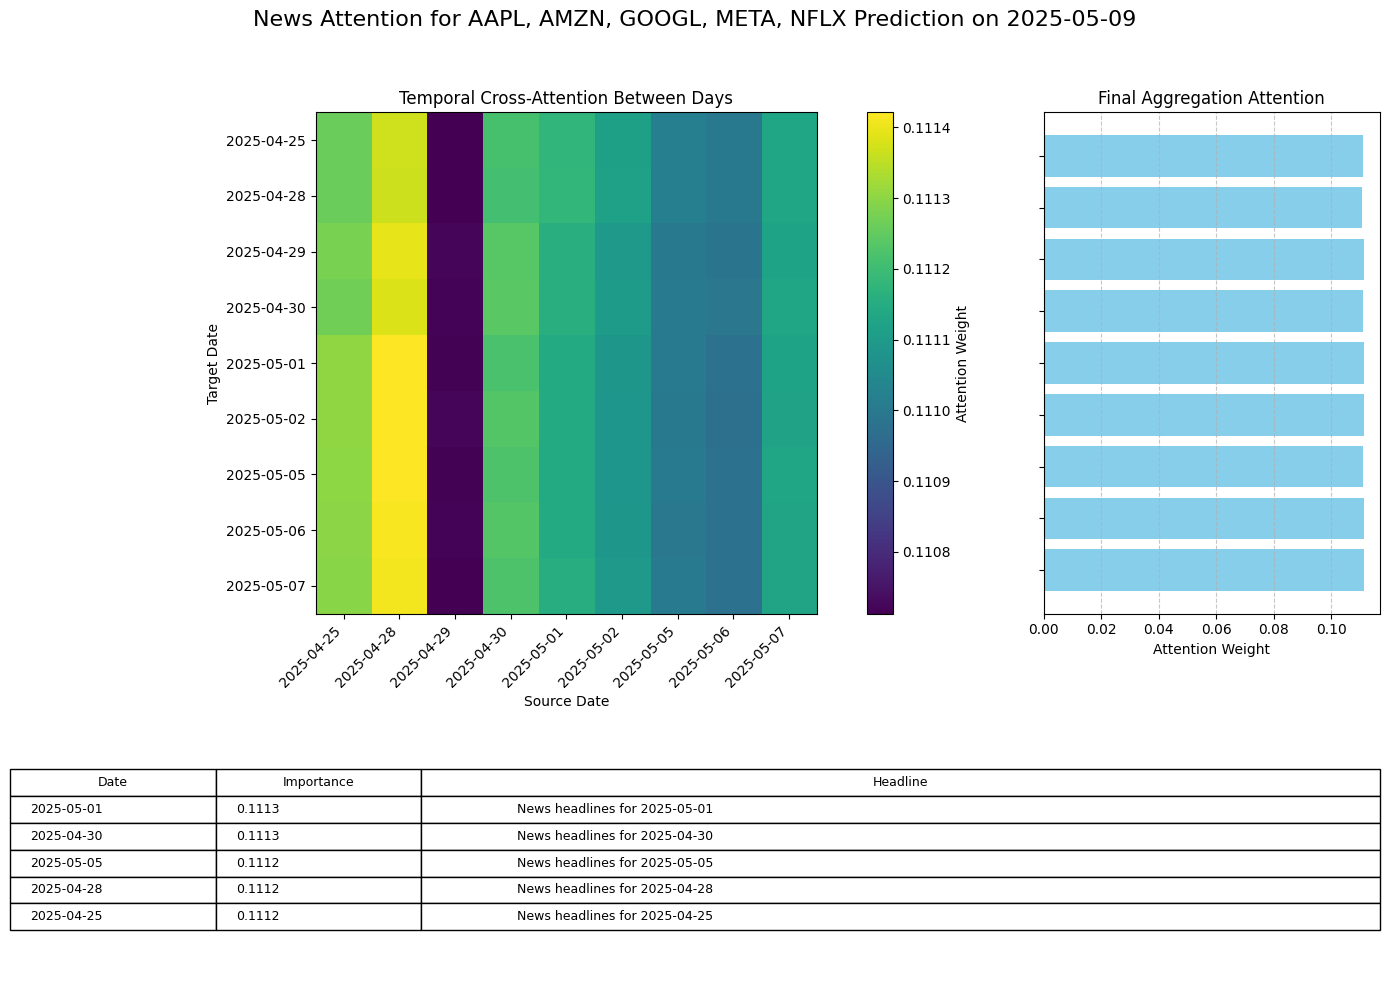

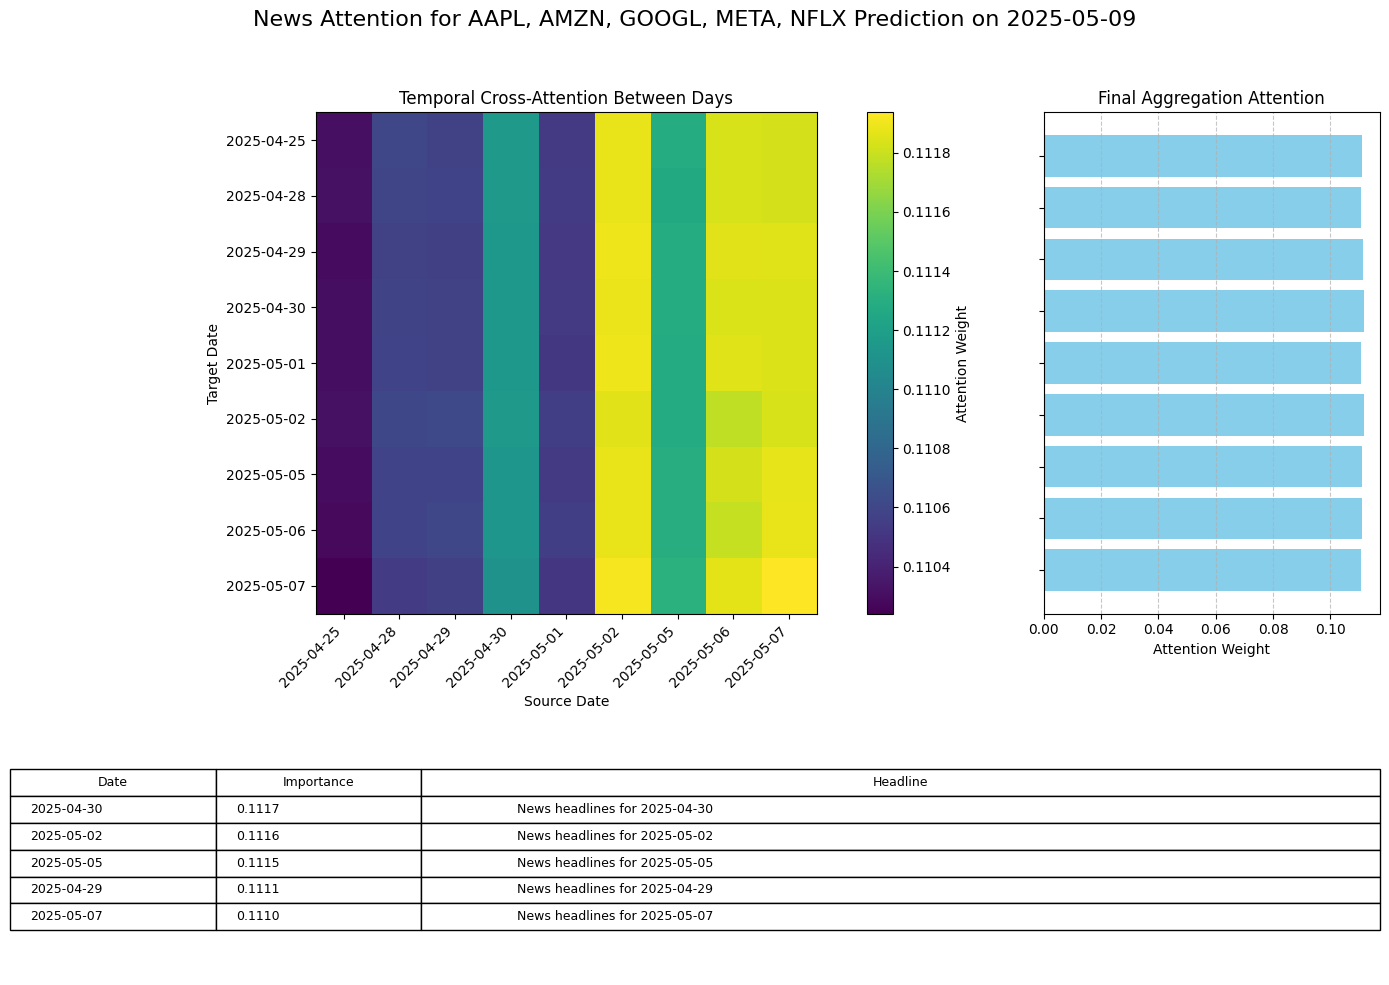

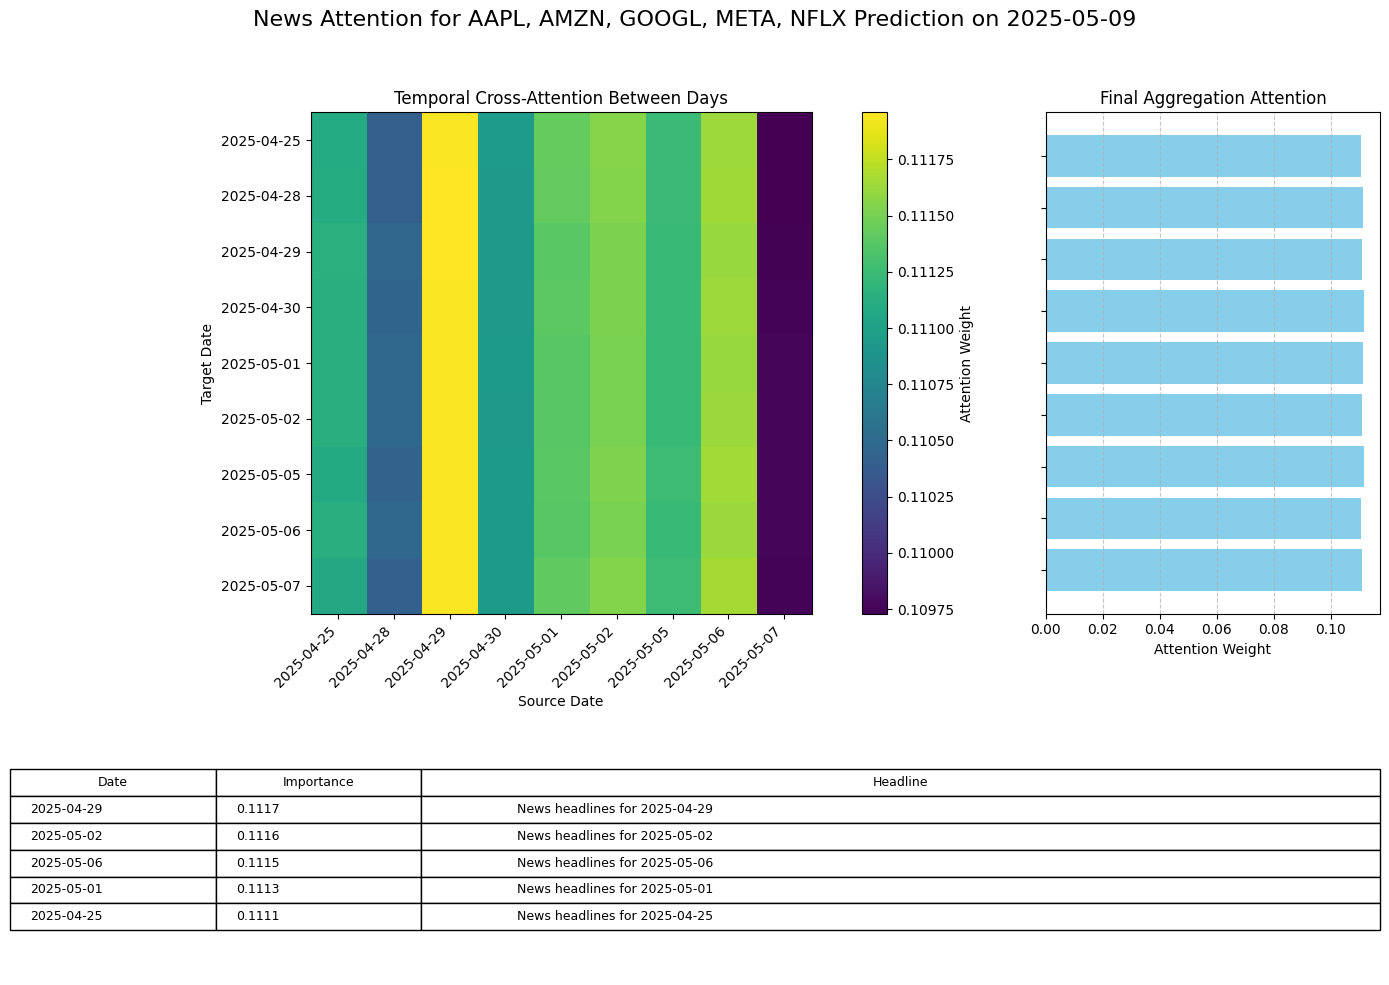

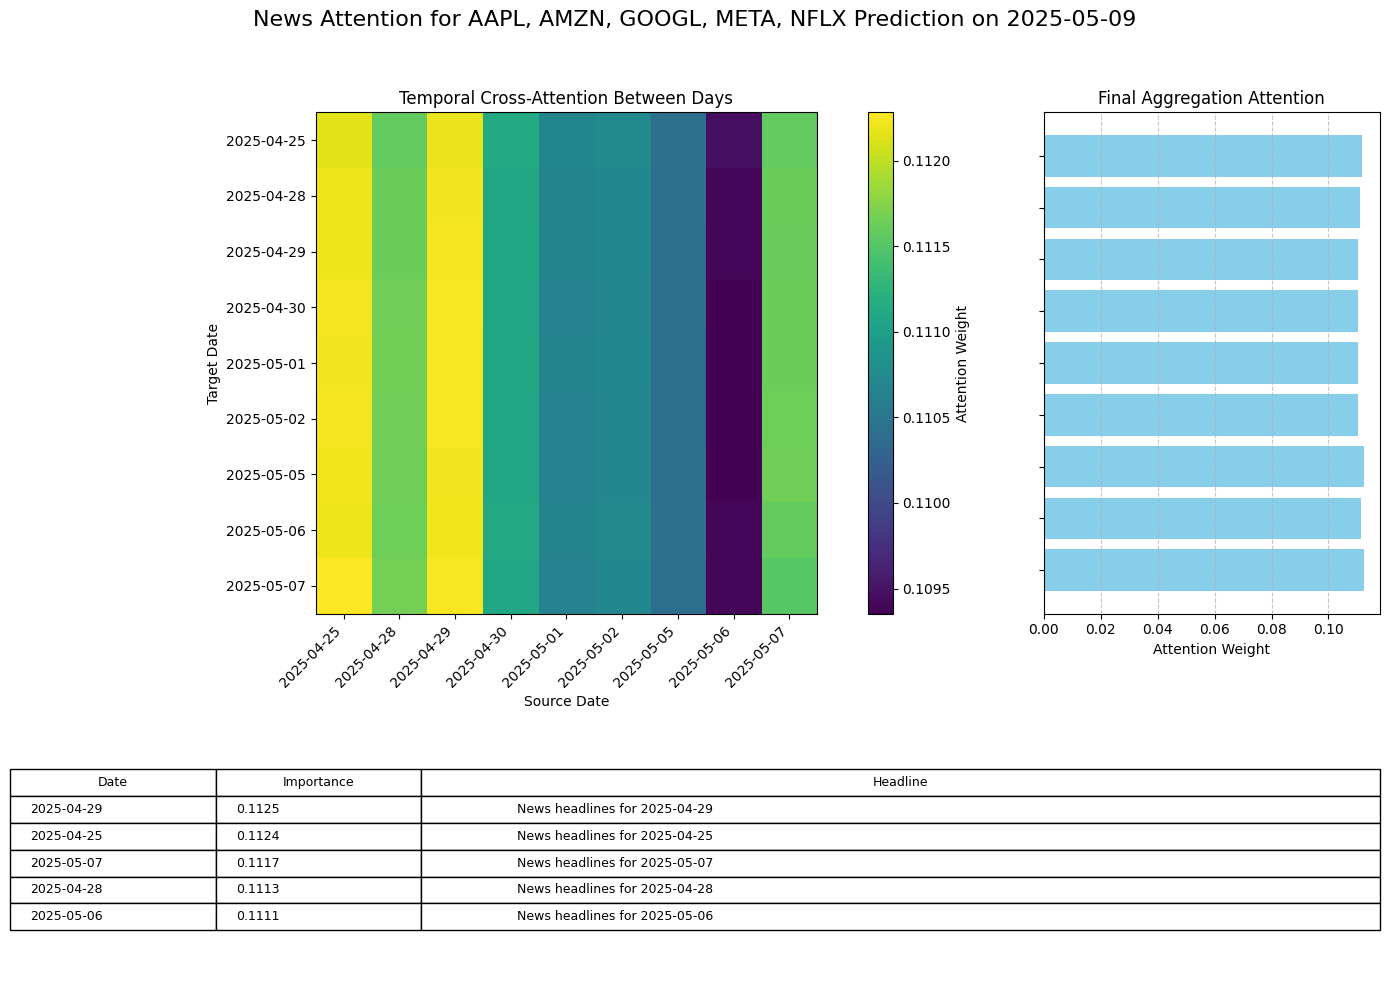

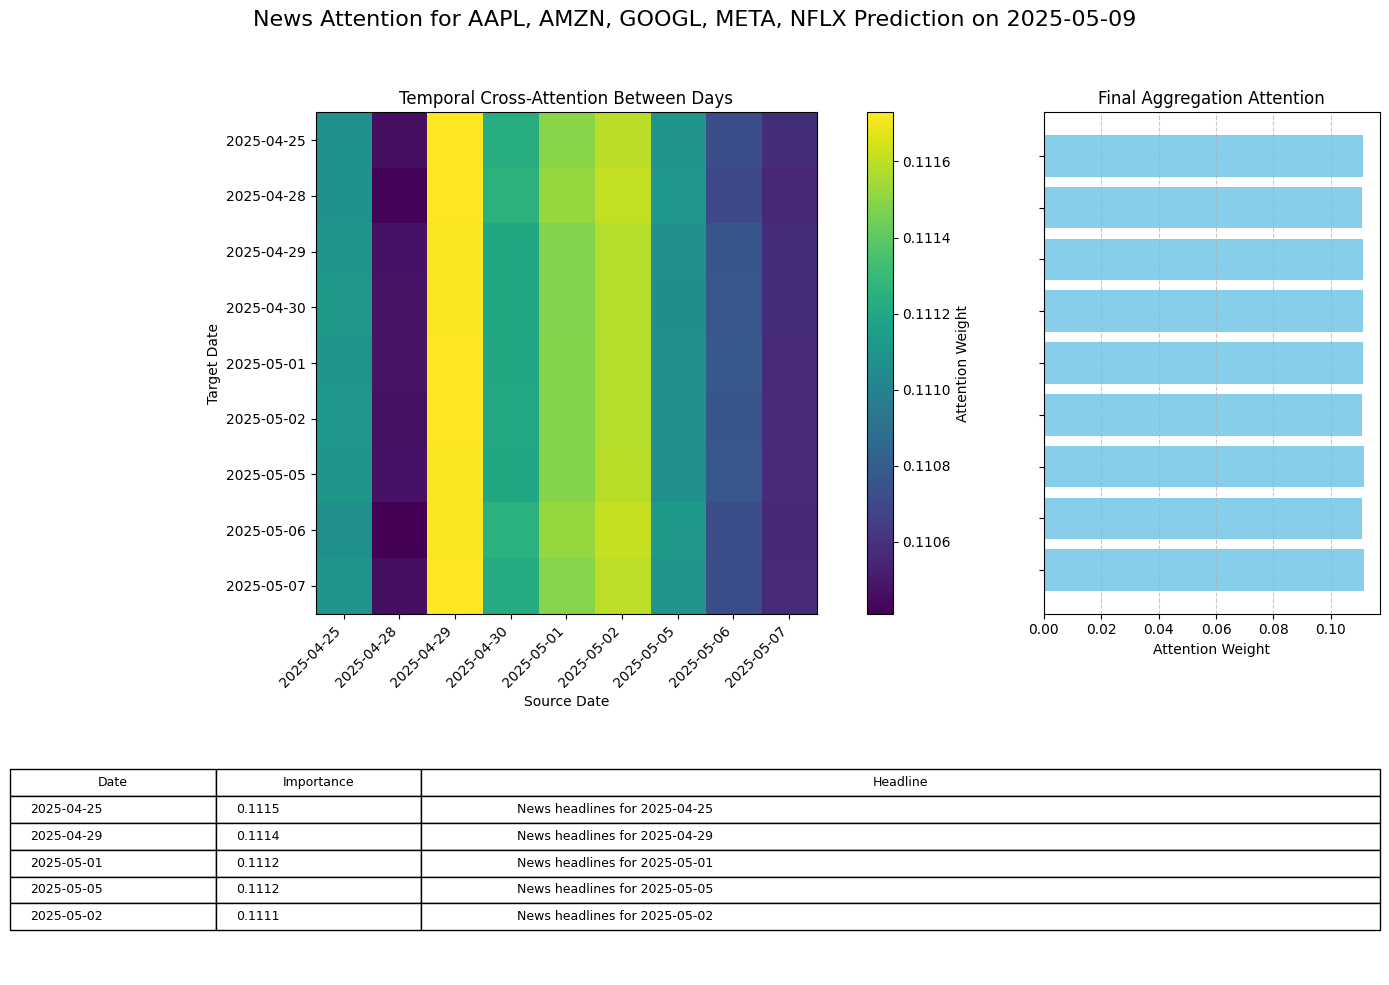

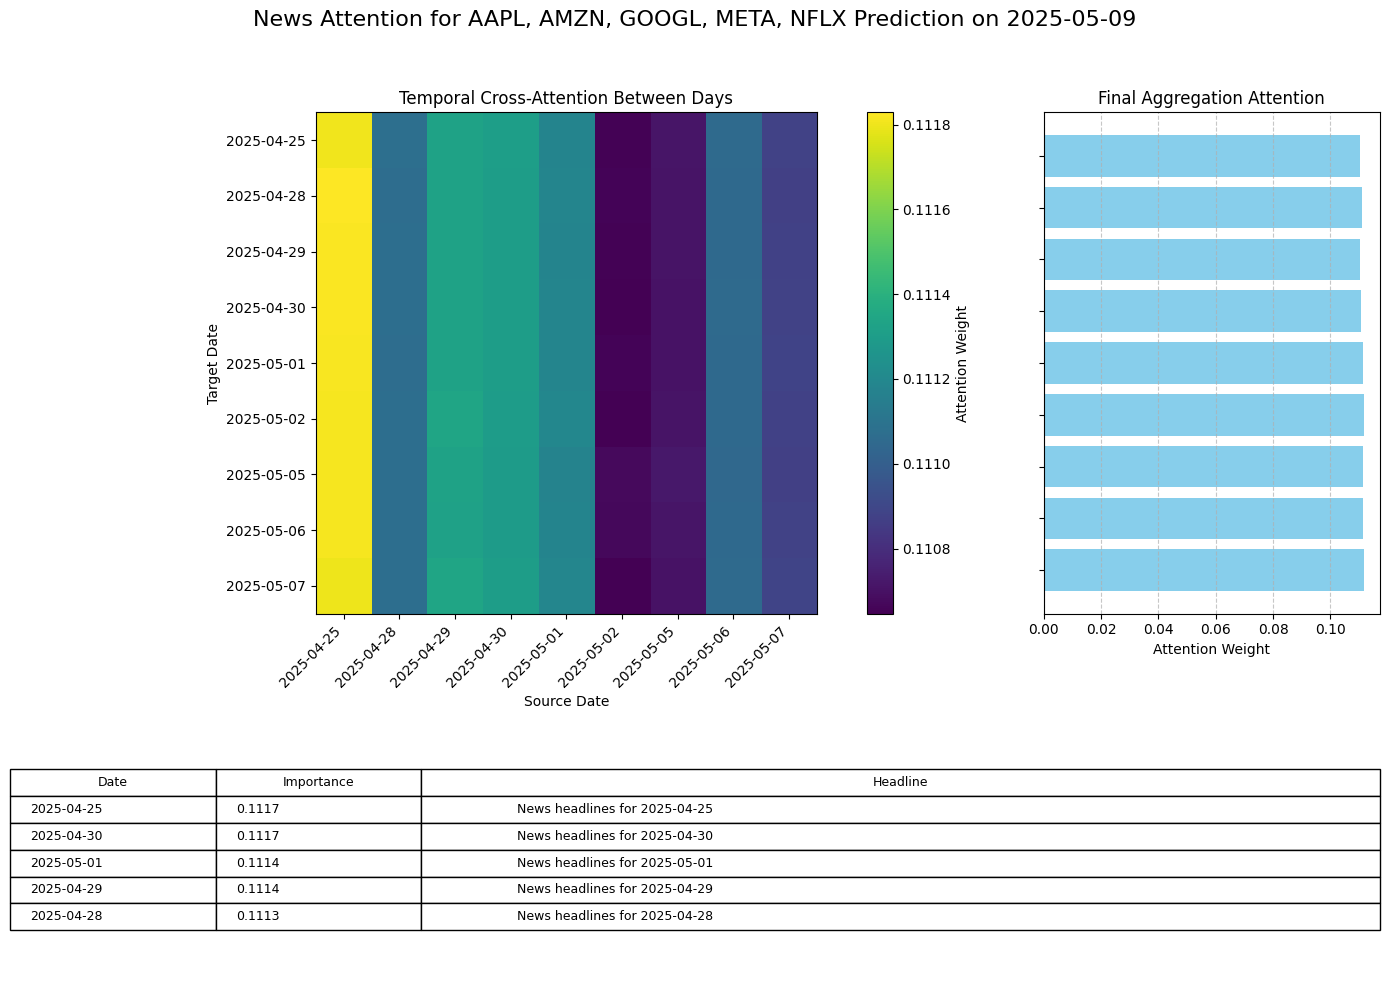

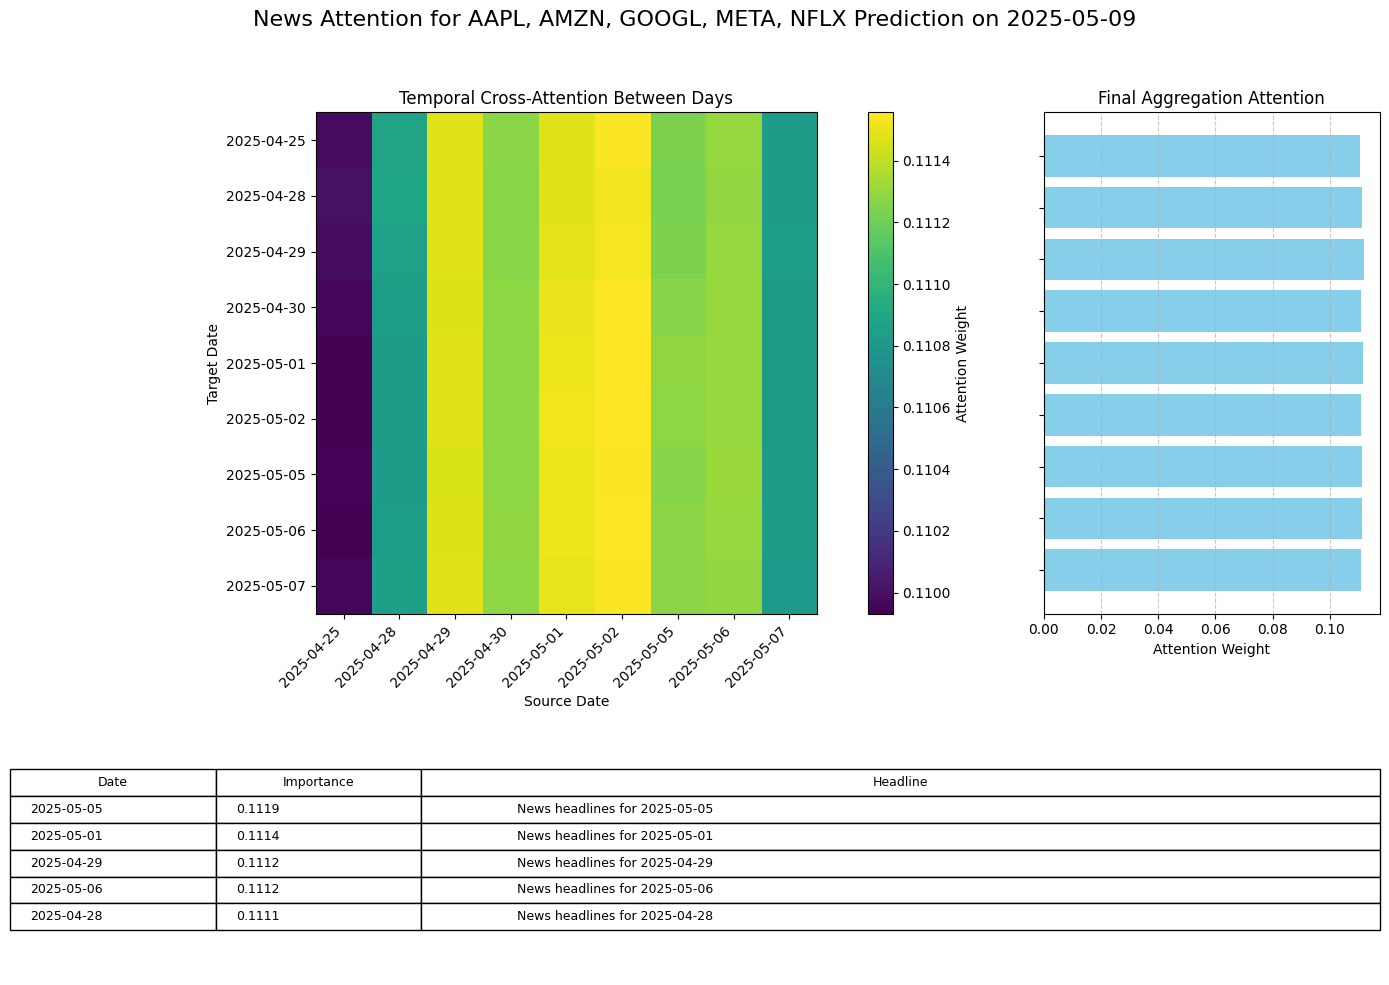

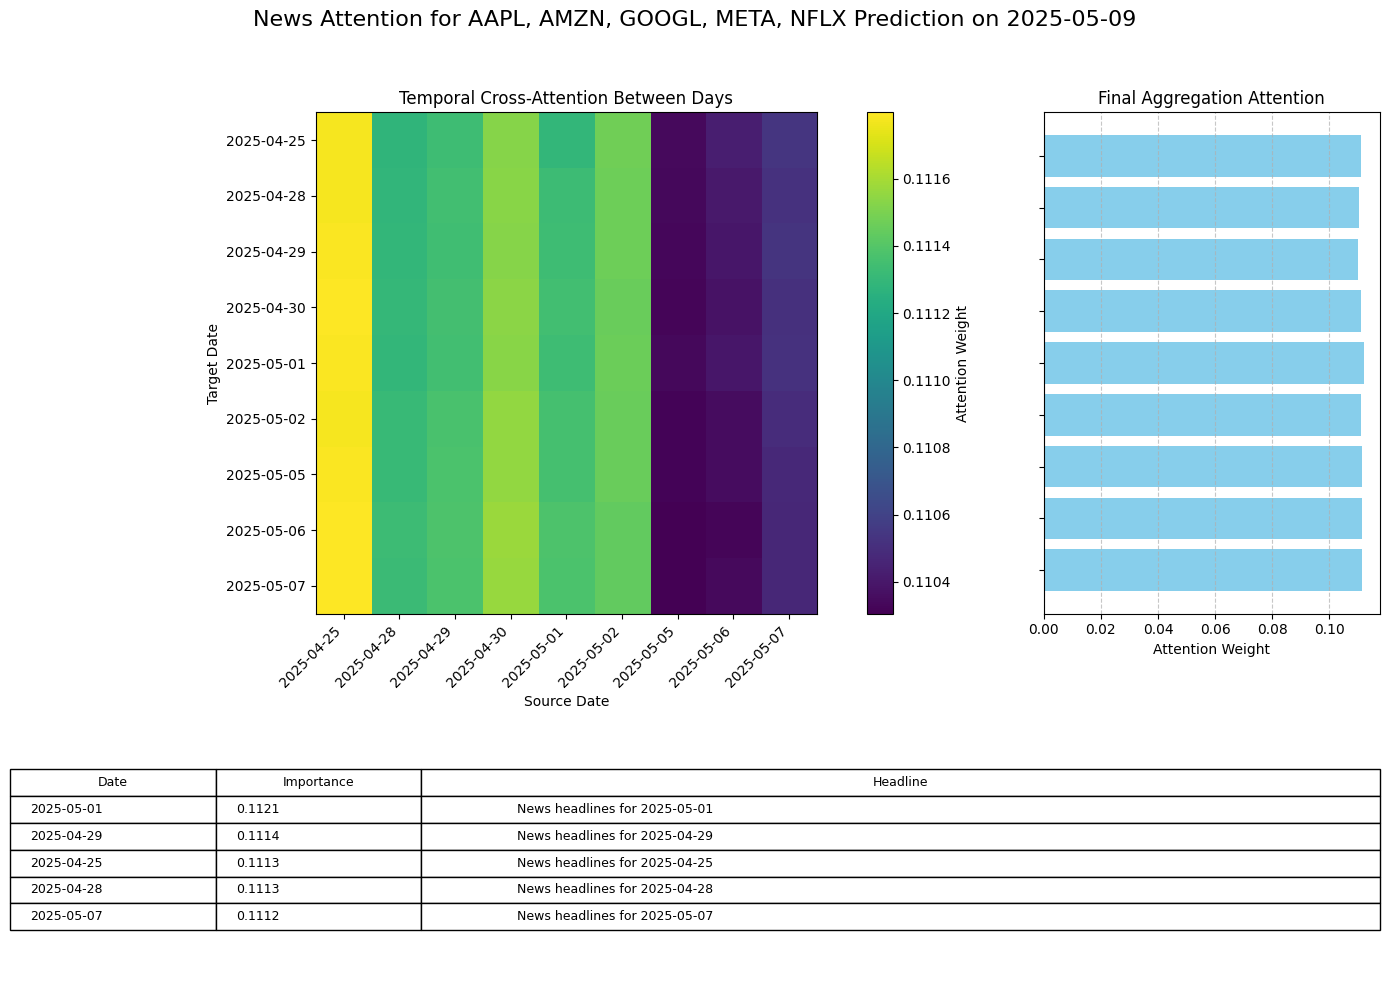

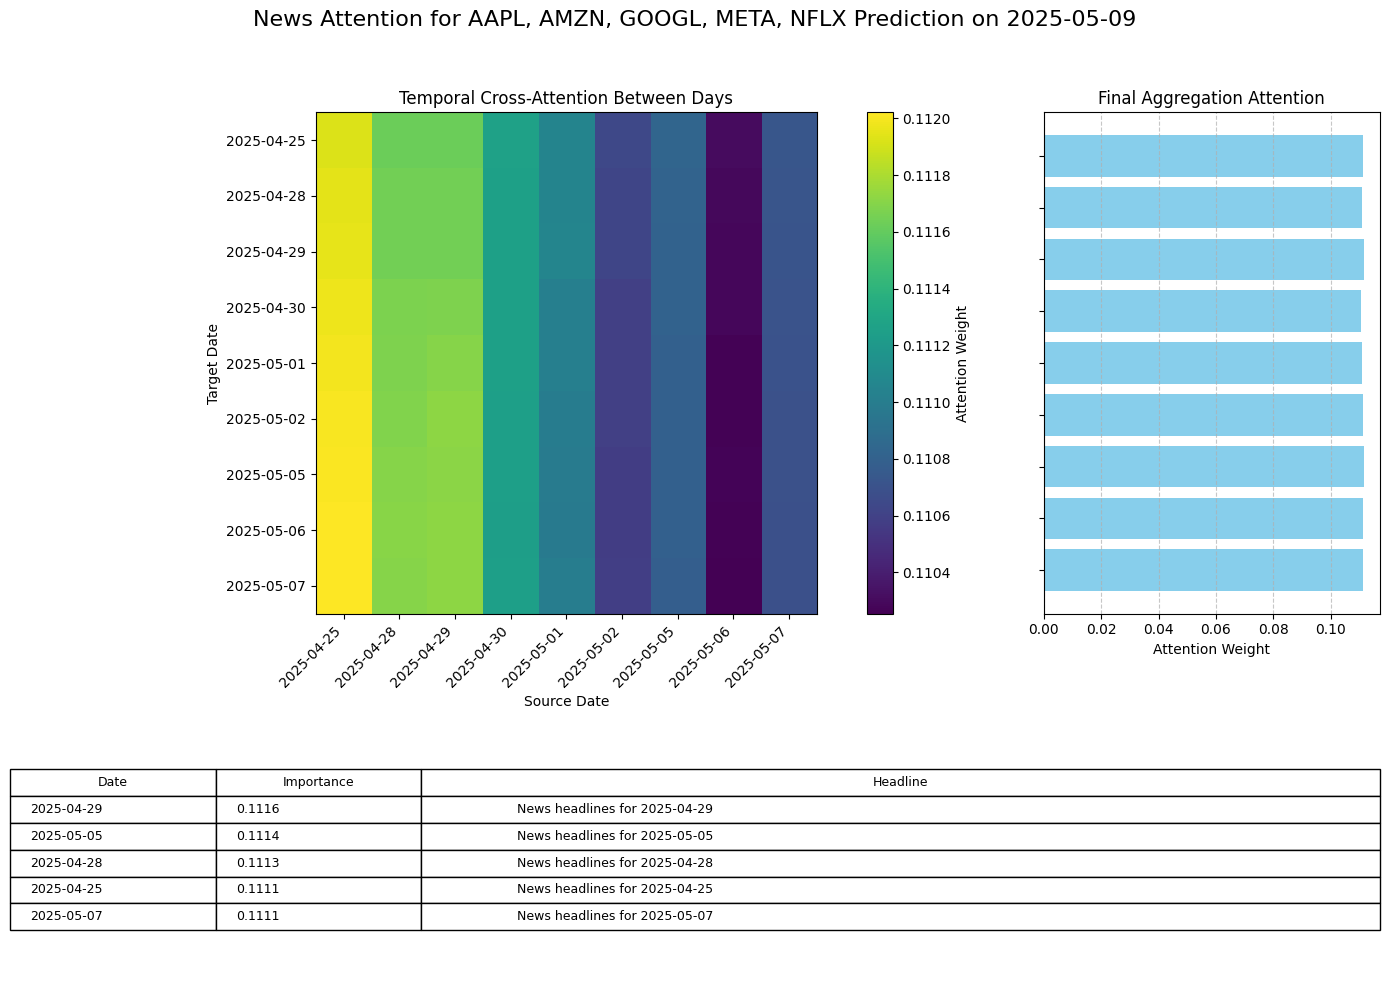

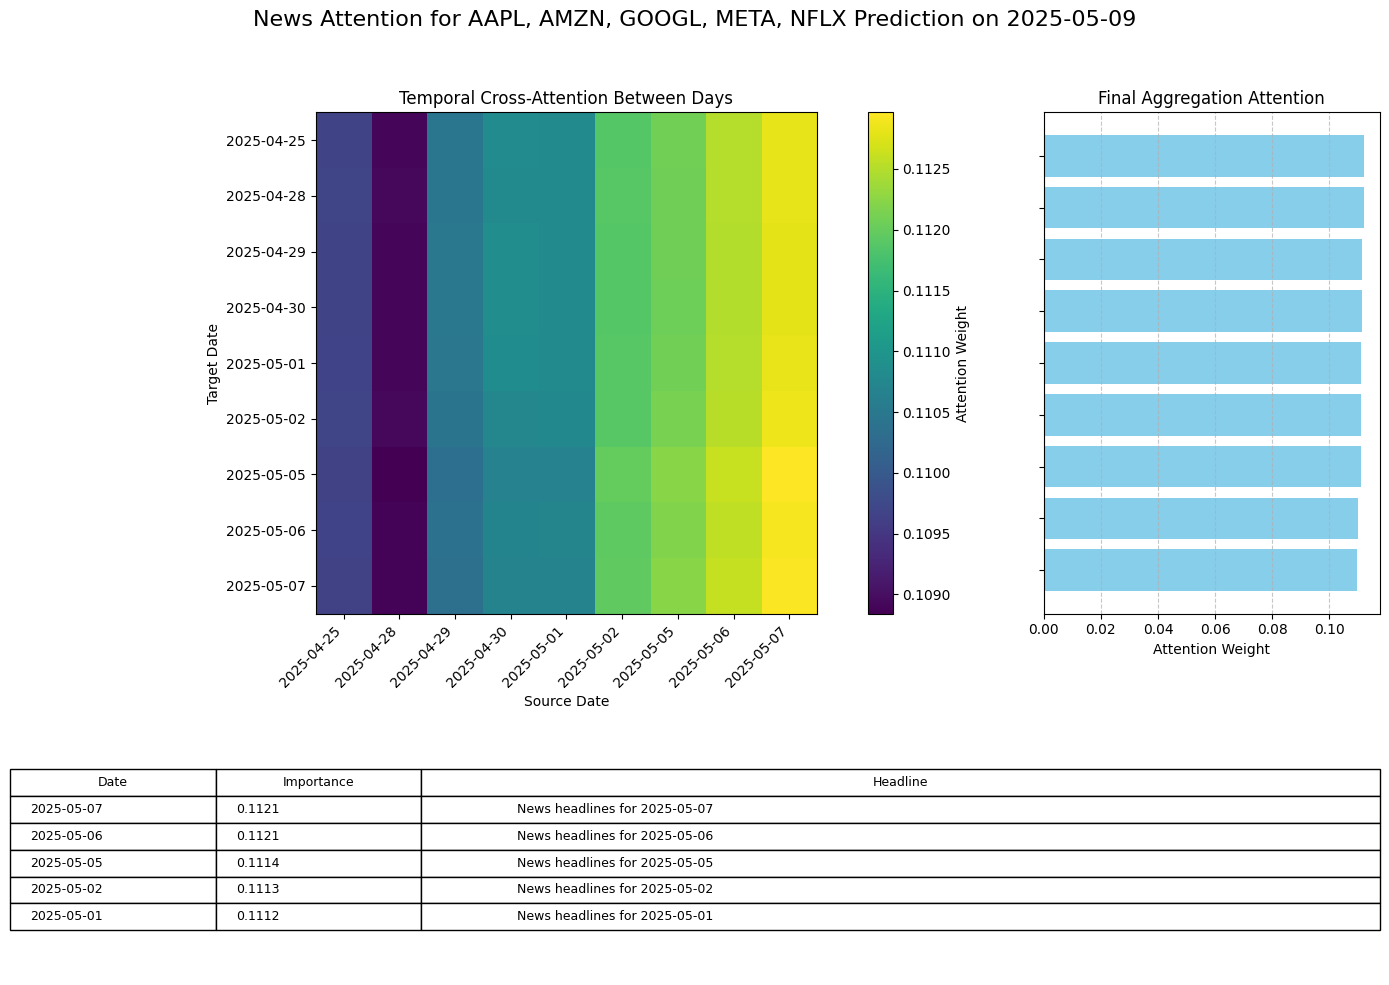

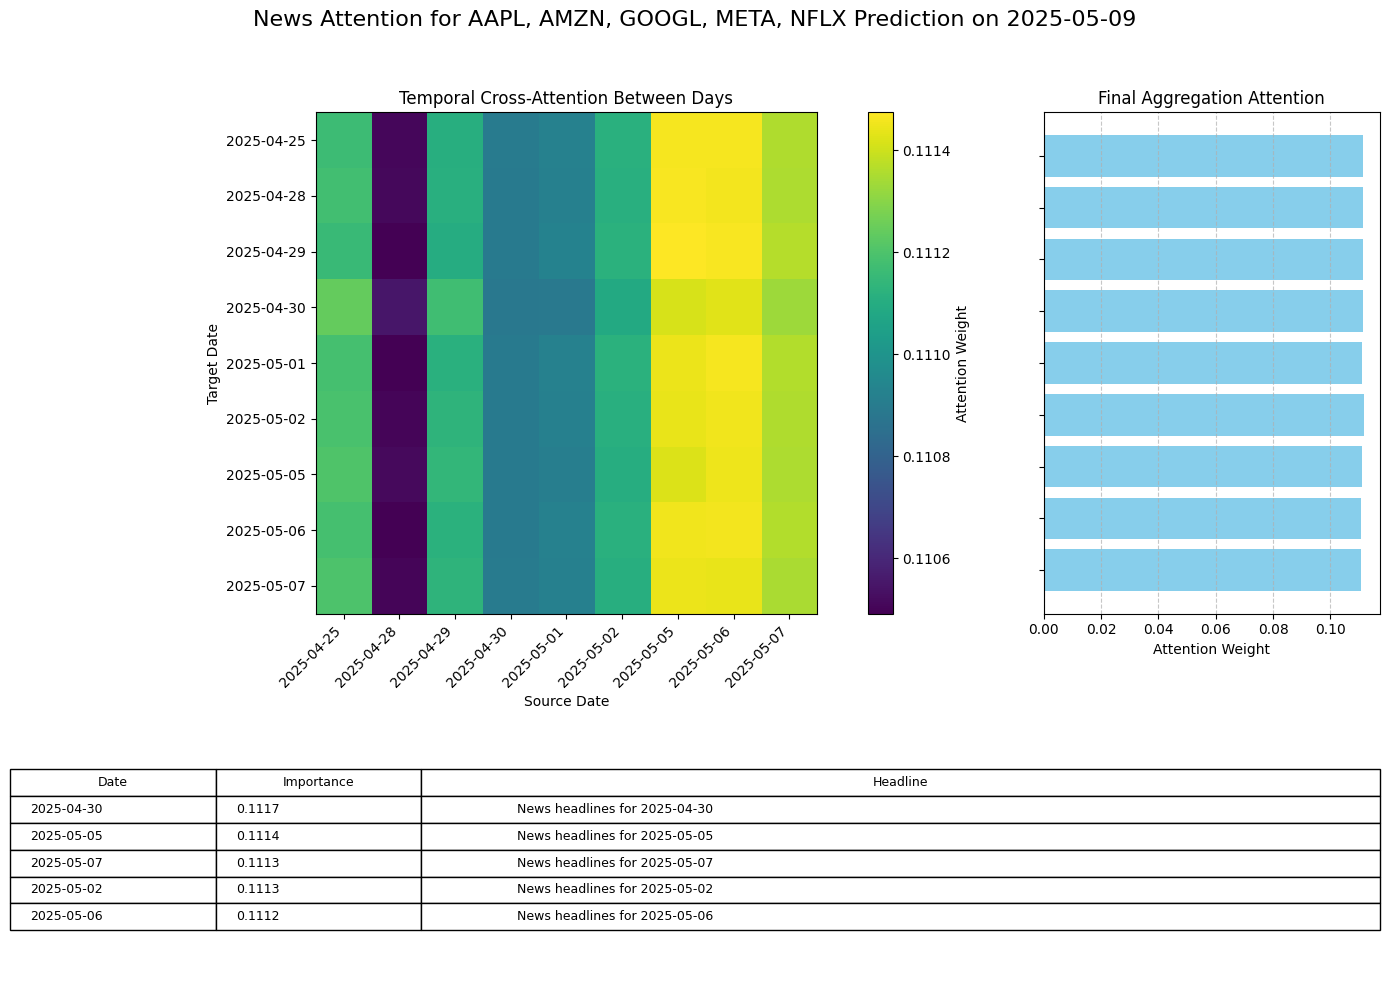

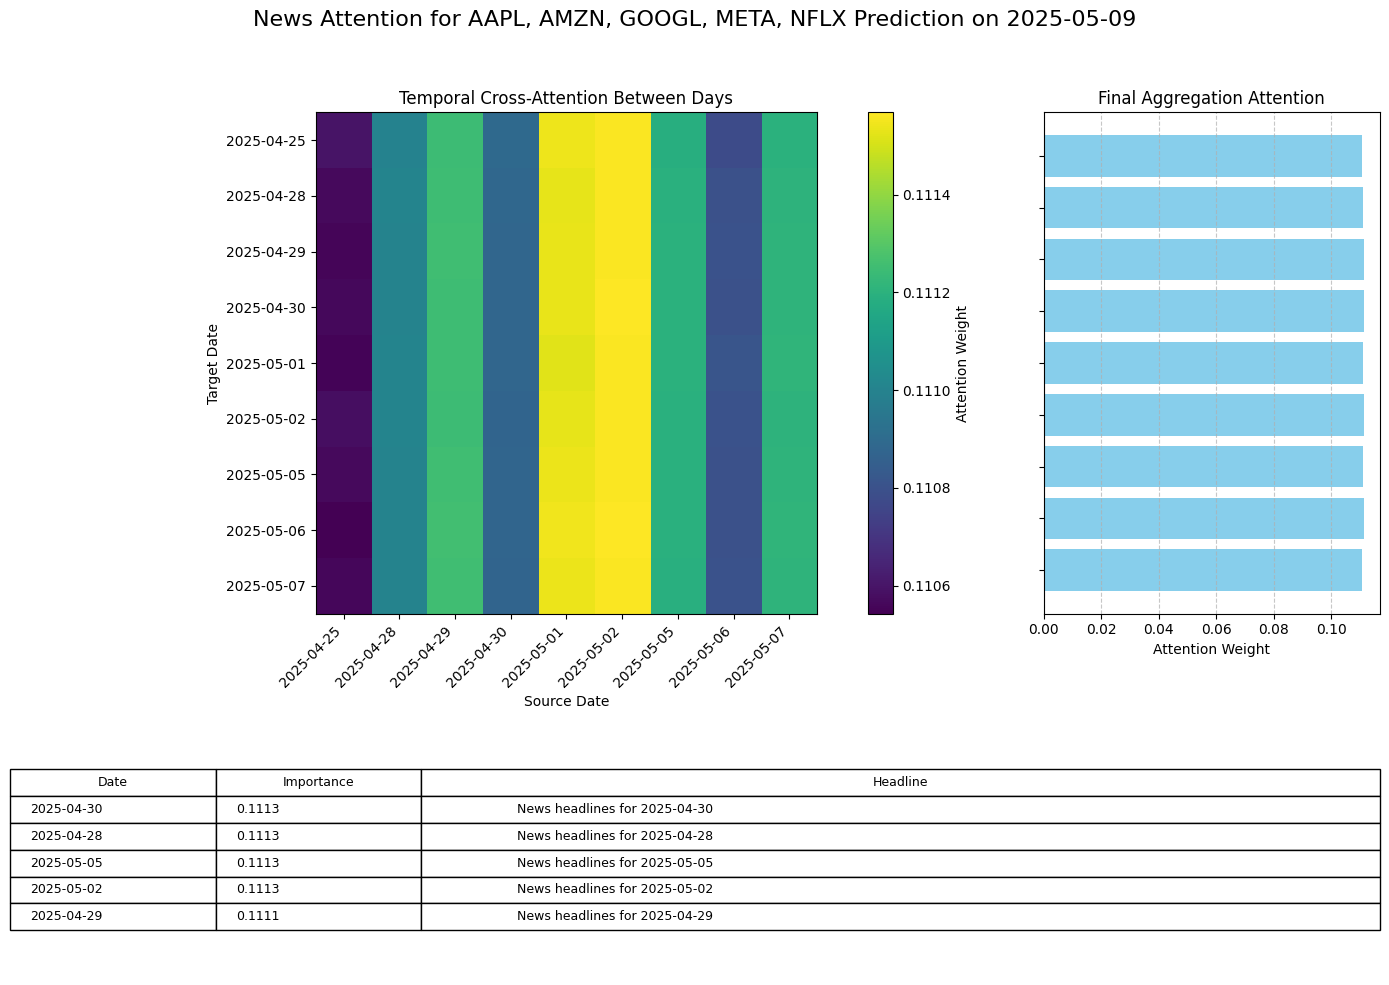

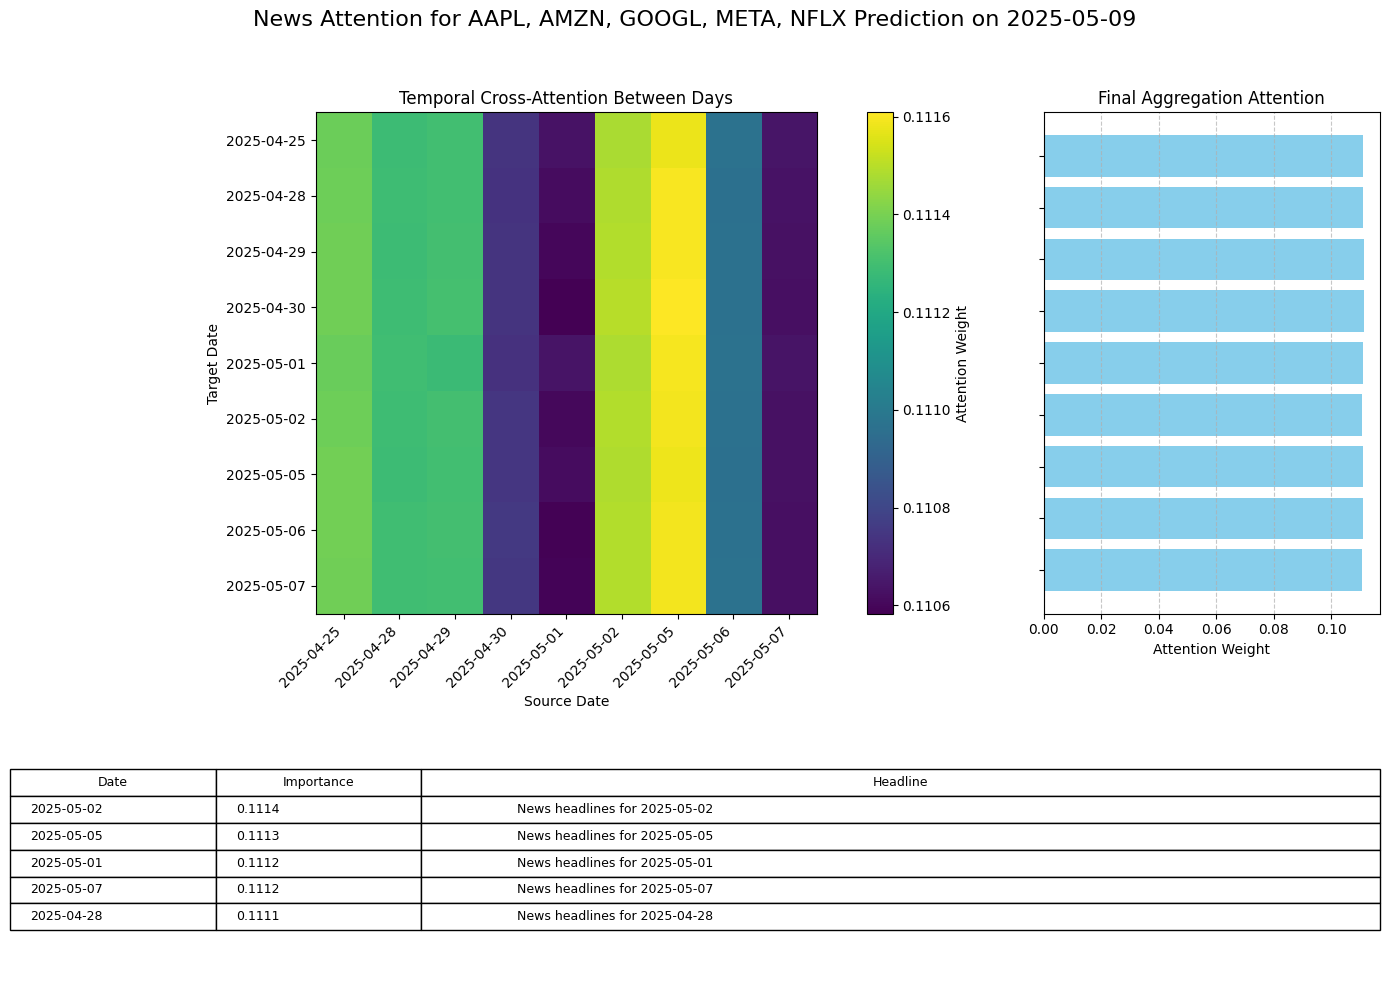

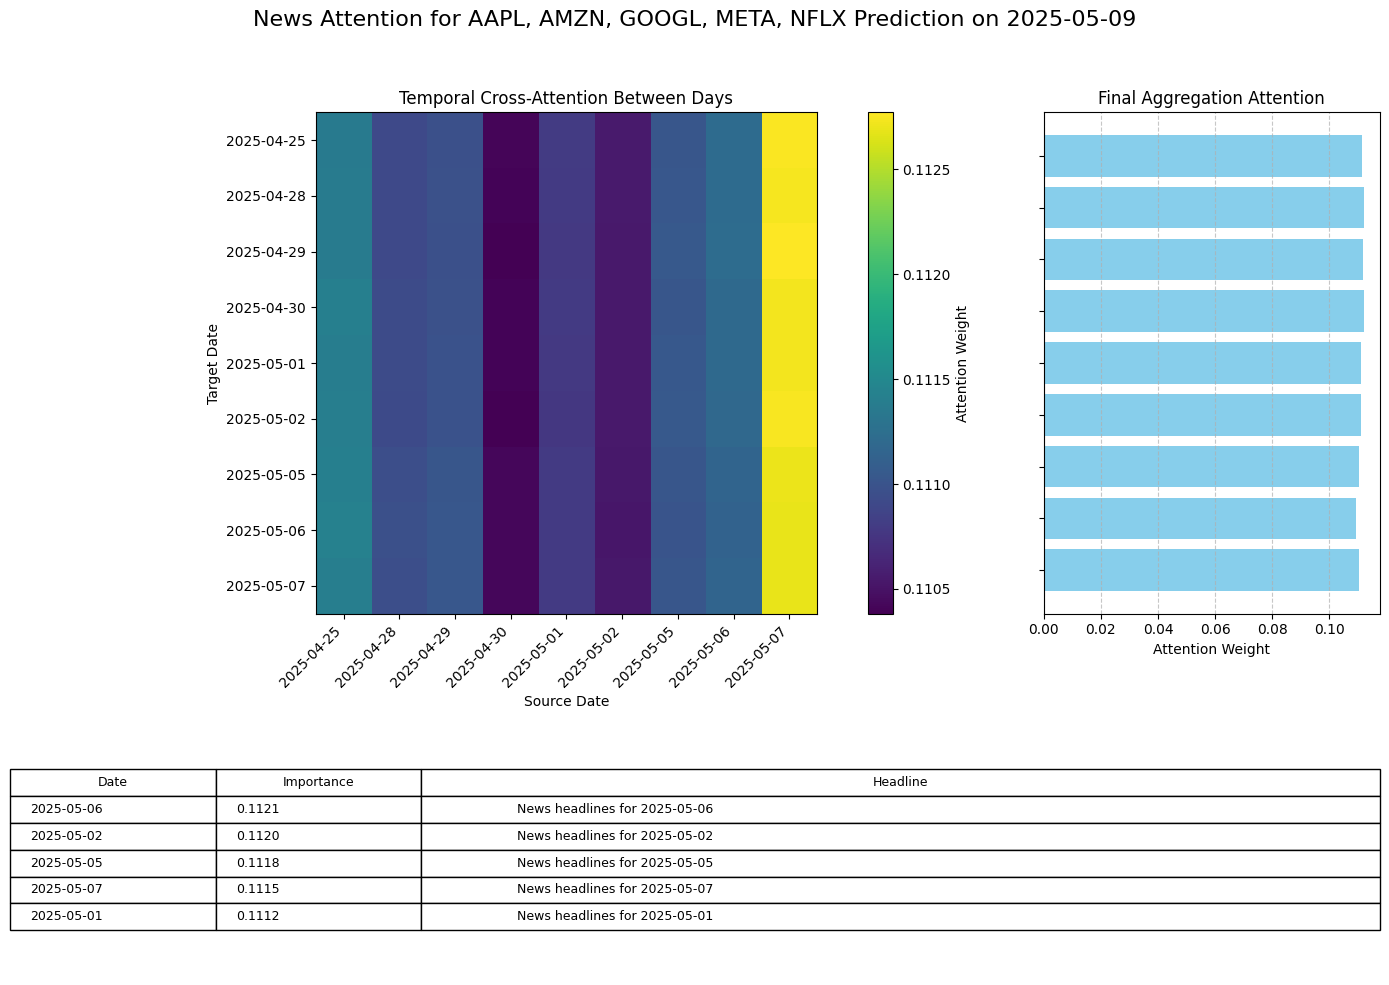

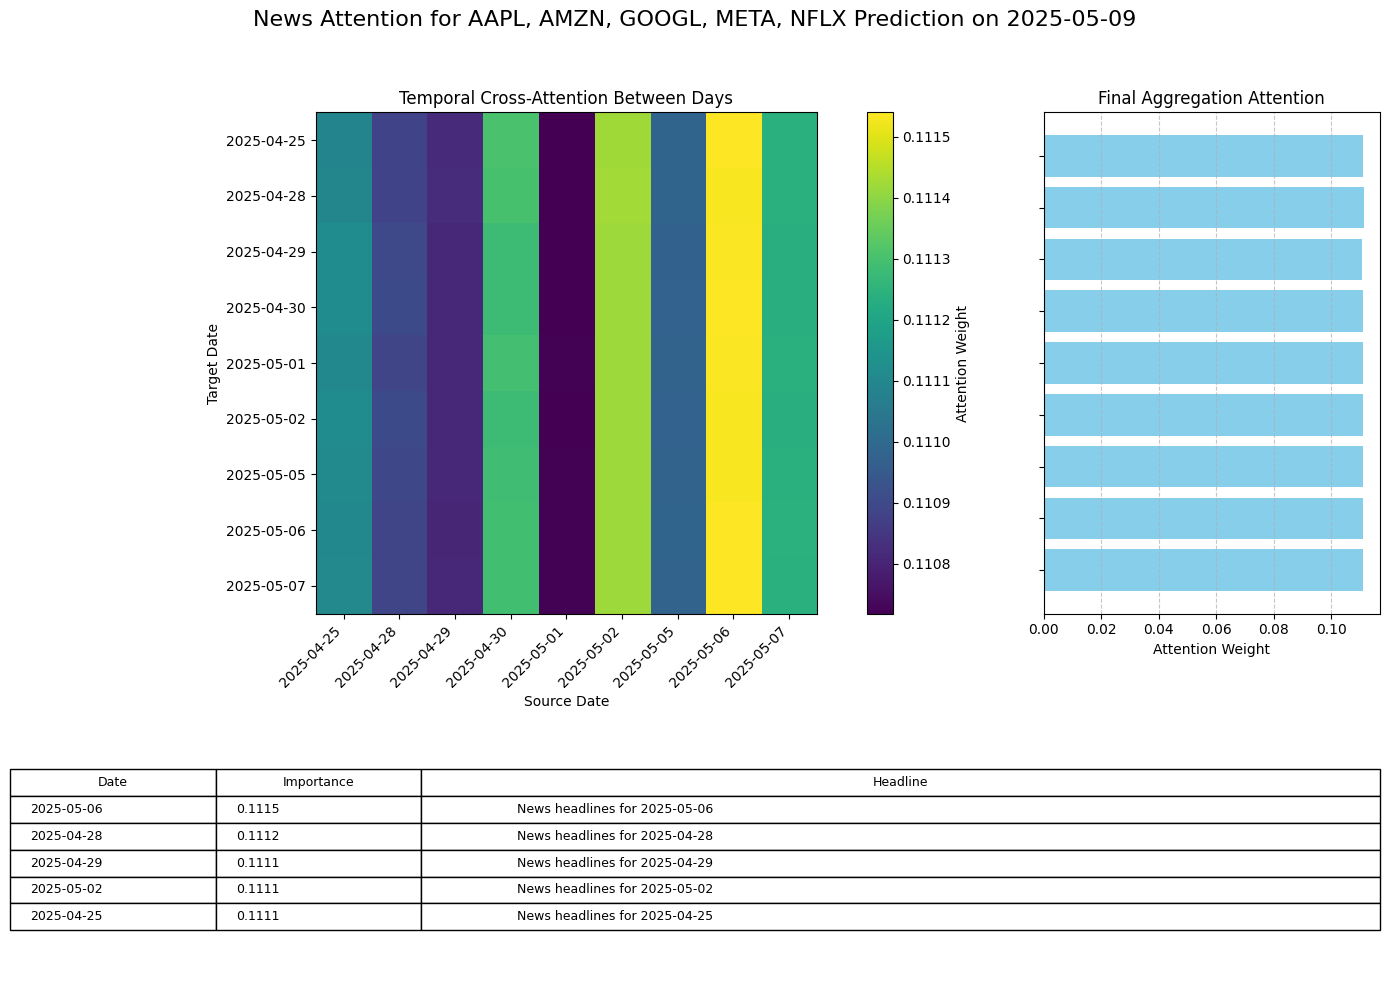

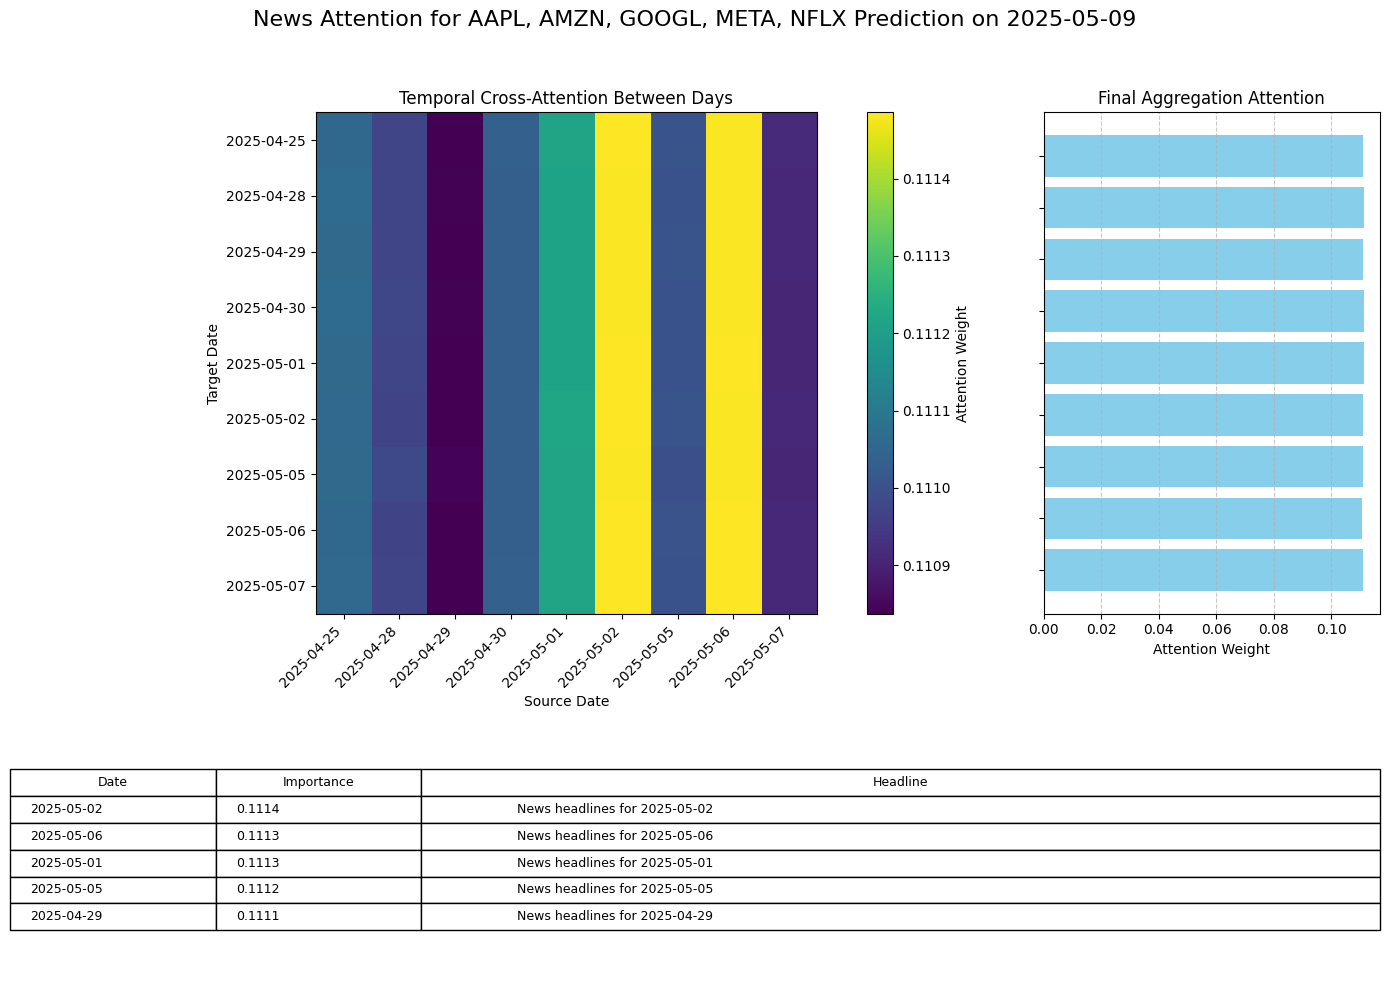

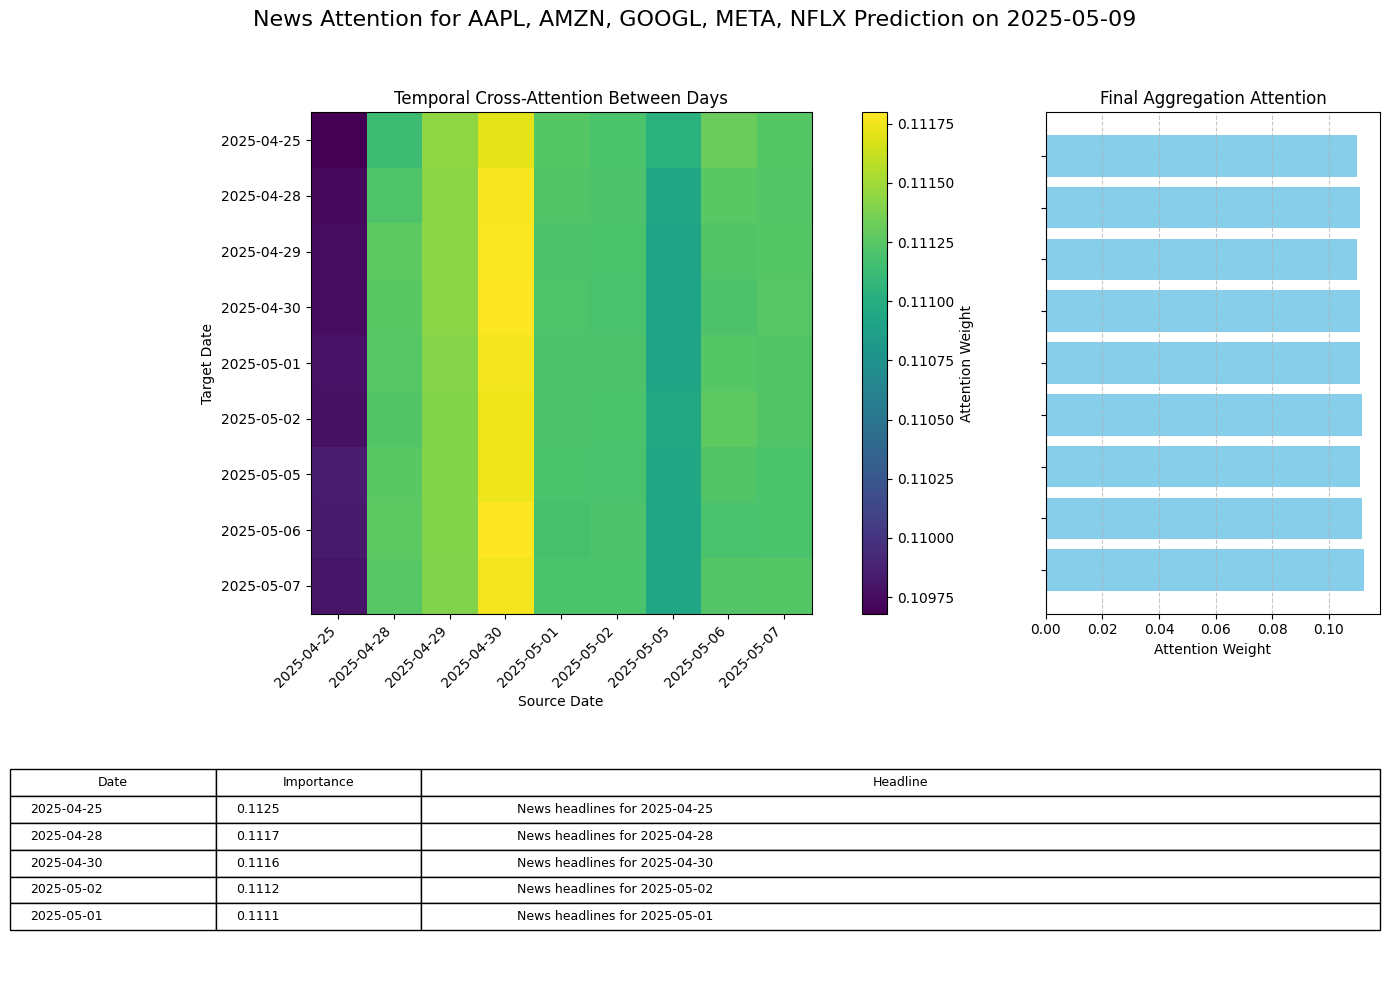

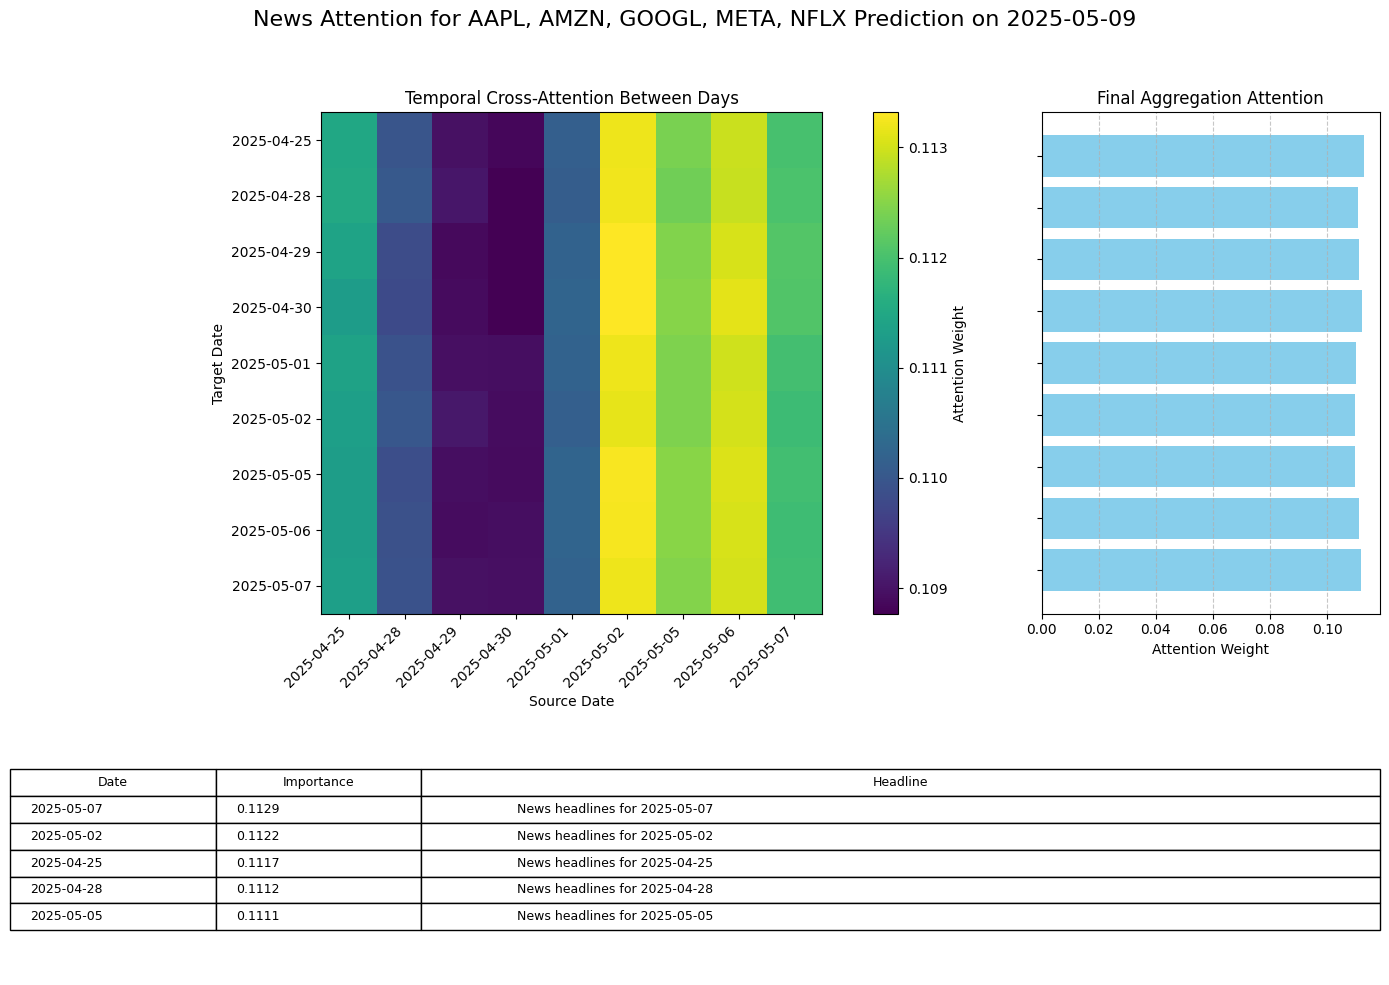

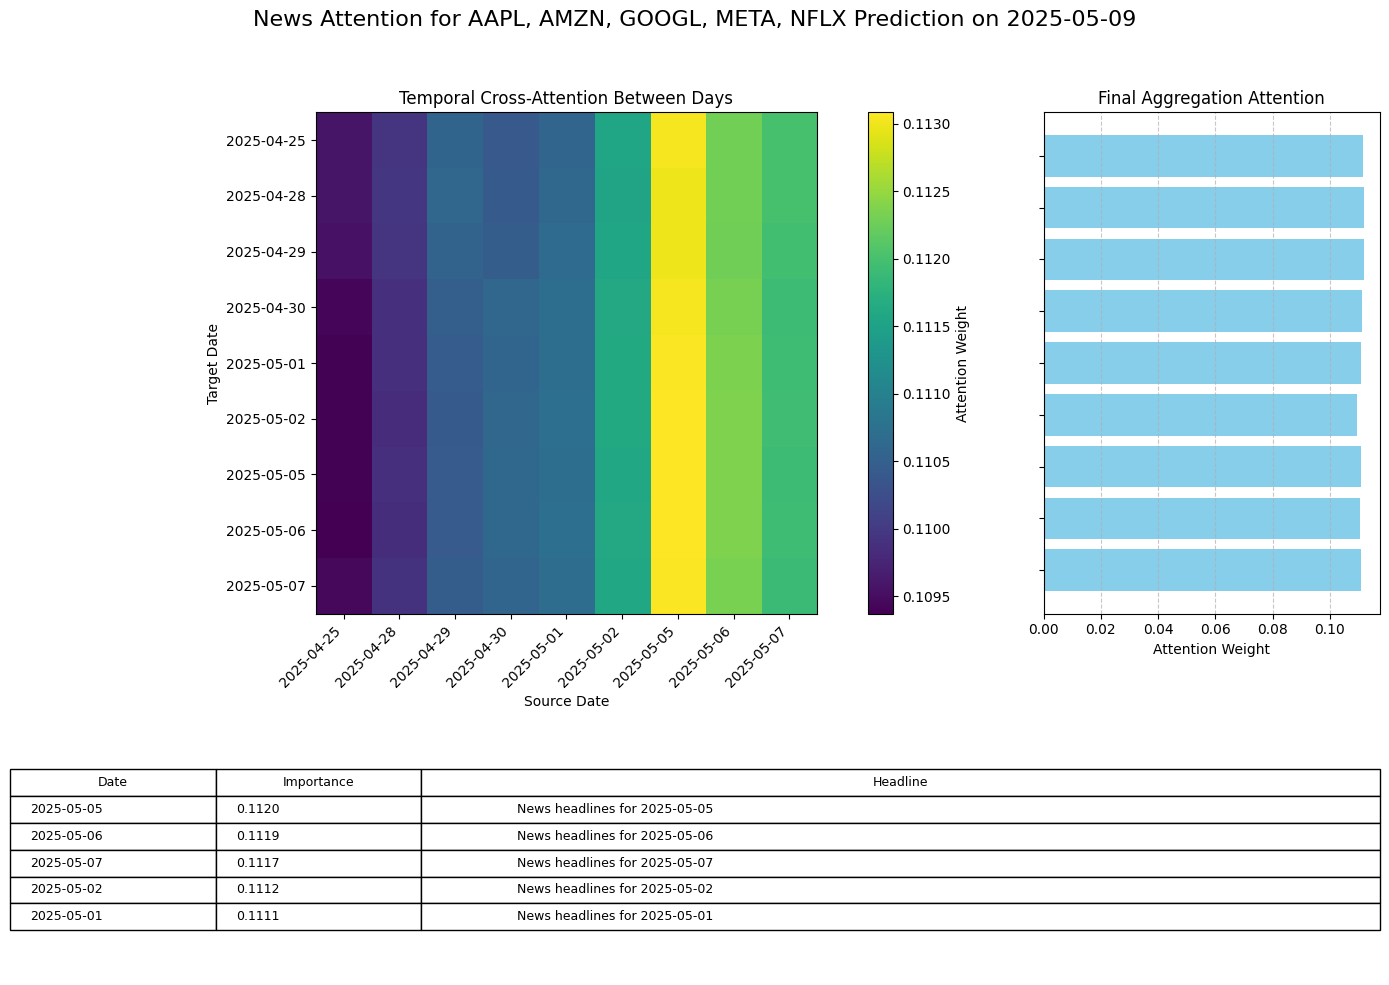

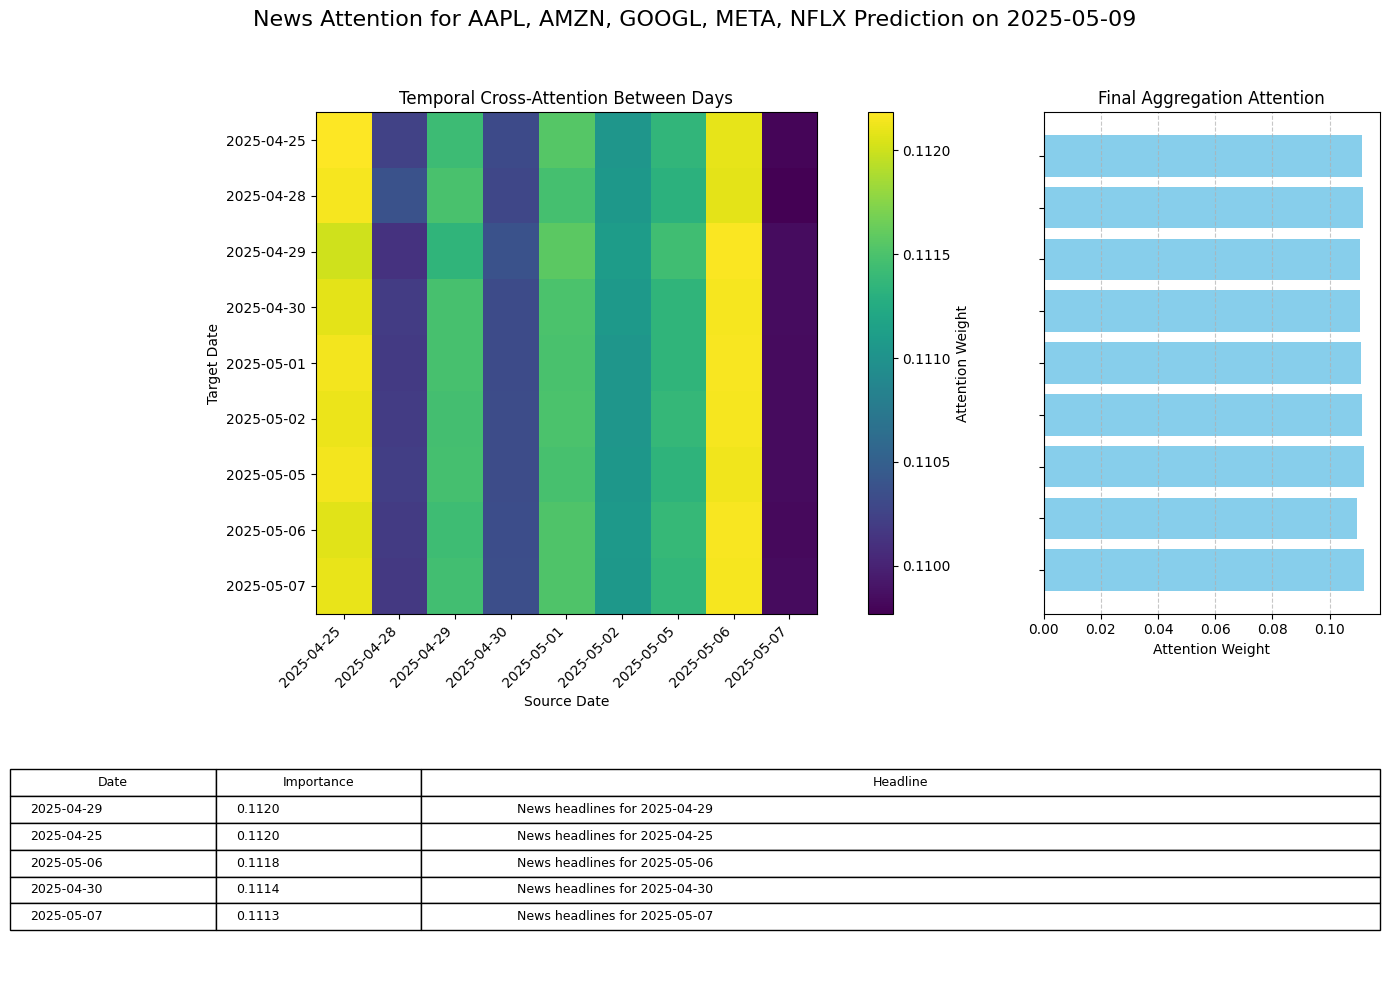

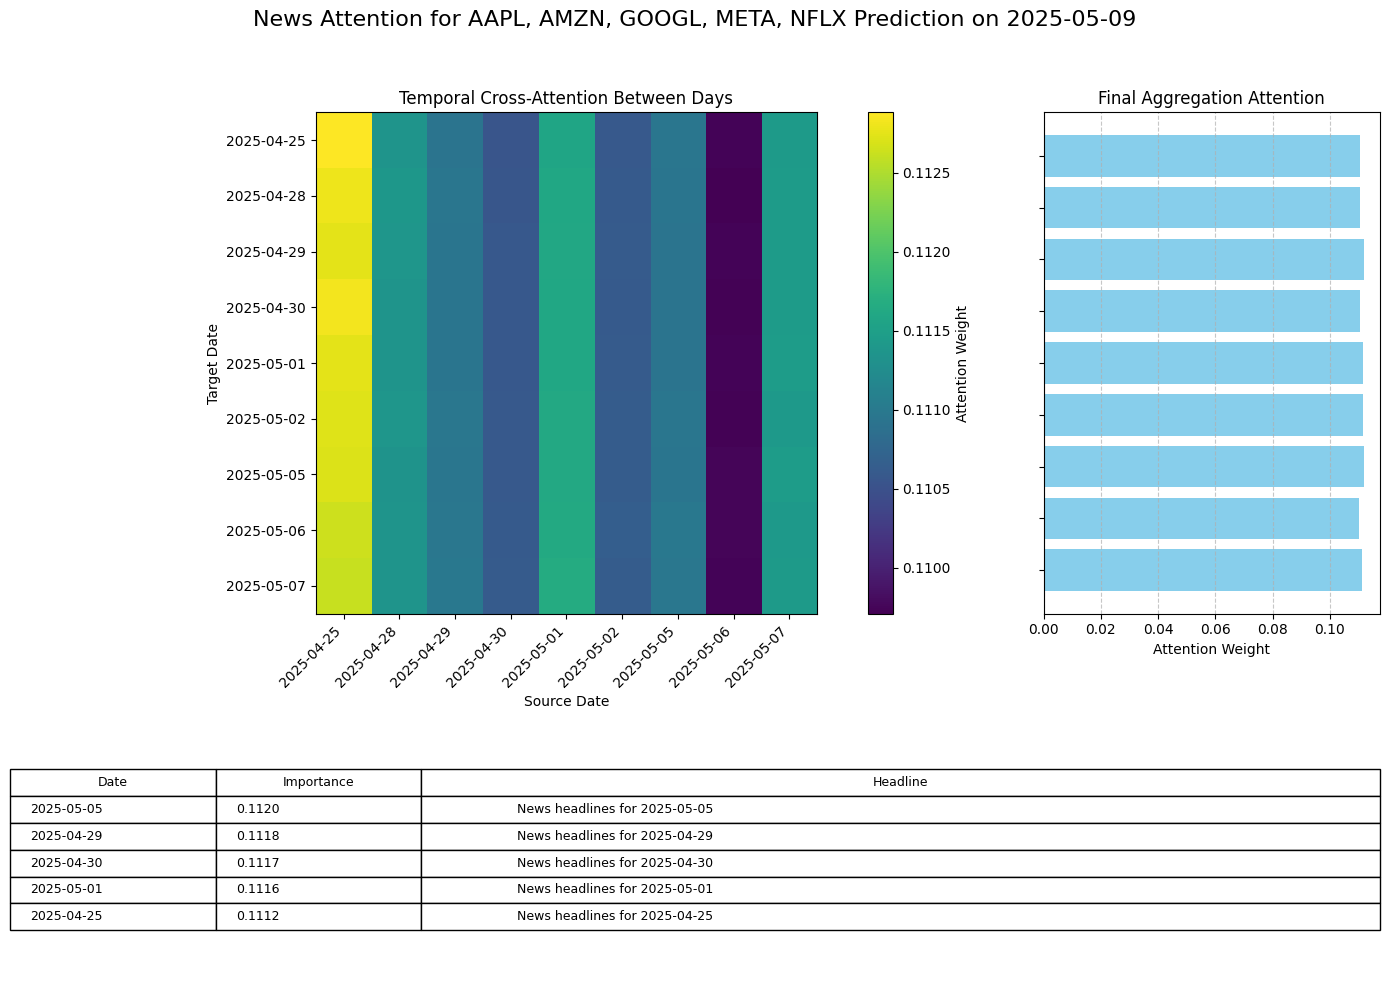

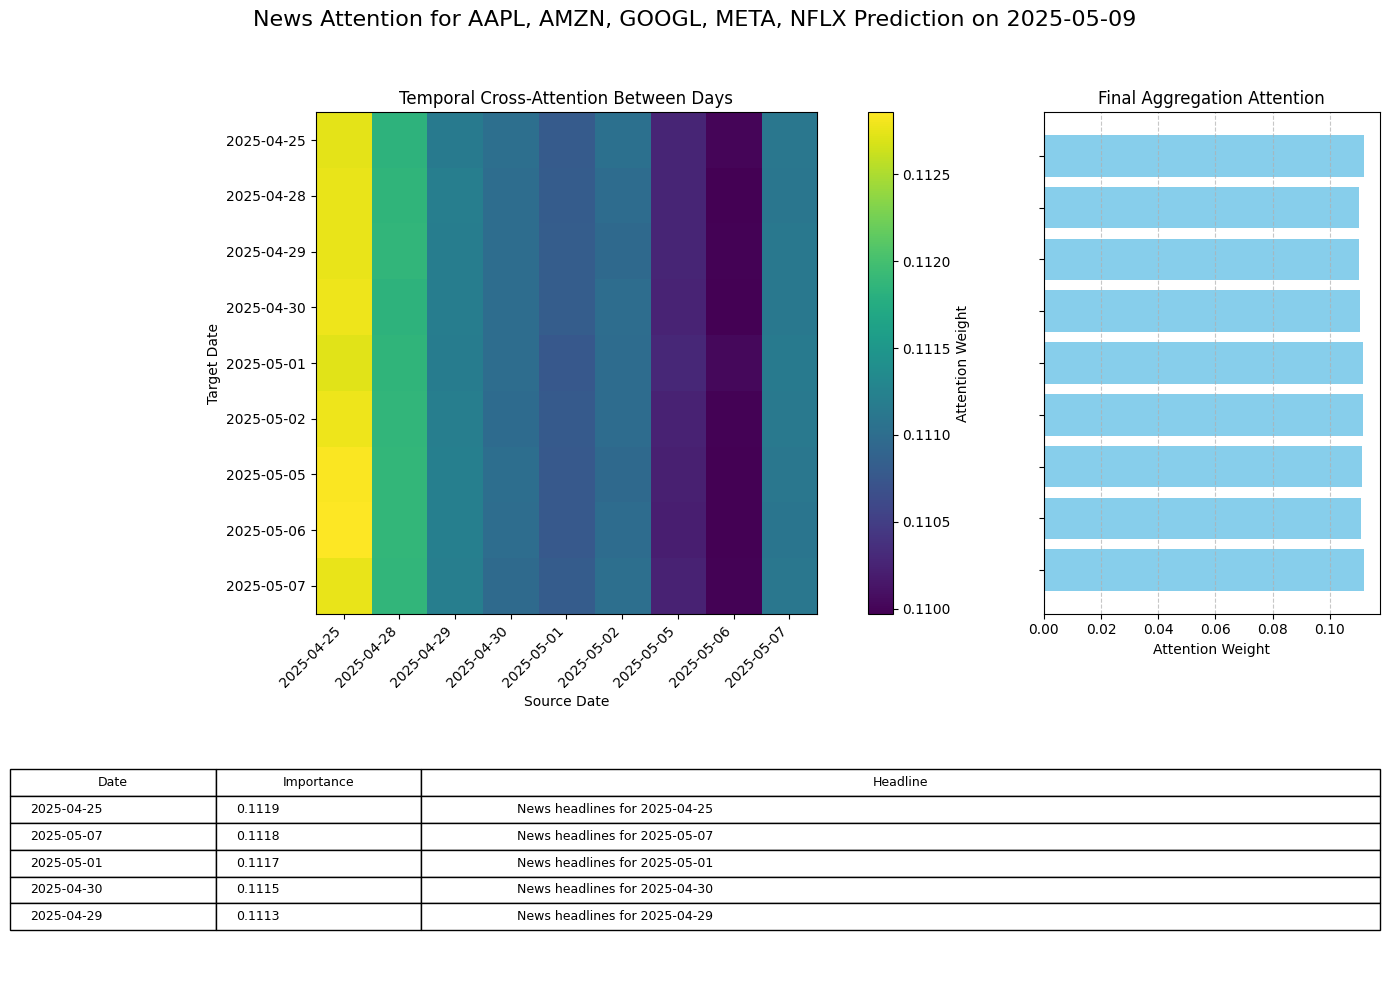

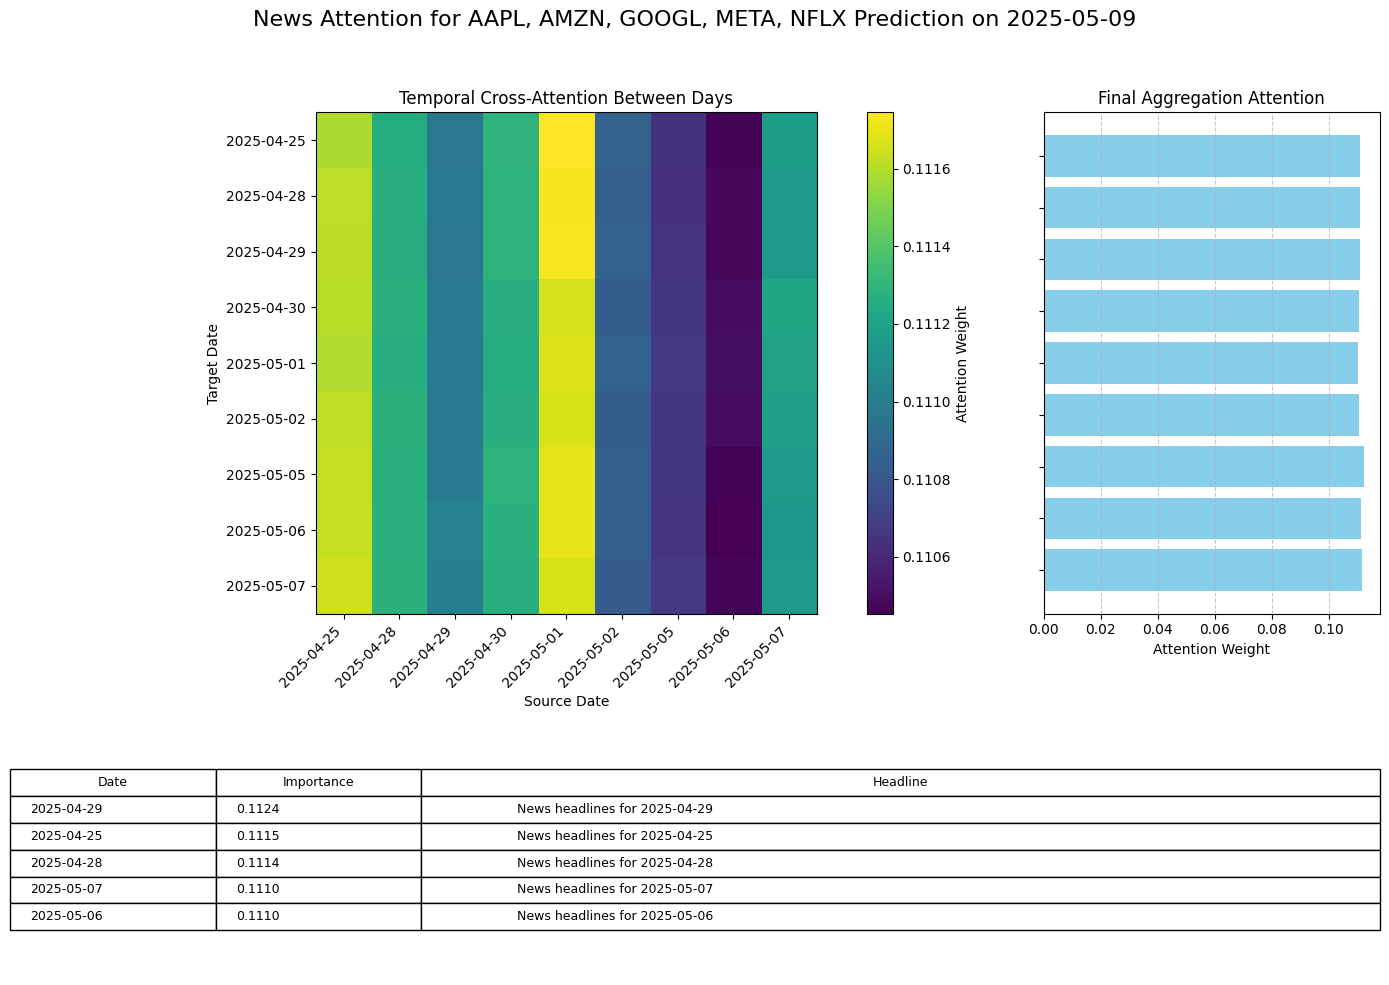

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import json
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from transformers import AutoModel, AutoConfig
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import math
import re
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.dates as mdates

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class NormalizationLayer(nn.Module):
    def __init__(self, method='standard', input_dim=None, output_dim=None):
        super().__init__()
        self.method = method
        if method == 'standard':
            self.input_normalizer = StandardScaler()
            self.output_normalizer = StandardScaler() if output_dim is not None else None
        elif method == 'minmax':
            self.input_normalizer = MinMaxScaler(feature_range=(-1, 1))
            self.output_normalizer = MinMaxScaler(feature_range=(-1, 1)) if output_dim is not None else None
        
        self.is_input_fitted = False
        self.is_output_fitted = False
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        # Store input statistics
        self.register_buffer('input_fitted', torch.tensor(False))
        # Store output statistics for output normalization if needed
        self.register_buffer('output_fitted', torch.tensor(False))
        
    def forward(self, x):
        # x shape: [batch_size, seq_len, features]
        batch_size, seq_len, features = x.shape
        device = x.device
        
        # Store feature dimensions for inverse transform
        if self.input_dim is None:
            self.input_dim = features
        
        # Reshape for sklearn normalizer
        x_reshaped = x.reshape(-1, features)
        x_cpu = x_reshaped.detach().cpu().numpy()
        
        if not self.is_input_fitted:
            x_normalized = self.input_normalizer.fit_transform(x_cpu)
            self.is_input_fitted = True
            
            # Store parameters for inverse transform
            if self.method == 'standard':
                self.register_buffer('input_mean', torch.tensor(self.input_normalizer.mean_, dtype=x.dtype))
                self.register_buffer('input_scale', torch.tensor(self.input_normalizer.scale_, dtype=x.dtype))
            elif self.method == 'minmax':
                self.register_buffer('input_min', torch.tensor(self.input_normalizer.data_min_, dtype=x.dtype))
                self.register_buffer('input_range', torch.tensor(self.input_normalizer.data_range_, dtype=x.dtype))
            
            self.input_fitted.fill_(True)
        else:
            x_normalized = self.input_normalizer.transform(x_cpu)
            
        # Convert back to tensor
        x_normalized = torch.tensor(x_normalized, dtype=x.dtype, device=device)
        return x_normalized.reshape(batch_size, seq_len, features)
    
    def fit_output_normalizer(self, y):
        """Fit the output normalizer with target data"""
        if self.output_normalizer is None:
            return
            
        # Get shape information
        if len(y.shape) == 3:  # [batch_size, seq_len, features]
            batch_size, seq_len, features = y.shape
            y_reshaped = y.reshape(-1, features)
        elif len(y.shape) == 2:  # [batch_size, features]
            batch_size, features = y.shape
            y_reshaped = y
        else:
            raise ValueError(f"Unexpected shape for output: {y.shape}")
            
        # Store output dimension
        if self.output_dim is None:
            self.output_dim = features
            
        # Fit the normalizer
        y_cpu = y_reshaped.detach().cpu().numpy()
        self.output_normalizer.fit(y_cpu)
        self.is_output_fitted = True
        
        # Store parameters
        if self.method == 'standard':
            self.register_buffer('output_mean', torch.tensor(self.output_normalizer.mean_, dtype=y.dtype))
            self.register_buffer('output_scale', torch.tensor(self.output_normalizer.scale_, dtype=y.dtype))
        elif self.method == 'minmax':
            self.register_buffer('output_min', torch.tensor(self.output_normalizer.data_min_, dtype=y.dtype))
            self.register_buffer('output_range', torch.tensor(self.output_normalizer.data_range_, dtype=y.dtype))
            
        self.output_fitted.fill_(True)
    
    def normalize_output(self, y):
        """Normalize output data"""
        if not self.is_output_fitted:
            return y
            
        original_shape = y.shape
        device = y.device
        
        # Reshape if needed
        if len(original_shape) == 3:  # [batch_size, seq_len, features]
            batch_size, seq_len, features = original_shape
            y_reshaped = y.reshape(-1, features)
        elif len(original_shape) == 2:  # [batch_size, features]
            y_reshaped = y
        else:
            raise ValueError(f"Unexpected shape for output: {original_shape}")
            
        # Transform
        y_cpu = y_reshaped.detach().cpu().numpy()
        y_normalized = self.output_normalizer.transform(y_cpu)
        
        # Convert back to tensor and reshape
        y_normalized = torch.tensor(y_normalized, dtype=y.dtype, device=device)
        
        if len(original_shape) == 3:
            y_normalized = y_normalized.reshape(original_shape)
            
        return y_normalized
    
    def inverse_transform(self, x):
        """Transform normalized data back to original scale"""
        device = x.device
        original_shape = x.shape
        
        # Handle different shapes
        if len(original_shape) == 3:  # [batch_size, seq_len, features]
            batch_size, seq_len, features = original_shape
            x_reshaped = x.reshape(-1, features)
        elif len(original_shape) == 2:  # [batch_size, features]
            features = original_shape[1]
            x_reshaped = x
        else:
            raise ValueError(f"Unexpected shape for inverse transform: {original_shape}")
        
        # Check if we're dealing with input or output features
        if features == self.input_dim:
            # This is input data
            if self.method == 'standard':
                mean = self.input_mean
                scale = self.input_scale
            elif self.method == 'minmax':
                data_min = self.input_min
                data_range = self.input_range
        elif features == self.output_dim and self.is_output_fitted:
            # This is output data
            if self.method == 'standard':
                mean = self.output_mean
                scale = self.output_scale
            elif self.method == 'minmax':
                data_min = self.output_min
                data_range = self.output_range
        else:
            raise ValueError(f"Cannot inverse transform tensor with {features} features. "
                            f"Expected either input_dim={self.input_dim} or output_dim={self.output_dim}")
        
        # Move to CPU for processing
        x_cpu = x_reshaped.detach().cpu().numpy()
        
        # Apply inverse transform based on method
        if self.method == 'standard':
            x_original = x_cpu * scale.cpu().numpy() + mean.cpu().numpy()
        elif self.method == 'minmax':
            x_original = x_cpu * data_range.cpu().numpy() + data_min.cpu().numpy()
        
        # Convert back to tensor and reshape to original if needed
        x_original = torch.tensor(x_original, dtype=x.dtype, device=device)
        if len(original_shape) == 3:
            x_original = x_original.reshape(original_shape)
            
        return x_original

class LoRALinear(nn.Module):
    """
    Linear layer with Low-Rank Adaptation (LoRA)
    """
    def __init__(self, in_features, out_features, r=8, alpha=16):
        super().__init__()
        self.original = nn.Linear(in_features, out_features)
        self.lora_A = nn.Parameter(torch.zeros(in_features, r))
        self.lora_B = nn.Parameter(torch.zeros(r, out_features))
        self.scaling = alpha / r
        self.r = r
        # Initialize weights for LoRA
        nn.init.kaiming_uniform_(self.lora_A, a=math.sqrt(5))
        nn.init.zeros_(self.lora_B)

    def forward(self, x):
        # Original path
        original_output = self.original(x)
        # LoRA path
        lora_output = (x @ self.lora_A) @ self.lora_B
        # Combine with scaling
        return original_output + (lora_output * self.scaling)


class LoRATransformerWrapper(nn.Module):
    """
    Wrap a transformer model with LoRA adaptation in attention layers
    """
    def __init__(self, model, r=8, alpha=16):
        super().__init__()
        self.model = model
        self.r = r
        self.alpha = alpha
        self.apply_lora()

    def apply_lora(self):
        """
        Apply LoRA to the query and value projection layers in attention blocks
        """
        for name, module in self.model.named_modules():
            if isinstance(module, nn.Linear) and any(key in name for key in ['query', 'value']):
                in_features, out_features = module.in_features, module.out_features
                parent_name = '.'.join(name.split('.')[:-1])
                layer_name = name.split('.')[-1]

                # Create LoRA layer
                lora_layer = LoRALinear(in_features, out_features, r=self.r, alpha=self.alpha)
                # Copy weights from original layer
                lora_layer.original.weight.data = module.weight.data.clone()
                if module.bias is not None:
                    lora_layer.original.bias.data = module.bias.data.clone()

                # Set the LoRA layer in the parent module
                parent = self.model
                for part in parent_name.split('.'):
                    if part:
                        parent = getattr(parent, part)
                setattr(parent, layer_name, lora_layer)

    def forward(self, *args, **kwargs):
        return self.model(*args, **kwargs)


class TemporalAttentionLayer(nn.Module):
    """
    Temporal attention layer to capture relationships between days
    """
    def __init__(self, hidden_dim):
        super().__init__()
        self.query = nn.Linear(hidden_dim, hidden_dim)
        self.key = nn.Linear(hidden_dim, hidden_dim)
        self.value = nn.Linear(hidden_dim, hidden_dim)
        
        # Scaling factor for dot product attention
        self.scale = torch.sqrt(torch.tensor(hidden_dim, dtype=torch.float32))
        
        # Layer norm for pre and post attention
        self.layer_norm1 = nn.LayerNorm(hidden_dim)
        self.layer_norm2 = nn.LayerNorm(hidden_dim)
        
        # Feed-forward after attention with residual connection
        self.ff = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim * 4),
            nn.GELU(),
            nn.Linear(hidden_dim * 4, hidden_dim)
        )
        
        # Dropout
        self.dropout = nn.Dropout(0.1)
        
        # Store attention weights for visualization
        self.last_attn_weights = None

    def forward(self, x):
        """
        Args:
            x: Tensor of shape [batch_size, seq_len, hidden_dim]
        Returns:
            Tensor of shape [batch_size, seq_len, hidden_dim]
        """
        # Layer norm
        residual = x
        x = self.layer_norm1(x)
        
        # Get sequence length and batch size
        batch_size, seq_len, hidden_dim = x.shape
        
        # Compute query, key, value
        q = self.query(x)  # [batch_size, seq_len, hidden_dim]
        k = self.key(x)    # [batch_size, seq_len, hidden_dim]
        v = self.value(x)  # [batch_size, seq_len, hidden_dim]
        
        # Compute attention scores
        attn_scores = torch.bmm(q, k.transpose(1, 2)) / self.scale  # [batch_size, seq_len, seq_len]
        
        # Apply softmax to get attention probabilities
        attn_probs = F.softmax(attn_scores, dim=-1)  # [batch_size, seq_len, seq_len]
        
        # Store attention weights for visualization
        self.last_attn_weights = attn_probs.detach().clone()
        
        attn_probs = self.dropout(attn_probs)
        
        # Apply attention to values
        context = torch.bmm(attn_probs, v)  # [batch_size, seq_len, hidden_dim]
        
        # First residual connection
        context = context + residual
        
        # Layer norm and feed-forward with second residual connection
        residual = context
        context = self.layer_norm2(context)
        context = self.ff(context)
        context = self.dropout(context)
        output = context + residual
        
        return output

class TemporalAggregationLayer(nn.Module):
    """
    Aggregates temporal information to produce final representation
    """
    def __init__(self, hidden_dim):
        super().__init__()
        
        # Attention-based aggregation
        self.query = nn.Parameter(torch.randn(1, hidden_dim))
        self.key = nn.Linear(hidden_dim, hidden_dim)
        self.scale = torch.sqrt(torch.tensor(hidden_dim, dtype=torch.float32))
            
        # Final projection
        self.out_proj = nn.Linear(hidden_dim, hidden_dim)
        
        # Store attention weights for visualization
        self.last_attn_weights = None
        
    def forward(self, x):
        """
        Args:
            x: Tensor of shape [batch_size, seq_len, hidden_dim]
        Returns:
            Tensor of shape [batch_size, hidden_dim]
        """
        batch_size, seq_len, hidden_dim = x.shape
        
        # Expand query to batch size
        q = self.query.expand(batch_size, -1)  # [batch_size, hidden_dim]
        
        # Compute keys
        k = self.key(x)  # [batch_size, seq_len, hidden_dim]
        
        # Compute attention scores
        attn_scores = torch.bmm(q.unsqueeze(1), k.transpose(1, 2)).squeeze(1) / self.scale  # [batch_size, seq_len]
        
        # Apply softmax to get attention probabilities
        attn_probs = F.softmax(attn_scores, dim=-1)  # [batch_size, seq_len]
        
        # Store attention weights for visualization
        self.last_attn_weights = attn_probs.detach().clone()
        
        # Apply attention to sequence
        context = torch.bmm(attn_probs.unsqueeze(1), x).squeeze(1)  # [batch_size, hidden_dim]
        
        # Final projection
        output = self.out_proj(context)
        
        return output


class TemporalTinyBERTStockPredictor(nn.Module):
    """
    Stock prediction model with temporal attention mechanisms
    """
    def __init__(self, input_dim=312, hidden_dim=312, output_dim=30, lora_r=8, lora_alpha=16, dropout_rate=0.3):
        super().__init__()
        
        # Add improved normalization layer with specified input and output dimensions
        self.norm_layer = NormalizationLayer(method='minmax', input_dim=hidden_dim, output_dim=output_dim)
        
        # Load TinyBERT model
        self.bert_config = AutoConfig.from_pretrained("huawei-noah/TinyBERT_General_4L_312D")
        self.bert = AutoModel.from_pretrained("huawei-noah/TinyBERT_General_4L_312D")
        
        # Apply LoRA to TinyBERT
        self.bert = LoRATransformerWrapper(self.bert, r=lora_r, alpha=lora_alpha)
        
        # Add dropout after BERT
        self.bert_dropout = nn.Dropout(dropout_rate)
        
        # Temporal attention layers
        self.temporal_attention = TemporalAttentionLayer(hidden_dim)
        
        # Temporal aggregation
        self.temporal_aggregation = TemporalAggregationLayer(hidden_dim)
        
        # Output layers with improved dropout
        bert_output_dim = self.bert_config.hidden_size
        self.fc1 = nn.Linear(bert_output_dim, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(dropout_rate)
        
        self.fc_out = nn.Linear(128, output_dim)

    def forward(self, x, return_attentions=False, attention_mask=None, return_denormalized=True):
        # Debug print to check normalization layer status
        print(f"Normalization layer fitted: {self.norm_layer.is_input_fitted}")
        
        batch_size, seq_len, embed_dim = x.shape
        
        # Apply normalization to input
        x = self.norm_layer(x)
        
        # Create attention mask if not provided
        if attention_mask is None:
            attention_mask = torch.ones(batch_size, seq_len, device=x.device)
            
        # Process with TinyBERT
        bert_outputs = self.bert(
            inputs_embeds=x,
            attention_mask=attention_mask,
            output_attentions=return_attentions
        )
        sequence_output = bert_outputs.last_hidden_state
        
        # Add dropout after BERT
        sequence_output = self.bert_dropout(sequence_output)
        
        # Process through temporal attention
        temporal_output = self.temporal_attention(sequence_output)
        
        # Aggregate temporal information
        aggregated_output = self.temporal_aggregation(temporal_output)
        
        # Output layers with improved dropout
        x1 = self.fc1(aggregated_output)
        x1 = self.bn1(x1)
        x1 = F.relu(x1)
        x1 = self.dropout1(x1)
        
        x2 = self.fc2(x1)
        x2 = self.bn2(x2)
        x2 = F.relu(x2)
        x2 = self.dropout2(x2)
        
        # Final output
        output = self.fc_out(x2)
        
        # Only denormalize if requested and normalizer is fitted
        if return_denormalized and hasattr(self.norm_layer, 'is_output_fitted') and self.norm_layer.is_output_fitted:
            output = self.norm_layer.inverse_transform(output)
            print("Denormalization applied to output")
        else:
            print("No denormalization applied:", 
                  "return_denormalized =", return_denormalized,
                  "is_output_fitted =", getattr(self.norm_layer, 'is_output_fitted', False))
        
        if return_attentions:
            attention_weights = {
                'bert_attention': bert_outputs.attentions if return_attentions else None,
                'temporal_attention': self.temporal_attention.last_attn_weights,
                'aggregation_attention': self.temporal_aggregation.last_attn_weights
            }
            return output, attention_weights
            
        return output

class NewsAttentionVisualizer:
    """
    Visualizes attention maps over news sequences to interpret which headlines influenced predictions
    """
    def __init__(self, model, date_format='%Y-%m-%d'):
        """
        Initialize the visualizer
        
        Args:
            model: Trained TemporalTinyBERTStockPredictor model
            date_format: Format string for dates in visualizations
        """
        self.model = model
        self.date_format = date_format
        self.model.eval()
        self.device = next(model.parameters()).device
        
    def _get_dates_for_sequence(self, target_date, sequence_length=9):
        """
        Generate a list of dates for the input sequence given the target prediction date
        
        Args:
            target_date: Datetime object for the prediction target date
            sequence_length: Number of days in the sequence (default: 9)
            
        Returns:
            List of datetime objects representing the sequence dates
        """
        # Generate dates for the past sequence_length days (excluding weekends)
        dates = []
        current_date = target_date
        
        while len(dates) < sequence_length:
            current_date = current_date - timedelta(days=1)
            # Skip weekends (0 = Monday, 6 = Sunday in datetime.weekday())
            if current_date.weekday() < 5:  # Weekday
                dates.append(current_date)
                
        # Reverse to get chronological order
        return list(reversed(dates))
    
    def visualize_sequence_attention(self, input_tensor, target_date=None, news_headlines=None,
                                    stock_symbols=None, save_path=None, figsize=(12, 10)):
        """
        Visualize attention maps for a single input sequence
        
        Args:
            input_tensor: Input tensor of shape [1, seq_len, embed_dim]
            target_date: Target prediction date (datetime object or string)
            news_headlines: Optional list of news headlines for each day in the sequence
            stock_symbols: List of stock symbols being predicted
            save_path: Path to save the visualization (optional)
            figsize: Figure size for the plot
            
        Returns:
            matplotlib figure object
        """
        # Move input to correct device
        input_tensor = input_tensor.to(self.device)
        
        # Create attention mask
        attention_mask = torch.ones(
            input_tensor.size(0), 
            input_tensor.size(1), 
            device=self.device
        )
        
        # Forward pass
        with torch.no_grad():
            outputs = self.model(
                input_tensor, 
                attention_mask=attention_mask,
                return_attentions=True
            )
            predictions = outputs[0]
            attention_weights = outputs[1] if len(outputs) > 1 else None
        
        # Move attention weights to CPU for visualization
        if attention_weights:
            attention_weights = {
                k: v.cpu() if isinstance(v, torch.Tensor) else v 
                for k, v in attention_weights.items()
            }
        
        # Convert target_date to datetime if it's a string
        if isinstance(target_date, str):
            target_date = datetime.strptime(target_date, self.date_format)
            
        # Default stock symbols if not provided
        if stock_symbols is None:
            stock_symbols = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX']
            
        # Get model predictions and attention weights
        with torch.no_grad():
            predictions, attention_weights = self.model(input_tensor, return_attentions=True)
            
        # Extract attention weights
        temporal_attn = attention_weights['temporal_attention'][0].cpu()  # [seq_len, seq_len]
        aggregation_attn = attention_weights['aggregation_attention'][0].cpu()  # [seq_len]
        
        # Generate sequence dates if target_date is provided
        dates = None
        if target_date is not None:
            dates = self._get_dates_for_sequence(target_date)
            date_labels = [d.strftime(self.date_format) for d in dates]
        else:
            # Use day indices if no dates provided
            date_labels = [f'Day {i+1}' for i in range(input_tensor.shape[1])]
            
        # Create default headlines if not provided
        if news_headlines is None:
            news_headlines = [f'News headlines for {label}' for label in date_labels]
            
        # Ensure we have the right number of headlines
        if len(news_headlines) != input_tensor.shape[1]:
            news_headlines = news_headlines[:input_tensor.shape[1]] if len(news_headlines) > input_tensor.shape[1] else \
                             news_headlines + [f'Day {i+1}' for i in range(len(news_headlines), input_tensor.shape[1])]
        
        # Create figure
        fig = plt.figure(figsize=figsize)
        gs = plt.GridSpec(2, 2, height_ratios=[2, 1], width_ratios=[3, 1])
        
        # Plot temporal attention heatmap
        ax1 = fig.add_subplot(gs[0, 0])
        im = ax1.imshow(temporal_attn.numpy(), cmap='viridis')
        ax1.set_title('Temporal Cross-Attention Between Days')
        ax1.set_xlabel('Source Date')
        ax1.set_ylabel('Target Date')
        ax1.set_xticks(range(len(date_labels)))
        ax1.set_yticks(range(len(date_labels)))
        ax1.set_xticklabels(date_labels, rotation=45, ha='right')
        ax1.set_yticklabels(date_labels)
        fig.colorbar(im, ax=ax1, label='Attention Weight')
        
        # Plot aggregation attention
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.barh(range(len(date_labels)), aggregation_attn.numpy(), color='skyblue')
        ax2.set_title('Final Aggregation Attention')
        ax2.set_xlabel('Attention Weight')
        ax2.set_yticks(range(len(date_labels)))
        ax2.set_yticklabels([])  # No labels needed as it aligns with the heatmap
        ax2.grid(axis='x', linestyle='--', alpha=0.7)
        
        # Plot headlines with their importance
        ax3 = fig.add_subplot(gs[1, :])
        
        # Create table with headlines and their importance scores
        cell_text = []
        importance_scores = aggregation_attn.numpy()
        
        # Sort by importance if there are more than 5 headlines
        if len(importance_scores) > 5:
            sorted_indices = np.argsort(-importance_scores)  # Sort in descending order
            top_indices = sorted_indices[:5]  # Take top 5
            
            for idx in top_indices:
                cell_text.append([
                    date_labels[idx],
                    f"{importance_scores[idx]:.4f}",
                    news_headlines[idx][:100] + ('...' if len(news_headlines[idx]) > 100 else '')
                ])
        else:
            for i, (date, score, headline) in enumerate(zip(date_labels, importance_scores, news_headlines)):
                cell_text.append([
                    date,
                    f"{score:.4f}",
                    headline[:100] + ('...' if len(headline) > 100 else '')
                ])
        
        table = ax3.table(
            cellText=cell_text,
            colLabels=['Date', 'Importance', 'Headline'],
            loc='center',
            cellLoc='left',
            colWidths=[0.15, 0.15, 0.7]
        )
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 1.5)
        ax3.axis('off')
        
        # Set title for the overall figure
        if target_date is not None:
            prediction_date = (target_date + timedelta(days=1)).strftime(self.date_format)
            plt.suptitle(f'News Attention for {", ".join(stock_symbols)} Prediction on {prediction_date}', 
                         fontsize=16)
        else:
            plt.suptitle(f'News Attention for {", ".join(stock_symbols)} Prediction', fontsize=16)
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        
        # Save if path provided
        if save_path:
            plt.savefig(save_path, bbox_inches='tight', dpi=300)
            
        return fig
    
    def analyze_batch(self, dataloader, csv_file=None, news_data=None, output_dir=None):
        """
        Analyze attention patterns for a batch of sequences
        
        Args:
            dataloader: DataLoader containing input sequences
            csv_file: Optional path to CSV file with dates and news headlines
            news_data: Optional dictionary mapping dates to news headlines
            output_dir: Directory to save visualizations
            
        Returns:
            Dictionary with attention analysis
        """
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)
            
        # Load news data if CSV file provided
        if csv_file and news_data is None:
            news_data = {}
            news_df = pd.read_csv(csv_file)
            for _, row in news_df.iterrows():
                date_str = row['date'] 
                news_data[date_str] = row['headlines']
                
        results = {
            'high_attention_days': [],
            'attention_patterns': [],
            'stock_influence': {}
        }
        
        batch_idx = 0
        stock_symbols = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX']
        
        for inputs, targets in dataloader:
            batch_size = inputs.shape[0]
            
            for i in range(batch_size):
                # Extract single sample
                input_tensor = inputs[i:i+1]
                
                # Forward pass with attention
                with torch.no_grad():
                    predictions, attention_weights = self.model(input_tensor, return_attentions=True)
                    
                # Extract attention weights
                aggregation_attn = attention_weights['aggregation_attention'][0].cpu().numpy()
                
                # Find day with highest attention
                max_attn_day = np.argmax(aggregation_attn)
                
                # Record this day
                results['high_attention_days'].append({
                    'sample_idx': batch_idx * batch_size + i,
                    'day_idx': max_attn_day,
                    'attention_value': float(aggregation_attn[max_attn_day]),
                })
                
                # Record overall attention pattern
                results['attention_patterns'].append({
                    'sample_idx': batch_idx * batch_size + i,
                    'pattern': aggregation_attn.tolist()
                })
                
                # If we have news_data and output_dir, create visualization
                if output_dir:
                    sample_path = os.path.join(output_dir, f'sample_{batch_idx * batch_size + i}_attention.png')
                    
                    # Get dates for this sequence (hypothetical - would need real dates)
                    # In a real implementation, you'd extract these from your dataset
                    target_date = datetime.now()  # Replace with actual target date
                    dates = self._get_dates_for_sequence(target_date)
                    
                    # Get headlines if we have news data
                    headlines = None
                    if news_data:
                        headlines = []
                        for date in dates:
                            date_str = date.strftime(self.date_format)
                            if date_str in news_data:
                                headlines.append(news_data[date_str])
                            else:
                                headlines.append(f"No headlines for {date_str}")
                    
                    # Create visualization
                    self.visualize_sequence_attention(
                        input_tensor, 
                        target_date=target_date,
                        news_headlines=headlines,
                        stock_symbols=stock_symbols,
                        save_path=sample_path
                    )
            
            batch_idx += 1
            
        # Analyze which days tend to have the highest attention overall
        day_counts = [0] * 9  # Assuming 9-day sequences
        for item in results['high_attention_days']:
            day_counts[item['day_idx']] += 1
            
        results['most_influential_days'] = {
            'counts': day_counts,
            'most_frequent': np.argmax(day_counts)
        }
        
        return results



class StockDataset:
    """
    Dataset for loading pre-processed embeddings and matching them with target values
    """
    def __init__(self, embeddings_path, stock_csv_path, metrics_count=6, stocks_count=5):
        """
        Initialize with paths to embeddings and stock data

        Args:
            embeddings_path (str): Path to embeddings tensor file (.pt)
            stock_csv_path (str): Path to CSV with target stock values for 10th day
            metrics_count (int): Number of metrics per stock (OHLCV + Adj Close = 6)
            stocks_count (int): Number of stocks
        """
        self.embeddings_path = embeddings_path
        self.stock_csv_path = stock_csv_path
        self.metrics_count = metrics_count
        self.stocks_count = stocks_count

        # Stock order mapping
        self.stock_order = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX']

        # Load the data
        self.load_data()

    def load_data(self):
        """
        Load embeddings and stock data, then create target tensors
        """
        print(f"Loading embeddings from {self.embeddings_path}")
        self.embeddings = torch.load(self.embeddings_path)

        print(f"Loading stock data from {self.stock_csv_path}")
        self.stock_df = self.load_stock_csv()

        # Create target tensors from stock CSV
        self.create_targets()

    def load_stock_csv(self):
        """Load and preprocess stock CSV file with target values"""
        print(f"Loading stock price data from {self.stock_csv_path}...")

        # Read the CSV file
        df = pd.read_csv(self.stock_csv_path)

        print("CSV structure sample:")
        print(df.head(1))
        print(f"CSV columns: {df.columns.tolist()}")

        return df

    def create_targets(self):
        """
        Create target tensors based on the specific CSV format with numbered columns
        Format: [Metric], [Metric].1, [Metric].2, etc. for each company
        """
        print("Creating target tensors...")

        # Base metrics in your CSV
        base_metrics = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

        # List to store all targets
        all_targets = []

        # Process each row in the dataframe
        for idx, row in self.stock_df.iterrows():
            # Extract target values for this row
            row_targets = []

            # For each stock (in order)
            for stock_idx in range(self.stocks_count):
                # For each metric
                for metric in base_metrics:
                    # For the first stock, column name is just the metric
                    # For subsequent stocks, column name is metric.1, metric.2, etc.
                    if stock_idx == 0:
                        col_name = metric
                    else:
                        col_name = f"{metric}.{stock_idx}"

                    # Get the value, with error handling
                    try:
                        value = float(row[col_name])
                        row_targets.append(value)
                    except (KeyError, ValueError) as e:
                        print(f"Error extracting {col_name} (for {self.stock_order[stock_idx]}): {e}")
                        # Use 0.0 as a fallback value
                        row_targets.append(0.0)

            all_targets.append(row_targets)

        if all_targets:
            self.targets = torch.tensor(all_targets, dtype=torch.float32)
            print(f"Created {len(all_targets)} targets with shape {self.targets.shape}")

            # Make sure we have the same number of targets as embeddings
            if len(all_targets) != self.embeddings.shape[0]:
                print(f"Warning: Number of targets ({len(all_targets)}) doesn't match number of embeddings ({self.embeddings.shape[0]})")

                # Take the minimum number to ensure alignment
                min_length = min(len(all_targets), self.embeddings.shape[0])
                self.targets = self.targets[:min_length]
                self.embeddings = self.embeddings[:min_length]
                print(f"Truncated to {min_length} matching examples")
        else:
            self.targets = None
            print("Warning: No targets created")

    def create_dataloader(self, batch_size=16, shuffle=True):
        """
        Create a DataLoader for the dataset

        Args:
            batch_size (int): Batch size
            shuffle (bool): Whether to shuffle samples

        Returns:
            torch.utils.data.DataLoader: DataLoader for the dataset
        """
        if self.targets is not None and self.embeddings is not None:
            dataset = TensorDataset(self.embeddings, self.targets)

            return DataLoader(
                dataset,
                batch_size=batch_size,
                shuffle=shuffle,
                num_workers=2,
                pin_memory=True
            )
        else:
            return None


class TimeSeriesDataLoader(DataLoader):
    """DataLoader that preserves temporal ordering"""
    
    def __init__(self, dataset, batch_size=1, shuffle=False, **kwargs):
        # Force shuffle to be False for time series data
        super().__init__(dataset, batch_size=batch_size, shuffle=False, **kwargs)

def create_chronological_batches(embeddings, targets, seq_length=9, batch_size=16):
    """Create batches that preserve chronological order"""
    num_samples = len(embeddings) - seq_length
    
    batch_inputs = []
    batch_targets = []
    
    for i in range(0, num_samples, batch_size):
        # Get batch indices
        batch_indices = list(range(i, min(i + batch_size, num_samples)))
        
        # For each index, create a sequence of the previous seq_length days
        batch_x = []
        batch_y = []
        
        for idx in batch_indices:
            # Input sequence: idx to idx+seq_length
            x_seq = embeddings[idx:idx+seq_length]
            # Target: the next day after sequence
            y = targets[idx+seq_length]
            
            batch_x.append(x_seq)
            batch_y.append(y)
            
        # Convert to tensors
        batch_inputs.append(torch.stack(batch_x))
        batch_targets.append(torch.stack(batch_y))
    
    return batch_inputs, batch_targets


class ImprovedStockPredictionTrainer:
    """
    Improved trainer for the stock prediction model
    """
    def __init__(self, model, optimizer, metrics_count=6, stocks_count=5, device='cuda'):
        """
        Initialize the trainer with improved metrics
        """
        self.model = model.to(device)
        self.optimizer = optimizer
        self.metrics_count = metrics_count
        self.stocks_count = stocks_count
        self.device = device
        self.scheduler = None
        self.has_fitted_output_normalizer = False

        # Use Huber loss for robustness against outliers
        self.criterion = nn.HuberLoss(delta=1.0)

        # Calculate the indices of closing prices in output
        self.close_indices = []
        for i in range(stocks_count):
            # Close price is index 3 in the metrics list
            close_idx = i * metrics_count + 3
            self.close_indices.append(close_idx)

        # Initialize past targets and predictions for directional accuracy
        self.prev_close_targets = None
        self.prev_close_preds = None

    def set_scheduler(self, scheduler):
        """Set learning rate scheduler"""
        self.scheduler = scheduler

    def fit_output_normalizer(self, data_loader):
        """
        Fit output normalizer with a batch of target data.
        This is important to do before training starts.
        """
        if hasattr(self.model, 'norm_layer') and hasattr(self.model.norm_layer, 'fit_output_normalizer'):
            print("Fitting output normalizer...")
            # Get a batch of target data
            for batch in data_loader:
                targets = batch[1].to(self.device)
                # Fit the output normalizer with this batch
                self.model.norm_layer.fit_output_normalizer(targets)
                self.has_fitted_output_normalizer = True
                print("Output normalizer fitted successfully!")
                break  # We only need one batch

    def extract_close_prices(self, predictions, targets):
        """Extract only closing price predictions and targets"""
        close_pred = predictions[:, self.close_indices]
        close_targets = targets[:, self.close_indices]
        return close_pred, close_targets

    def calculate_directional_accuracy(self, current_preds, current_targets, prev_preds=None, prev_targets=None, threshold=0.01):
        """
        Calculate directional accuracy considering local maxima/minima and significant movements
        
        Args:
            current_preds: Current batch predictions
            current_targets: Current batch targets
            prev_preds: Previous batch predictions
            prev_targets: Previous batch targets
            threshold: Minimum relative change to consider a movement significant
        """
        # If no previous data provided, use stored values
        if prev_preds is None:
            prev_preds = self.prev_close_preds
        if prev_targets is None:
            prev_targets = self.prev_close_targets

        # If we still don't have previous values, we can't calculate direction
        if prev_preds is None or prev_targets is None:
            self.prev_close_preds = current_preds.detach().clone()
            self.prev_close_targets = current_targets.detach().clone()
            return None

        # Ensure we compare only the overlapping batch size
        min_batch_size = min(current_preds.shape[0], prev_preds.shape[0])

        # Convert to numpy and use only the overlapping batch size
        curr_preds_np = current_preds[:min_batch_size].detach().cpu().numpy()
        curr_targets_np = current_targets[:min_batch_size].detach().cpu().numpy()
        prev_preds_np = prev_preds[:min_batch_size].detach().cpu().numpy()
        prev_targets_np = prev_targets[:min_batch_size].detach().cpu().numpy()

        # Calculate relative changes
        pred_changes = (curr_preds_np - prev_preds_np) / prev_preds_np
        target_changes = (curr_targets_np - prev_targets_np) / prev_targets_np

        # Only consider significant movements
        significant_movements = np.abs(target_changes) > threshold

        # Calculate directions (1 for up, 0 for down)
        pred_direction = (pred_changes > 0).astype(int)
        target_direction = (target_changes > 0).astype(int)

        # Only count correct predictions for significant movements
        correct = (pred_direction == target_direction) & significant_movements
        total_significant = np.sum(significant_movements)

        # Calculate accuracy only for significant movements
        accuracy = np.mean(correct[significant_movements]) if total_significant > 0 else float('nan')

        # Store current values for next time
        self.prev_close_preds = current_preds.detach().clone()
        self.prev_close_targets = current_targets.detach().clone()

        return accuracy

    def calculate_stock_directional_accuracy(self, predictions, targets, window_size=3, threshold=0.001):
        """Helper method for stock-specific directional accuracy"""
        if len(predictions) <= window_size or len(targets) <= window_size:
            return float('nan')

        # Calculate relative changes
        pred_changes = np.diff(predictions) / predictions[:-1]
        target_changes = np.diff(targets) / targets[:-1]

        # Find significant movements
        significant_movements = np.abs(target_changes) > threshold

        # Use rolling window to identify local maxima/minima
        def is_local_extreme(arr, i, window):
            start = max(0, i - window)
            end = min(len(arr), i + window + 1)
            window_vals = arr[start:end]
            return (arr[i] == np.max(window_vals)) or (arr[i] == np.min(window_vals))

        # Check each point for local extrema
        local_extrema = np.array([
            is_local_extreme(targets, i, window_size//2) 
            for i in range(len(targets)-1)
        ])

        # Combine significant movements and local extrema
        valid_points = significant_movements & local_extrema

        if not np.any(valid_points):
            return float('nan')

        # Calculate directions only for valid points
        pred_direction = (pred_changes[valid_points] > 0).astype(int)
        target_direction = (target_changes[valid_points] > 0).astype(int)

        # Calculate accuracy
        correct = (pred_direction == target_direction)
        accuracy = np.mean(correct)

        return accuracy
        
    def calculate_avg_price_difference(self, predictions, targets, percentage=False):
        """
        Calculate the average difference between predicted prices and actual prices
        
        Args:
            predictions: Array of price predictions
            targets: Array of actual target prices
            percentage: If True, return the difference as a percentage of the target price
                        If False, return absolute difference
                        
        Returns:
            float: Average difference (or percentage difference) between predictions and targets
        """
        # Ensure inputs are numpy arrays
        if hasattr(predictions, 'detach') and hasattr(targets, 'detach'):
            # Handle PyTorch tensors
            preds_np = predictions.detach().cpu().numpy()
            targets_np = targets.detach().cpu().numpy()
        else:
            # Handle numpy arrays or lists
            preds_np = np.array(predictions)
            targets_np = np.array(targets)
            
        # Calculate absolute differences
        abs_diffs = np.abs(preds_np - targets_np)
        
        if percentage:
            # Calculate percentage differences (avoiding division by zero)
            # Use small epsilon to avoid division by zero
            epsilon = 1e-10
            perc_diffs = abs_diffs / (np.abs(targets_np) + epsilon) * 100
            return np.mean(perc_diffs)
        else:
            # Return mean absolute difference
            return np.mean(abs_diffs)
            
    def calculate_batch_avg_price_difference(self, current_preds, current_targets, percentage=False):
        """
        Calculate the average price difference for the current batch
        
        Args:
            current_preds: Current batch predictions (PyTorch tensor)
            current_targets: Current batch targets (PyTorch tensor)
            percentage: If True, return differences as percentages
            
        Returns:
            float: Average difference between predictions and targets
        """
        return self.calculate_avg_price_difference(current_preds, current_targets, percentage)

    def train_step(self, inputs, targets):
        """Single training step with gradient clipping"""
        # Move data to device
        inputs = inputs.to(self.device)
        targets = targets.to(self.device)

        # Zero gradients
        self.optimizer.zero_grad()

        # Forward pass - don't denormalize during training
        outputs = self.model(inputs, return_denormalized=False)

        # Extract closing prices for loss calculation
        close_pred, close_targets = self.extract_close_prices(outputs, targets)

        # Calculate loss on closing prices
        loss = self.criterion(close_pred, close_targets)

        # We also want to track the full loss for all metrics
        full_loss = self.criterion(outputs, targets)

        # Backward pass
        loss.backward()

        # Gradient clipping to prevent explosion
        torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)

        # Update parameters
        self.optimizer.step()

        # Calculate directional accuracy
        dir_accuracy = self.calculate_directional_accuracy(close_pred, close_targets)

        return loss.item(), full_loss.item(), dir_accuracy


    def validate(self, val_dataloader):
        """Validate model on validation data with direction accuracy"""
        self.model.eval()
        close_val_loss = 0
        full_val_loss = 0
        all_close_preds = []
        all_close_targets = []
        directional_accuracies = []

        # Reset previous values for validation
        prev_close_preds = None
        prev_close_targets = None

        with torch.no_grad():
            for batch in val_dataloader:
                inputs = batch[0].to(self.device)
                targets = batch[1].to(self.device)

                # During validation, don't denormalize the outputs
                outputs = self.model(inputs, return_denormalized=False)

                # Extract closing prices
                close_pred, close_targets = self.extract_close_prices(outputs, targets)

                # Calculate losses
                close_loss = self.criterion(close_pred, close_targets)
                full_loss = self.criterion(outputs, targets)

                close_val_loss += close_loss.item()
                full_val_loss += full_loss.item()

                # Calculate directional accuracy if we have previous values
                if prev_close_preds is not None and prev_close_targets is not None:
                    dir_acc = self.calculate_directional_accuracy(
                        close_pred, close_targets, prev_close_preds, prev_close_targets
                    )
                    if dir_acc is not None:
                        directional_accuracies.append(dir_acc)

                # Store for next iteration
                prev_close_preds = close_pred.detach().clone()
                prev_close_targets = close_targets.detach().clone()

                all_close_preds.append(close_pred.cpu())
                all_close_targets.append(close_targets.cpu())

        # Stack predictions and targets
        all_close_preds = torch.cat(all_close_preds, dim=0)
        all_close_targets = torch.cat(all_close_targets, dim=0)

        # Calculate metrics
        close_preds_np = all_close_preds.numpy()
        close_targets_np = all_close_targets.numpy()

        # Overall metrics for closing prices (scale down to avoid overflow)
        scale_factor = 1.0
        if np.max(np.abs(close_targets_np)) > 1000:
            scale_factor = np.max(np.abs(close_targets_np))

        scaled_preds = close_preds_np / scale_factor
        scaled_targets = close_targets_np / scale_factor

        close_mse = mean_squared_error(scaled_targets, scaled_preds)

        # Handle cases where R2 might overflow or be unstable
        try:
            close_r2 = r2_score(scaled_targets, scaled_preds)
        except:
            close_r2 = float('nan')

        # Average directional accuracy
        dir_accuracy = np.mean(directional_accuracies) if directional_accuracies else float('nan')

        # Per-stock metrics for closing prices
        stock_metrics = {}
        for s in range(self.stocks_count):
            stock_pred = scaled_preds[:, s]
            stock_target = scaled_targets[:, s]

            stock_mse = mean_squared_error(stock_target, stock_pred)

            try:
                stock_r2 = r2_score(stock_target, stock_pred)
            except:
                stock_r2 = float('nan')

            # Calculate directional accuracy per stock
            stock_dir_acc = self.calculate_stock_directional_accuracy(
                all_close_preds[:, s].numpy(),
                all_close_targets[:, s].numpy()
            )

            stock_metrics[f'stock_{s}'] = {
                'mse': stock_mse,
                'r2': stock_r2,
                'dir_accuracy': stock_dir_acc
            }

        self.model.train()

        return {
            'close_val_loss': close_val_loss / len(val_dataloader),
            'full_val_loss': full_val_loss / len(val_dataloader),
            'close_mse': close_mse,
            'close_r2': close_r2,
            'directional_accuracy': dir_accuracy,
            'stock_metrics': stock_metrics
        }

# def predict(self, dataloader):
    #     """Generate predictions with debugging"""
    #     self.model.eval()
    #     all_preds = []
        
    #     # Debug sample
    #     sample_input = None
    #     sample_raw_output = None
    #     sample_denorm_output = None

    #     with torch.no_grad():
    #         for i, batch in enumerate(dataloader):
    #             inputs = batch[0].to(self.device)
                
    #             # Get raw prediction (before denormalization)
    #             raw_output = self.model(inputs, return_denormalized=False)
                
    #             # Get denormalized prediction
    #             denorm_output = self.model(inputs, return_denormalized=True)
                
    #             # Save first batch for debugging
    #             if i == 0:
    #                 sample_input = inputs[0].cpu().numpy()
    #                 sample_raw_output = raw_output[0].cpu().numpy()
    #                 sample_denorm_output = denorm_output[0].cpu().numpy()
                    
    #             all_preds.append(denorm_output.cpu())

    #     # Print debugging information
    #     print("Sample raw prediction (normalized):", sample_raw_output)
    #     print("Sample denormalized prediction:", sample_denorm_output)
    #     print("Min/Max of raw predictions:", 
    #           np.min(sample_raw_output), np.max(sample_raw_output))
    #     print("Min/Max of denormalized predictions:", 
    #           np.min(sample_denorm_output), np.max(sample_denorm_output))
              
    #     return torch.cat(all_preds, dim=0)
    # def predict(self, dataloader):
    #     """Generate predictions with debugging"""
    #     self.model.eval()
    #     all_preds = []
        
    #     # Debug sample
    #     sample_input = None
    #     sample_raw_output = None
    #     sample_denorm_output = None

    #     with torch.no_grad():
    #         for i, batch in enumerate(dataloader):
    #             inputs = batch[0].to(self.device)
                
    #             # Get raw prediction (before denormalization)
    #             raw_output = self.model(inputs, return_denormalized=False)
                
    #             # Get denormalized prediction
    #             denorm_output = self.model(inputs, return_denormalized=True)
                
    #             # Save first batch for debugging
    #             if i == 0:
    #                 sample_input = inputs[0].cpu().numpy()
    #                 sample_raw_output = raw_output[0].cpu().numpy()
    #                 sample_denorm_output = denorm_output[0].cpu().numpy()
                    
    #             all_preds.append(denorm_output.cpu())

    #     # Print debugging information
    #     print("Sample raw prediction (normalized):", sample_raw_output)
    #     print("Sample denormalized prediction:", sample_denorm_output)
    #     print("Min/Max of raw predictions:", 
    #           np.min(sample_raw_output), np.max(sample_raw_output))
    #     print("Min/Max of denormalized predictions:", 
    #           np.min(sample_denorm_output), np.max(sample_denorm_output))
              
    #     return torch.cat(all_preds, dim=0)
    def predict(self, dataloader):
        """Generate predictions"""
        self.model.eval()
        all_preds = []

        with torch.no_grad():
            for batch in dataloader:
                inputs = batch[0].to(self.device)
                
                # Get denormalized prediction for final output
                outputs = self.model(inputs, return_denormalized=True)
                all_preds.append(outputs.cpu())

        return torch.cat(all_preds, dim=0)

    def save_model(self, path):
        """Save model weights"""
        torch.save(self.model.state_dict(), path)
        print(f"Model saved to {path}")

    def train(self, train_dataloader, val_dataloader, epochs, save_path=None, early_stopping_patience=10):
        """
        Train the model with improved tracking and early stopping
        """
        # First, fit the output normalizer if not already done
        if not self.has_fitted_output_normalizer:
            self.fit_output_normalizer(train_dataloader)
        
        history = {
            'train_close_loss': [],
            'train_full_loss': [],
            'val_close_loss': [],
            'val_full_loss': [],
            'close_mse': [],
            'close_r2': [],
            'directional_accuracy': []
        }

        best_val_loss = float('inf')
        no_improvement_count = 0

        for epoch in range(epochs):
            # Training
            self.model.train()
            train_close_loss = 0
            train_full_loss = 0
            train_dir_accuracies = []

            for batch in train_dataloader:
                inputs, targets = batch
                close_loss, full_loss, dir_acc = self.train_step(inputs, targets)
                train_close_loss += close_loss
                train_full_loss += full_loss
                if dir_acc is not None:
                    train_dir_accuracies.append(dir_acc)

            avg_train_close_loss = train_close_loss / len(train_dataloader)
            avg_train_full_loss = train_full_loss / len(train_dataloader)
            avg_train_dir_acc = np.mean(train_dir_accuracies) if train_dir_accuracies else float('nan')

            # Validation
            val_metrics = self.validate(val_dataloader)

            # Update history
            history['train_close_loss'].append(avg_train_close_loss)
            history['train_full_loss'].append(avg_train_full_loss)
            history['val_close_loss'].append(val_metrics['close_val_loss'])
            history['val_full_loss'].append(val_metrics['full_val_loss'])
            history['close_mse'].append(val_metrics['close_mse'])
            history['close_r2'].append(val_metrics['close_r2'])
            history['directional_accuracy'].append(val_metrics.get('directional_accuracy', float('nan')))

            # Step scheduler if needed
            if self.scheduler is not None:
                if isinstance(self.scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                    self.scheduler.step(val_metrics['close_val_loss'])
                else:
                    self.scheduler.step()

            # Print progress
            print(f"Epoch {epoch+1}/{epochs} - "
                  f"Train Close Loss: {avg_train_close_loss:.6f}, "
                  f"Val Close Loss: {val_metrics['close_val_loss']:.6f}, "
                  f"Close MSE: {val_metrics['close_mse']:.6f}, "
                  f"Close R²: {val_metrics['close_r2']:.6f}, "
                  f"Dir Acc: {val_metrics.get('directional_accuracy', float('nan')):.4f}")

            # Check for early stopping
            if val_metrics['close_val_loss'] < best_val_loss:
                best_val_loss = val_metrics['close_val_loss']
                no_improvement_count = 0

                # Save the best model
                if save_path:
                    self.save_model(save_path)
            else:
                no_improvement_count += 1
                if no_improvement_count >= early_stopping_patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

        return history

def plot_improved_metrics(history, save_dir=None):
    """Plot training metrics with directional accuracy"""
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
    
    # Function to create and save a single plot
    def save_plot(x_data, y_data, xlabel, ylabel, title, filename, label=None):
        plt.figure(figsize=(10, 6))
        if label:
            plt.plot(x_data, y_data, label=label)
            plt.legend()
        else:
            plt.plot(x_data, y_data)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.grid(True)
        if save_dir:
            plt.savefig(os.path.join(save_dir, filename))
        plt.close()

    # Plot closing price loss
    save_plot(
        range(len(history['train_close_loss'])),
        history['train_close_loss'],
        'Epoch', 'Loss',
        'Training and Validation Loss (Closing Price)',
        'close_loss_plot.png',
        'Train Close Loss'
    )

    # Plot directional accuracy
    save_plot(
        range(len(history['directional_accuracy'])),
        history['directional_accuracy'],
        'Epoch', 'Accuracy',
        'Up/Down Movement Prediction Accuracy',
        'directional_accuracy_plot.png',
        'Directional Accuracy'
    )

    # Plot full loss
    save_plot(
        range(len(history['train_full_loss'])),
        history['train_full_loss'],
        'Epoch', 'Loss',
        'Training and Validation Loss (All Metrics)',
        'full_loss_plot.png',
        'Train Full Loss'
    )

    # Plot MSE for closing price
    save_plot(
        range(len(history['close_mse'])),
        history['close_mse'],
        'Epoch', 'MSE',
        'Validation Mean Squared Error (Closing Price)',
        'close_mse_plot.png',
        'Validation Close MSE'
    )

    # Plot R² for closing price
    save_plot(
        range(len(history['close_r2'])),
        history['close_r2'],
        'Epoch', 'R²',
        'Validation R² Score (Closing Price)',
        'close_r2_plot.png',
        'Validation Close R²'
    )


def remap_targets_to_model_format(targets, output_dim=30):
    """
    Remaps the targets from the CSV format to the model's expected format.
    """
    batch_size = targets.shape[0]

    # Create a new tensor for reordered targets
    reordered = torch.zeros((batch_size, output_dim), dtype=targets.dtype)

    # CSV order of metrics
    csv_metrics = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

    # Model expected order of metrics
    model_metrics = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

    # Number of stocks and metrics
    stocks_count = 5
    metrics_count = 6

    # Do the reordering
    for stock_idx in range(stocks_count):
        for model_metric_idx, model_metric in enumerate(model_metrics):
            # Find the corresponding index in the CSV format
            csv_metric_idx = csv_metrics.index(model_metric)

            # Calculate source and target indices
            src_idx = csv_metric_idx * stocks_count + stock_idx
            tgt_idx = stock_idx * metrics_count + model_metric_idx

            # Copy the values
            reordered[:, tgt_idx] = targets[:, src_idx]

    return reordered

def visualize_attentions(model, test_dataloader, output_dir):
    """
    Visualize attentions for test data
    """
    print("Visualizing attention maps...")
    
    # Create output directory for visualizations
    viz_dir = os.path.join(output_dir, "attention_visualizations")
    os.makedirs(viz_dir, exist_ok=True)
    
    # Create visualizer
    visualizer = NewsAttentionVisualizer(model)
    
    # Get the device model is on
    device = next(model.parameters()).device
    
    # Analyze batch and generate visualizations 
    def analyze_batch_with_device(dataloader, output_dir):
        results = {
            'high_attention_days': [],
            'attention_patterns': [],
            'stock_influence': {},
            'most_influential_days': {
                'counts': [0] * 9,  # Initialize counts for 9 days
                'most_frequent': 0  # Will be updated later
            }
        }
        
        batch_idx = 0
        
        for batch in dataloader:
            inputs, _ = batch
            batch_size = inputs.shape[0]
            
            for i in range(batch_size):
                # Extract single sample and move to correct device
                input_tensor = inputs[i:i+1].to(device)
                
                # Create attention mask
                attention_mask = torch.ones(
                    input_tensor.size(0), 
                    input_tensor.size(1),
                    device=device
                )
                
                # Forward pass with attention
                with torch.no_grad():
                    predictions, attention_weights = model(
                        input_tensor, 
                        attention_mask=attention_mask,
                        return_attentions=True
                    )
                    
                    # Extract attention weights - ensure we have aggregation attention
                    if attention_weights and 'aggregation_attention' in attention_weights:
                        aggregation_attn = attention_weights['aggregation_attention'][0].cpu().numpy()
                        
                        # Find day with highest attention
                        max_attn_day = np.argmax(aggregation_attn)
                        max_attn_value = float(aggregation_attn[max_attn_day])
                        
                        # Record this day
                        results['high_attention_days'].append({
                            'sample_idx': batch_idx * batch_size + i,
                            'day_idx': int(max_attn_day),
                            'attention_value': max_attn_value,
                        })
                        
                        # Update day counts
                        results['most_influential_days']['counts'][int(max_attn_day)] += 1
                        
                        # Record overall attention pattern
                        results['attention_patterns'].append({
                            'sample_idx': batch_idx * batch_size + i,
                            'pattern': aggregation_attn.tolist()
                        })
                
                # Generate visualization for this sample
                if output_dir:
                    sample_path = os.path.join(
                        output_dir, 
                        f'sample_{batch_idx * batch_size + i}_attention.png'
                    )
                    visualizer.visualize_sequence_attention(
                        input_tensor,
                        target_date=datetime.now(),
                        save_path=sample_path,
                        figsize=(14, 10)
                    )
            
            batch_idx += 1
            
        # Calculate most frequent day after processing all samples
        if results['high_attention_days']:
            results['most_influential_days']['most_frequent'] = int(np.argmax(results['most_influential_days']['counts']))
        else:
            print("Warning: No attention data was collected. Check model outputs and attention weights.")
        
        return results
    
    # Run analysis with device handling
    analysis = analyze_batch_with_device(test_dataloader, viz_dir)
    
    # Save analysis results
    analysis_file = os.path.join(viz_dir, "attention_analysis.json")
    with open(analysis_file, 'w') as f:
        json.dump(analysis, f, indent=2)
    
    return analysis

def calculate_price_differences(predictions, actual_prices, stock_symbols):
    """
    Calculate and visualize differences between predicted and actual prices
    
    Args:
        predictions: Tensor of predicted stock prices
        actual_prices: DataFrame containing actual stock prices
        stock_symbols: List of stock symbols
    
    Returns:
        DataFrame with differences and percentage differences
    """
    # Convert predictions tensor to numpy for easier manipulation
    if torch.is_tensor(predictions):
        predictions = predictions.cpu().numpy()
    
    # Extract only the closing prices from predictions if it contains multiple metrics
    if len(predictions.shape) > 1 and predictions.shape[1] > len(stock_symbols):
        # Assuming that close prices are arranged in specific indices
        close_indices = [i * 6 + 3 for i in range(len(stock_symbols))]  # Index 3 is Close in each group of 6
        close_predictions = predictions[:, close_indices]
    else:
        close_predictions = predictions

    # Create a results dataframe
    results = []
    
    for i, symbol in enumerate(stock_symbols):
        column_name = f"Close_{symbol}"
        
        # Get actual prices
        actual = actual_prices[column_name].values
        
        # Get predictions (only use valid length)
        pred_length = min(len(close_predictions), len(actual))
        pred = close_predictions[:pred_length, i] if len(close_predictions.shape) > 1 else close_predictions[:pred_length]
        actual = actual[:pred_length]
        
        # Calculate differences
        diff = pred - actual
        pct_diff = (diff / actual) * 100
        
        # Calculate metrics
        mse = mean_squared_error(actual, pred)
        rmse = np.sqrt(mse)
        
        # Store in results
        for j in range(len(pred)):
            results.append({
                'Date': actual_prices.index[j] if hasattr(actual_prices, 'index') else j,
                'Stock': symbol,
                'Actual': actual[j],
                'Predicted': pred[j],
                'Difference': diff[j],
                'Pct_Difference': pct_diff[j]
            })
            
        # Print summary for this stock
        print(f"\n{symbol} Summary:")
        print(f"MSE: {mse:.6f}")
        print(f"RMSE: {rmse:.6f}")
        print(f"Mean Difference: {np.mean(diff):.6f}")
        print(f"Mean Absolute Difference: {np.mean(np.abs(diff)):.6f}")
        print(f"Mean Percentage Difference: {np.mean(pct_diff):.2f}%")
    
    # Create DataFrame
    results_df = pd.DataFrame(results)
    
    # Plot actual vs predicted for each stock
    plot_comparisons(results_df, stock_symbols)
    
    return results_df

def plot_comparisons(results_df, stock_symbols):
    """
    Plot actual vs predicted prices and differences for each stock
    
    Args:
        results_df: DataFrame with prediction results
        stock_symbols: List of stock symbols
    """
    # Create directory for plots
    os.makedirs('price_comparison_plots', exist_ok=True)
    
    # Plot for each stock
    for symbol in stock_symbols:
        stock_data = results_df[results_df['Stock'] == symbol]
        
        # Create figure with 2 subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
        
        # Plot actual vs predicted
        ax1.plot(stock_data['Date'], stock_data['Actual'], 'b-', label='Actual Price')
        ax1.plot(stock_data['Date'], stock_data['Predicted'], 'r--', label='Predicted Price')
        ax1.set_title(f'{symbol} - Actual vs Predicted Closing Prices')
        ax1.set_ylabel('Price ($)')
        ax1.legend()
        ax1.grid(True)
        
        # Plot difference
        ax2.bar(stock_data['Date'], stock_data['Difference'], color='g', alpha=0.6)
        ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        ax2.set_title(f'{symbol} - Price Difference (Predicted - Actual)')
        ax2.set_xlabel('Trading Day')
        ax2.set_ylabel('Difference ($)')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.savefig(f'price_comparison_plots/{symbol}_comparison.png')
        plt.close()
        
        # Plot percentage difference
        plt.figure(figsize=(12, 6))
        plt.bar(stock_data['Date'], stock_data['Pct_Difference'], color='orange', alpha=0.7)
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
        plt.title(f'{symbol} - Percentage Difference in Price Prediction')
        plt.xlabel('Trading Day')
        plt.ylabel('Percentage Difference (%)')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f'price_comparison_plots/{symbol}_percentage_diff.png')
        plt.close()

def load_and_process_csv(csv_path):
    """
    Load and preprocess the CSV file containing stock prices
    
    Args:
        csv_path: Path to the CSV file
        
    Returns:
        Processed DataFrame with stock prices
    """
    # Read CSV
    df = pd.read_csv(csv_path)
    
    # Check if the first column is a date
    if 'Price' in df.columns:
        # Set Price column as index if it exists
        df.set_index('Price', inplace=True)
    
    return df


def progressive_validation(model, trainer, embeddings, targets, seq_length=9):
    """Validate model in a time-progressive manner"""
    model.eval()
    all_preds = []
    all_targets = []
    
    # Use a sliding window through the dataset
    for i in range(len(embeddings) - seq_length):
        # Get input sequence
        x_seq = embeddings[i:i+seq_length].unsqueeze(0).to(trainer.device)
        # Get target
        y = targets[i+seq_length].unsqueeze(0).to(trainer.device)
        
        # Make prediction
        with torch.no_grad():
            pred = model(x_seq)
        
        all_preds.append(pred.cpu())
        all_targets.append(y.cpu())
    
    # Convert to tensors
    all_preds = torch.cat(all_preds, dim=0)
    all_targets = torch.cat(all_targets, dim=0)
    
    # Calculate metrics
    close_pred, close_targets = trainer.extract_close_prices(all_preds, all_targets)
    
    return {
        'predictions': all_preds,
        'targets': all_targets,
        'close_predictions': close_pred,
        'close_targets': close_targets
    }


def main():
    """
    Main function for training TemporalTinyBERTStockPredictor
    """
    # Define paths to required data
    embeddings_dir = "/kaggle/input/qwerty"  # Base directory

    # Embeddings files
    train_embeddings_path = os.path.join(embeddings_dir, "train_embeddings_9x312.pt")
    val_embeddings_path = os.path.join(embeddings_dir, "val_embeddings_9x312.pt")
    test_embeddings_path = os.path.join(embeddings_dir, "test_embeddings_9x312.pt")

    # Target CSV files
    working_dir="/kaggle/working"
    train_stocks_path = os.path.join(working_dir, "train.csv")
    val_stocks_path = os.path.join(working_dir, "val.csv")
    test_stocks_path = os.path.join(working_dir, "test.csv")
    
    # Output directory
    output_dir = "temporal_tinybert_stock_prediction"
    os.makedirs(output_dir, exist_ok=True)

        # Check if required files exist
    required_files = [
        train_embeddings_path, val_embeddings_path, test_embeddings_path,
        train_stocks_path, val_stocks_path, test_stocks_path
    ]

    missing_files = [f for f in required_files if not os.path.exists(f)]
    if missing_files:
        print("Error: The following required files are missing:")
        for file in missing_files:
            print(f" - {file}")
        print("\nPlease ensure all required data files are available before running.")
        return

    # Create datasets
    print("Creating datasets...")
    train_dataset = StockDataset(train_embeddings_path, train_stocks_path)
    val_dataset = StockDataset(val_embeddings_path, val_stocks_path)
    test_dataset = StockDataset(test_embeddings_path, test_stocks_path)

    # Create dataloaders with a custom collate function to reorder targets
#     def collate_fn(batch):
#         inputs = torch.stack([item[0] for item in batch])
#         targets = torch.stack([item[1] for item in batch])
#         # Reorder targets to match model's expected format
#         reordered_targets = remap_targets_to_model_format(targets)
#         return inputs, reordered_targets

    train_dataloader = TimeSeriesDataLoader(
        TensorDataset(train_dataset.embeddings, train_dataset.targets),
        batch_size=16,
        shuffle=False
    )

    val_dataloader = TimeSeriesDataLoader(
        TensorDataset(val_dataset.embeddings, val_dataset.targets),
        batch_size=16,
        shuffle=False
    )

    test_dataloader = TimeSeriesDataLoader(
        TensorDataset(test_dataset.embeddings, test_dataset.targets),
        batch_size=16,
        shuffle=False
    )

    if not all([train_dataloader, val_dataloader, test_dataloader]):
        print("Error: Failed to create dataloaders")
        return

    # Calculate output dimension
    output_dim = 6 * 5  # 6 metrics for 5 stocks

    # Create model with improved normalization
    print("Creating model...")
    model = TemporalTinyBERTStockPredictor(
        input_dim=312,
        hidden_dim=312,
        output_dim=output_dim,
        lora_r=8,
        lora_alpha=16
    )

# Move model to appropriate device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    print(f"Using device: {device}")
    print(f"Model parameters: {sum(p.numel() for p in model.parameters())}")

    # Create optimizer with weight decay
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=0.001)

    # Create scheduler
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
        optimizer, T_max=20, eta_min=1e-6
    )

    # Initialize trainer with improved features
    trainer = ImprovedStockPredictionTrainer(
        model=model,
        optimizer=optimizer,
        metrics_count=6,
        stocks_count=5,
        device=device
    )
    trainer.set_scheduler(scheduler)

    # Fit the output normalizer before training
    print("Fitting output normalizer...")
    trainer.fit_output_normalizer(train_dataloader)

    # Train model
    print("Starting training...")
    history = trainer.train(
        train_dataloader,
        val_dataloader,
        epochs=50,
        save_path=os.path.join(output_dir, 'best_model.pt'),
        early_stopping_patience=10
    )

    # Plot metrics
    plot_improved_metrics(history, save_dir=output_dir)

    # Generate and save predictions
    print("Generating test predictions...")
    test_predictions = trainer.predict(test_dataloader)
    torch.save(test_predictions, os.path.join(output_dir, 'test_predictions.pt'))
    print(f"Test predictions saved to {os.path.join(output_dir, 'test_predictions.pt')}")

    # Extract and save closing price predictions
    close_indices = [i * 6 + 3 for i in range(5)]
    close_predictions = test_predictions[:, close_indices]
    torch.save(close_predictions, os.path.join(output_dir, 'test_close_predictions.pt'))
    
    # Final evaluation
    print("Performing final evaluation...")
    test_metrics = trainer.validate(test_dataloader)
    
    # Save metrics
    metrics_df = pd.DataFrame({
        'metric': ['close_loss', 'close_mse', 'close_r2', 'directional_accuracy'],
        'value': [
test_metrics['close_val_loss'],
test_metrics['close_mse'],
test_metrics['close_r2'],
test_metrics.get('directional_accuracy', float('nan'))
        ]
    })
    metrics_df.to_csv(os.path.join(output_dir, 'test_metrics.csv'), index=False)

    # Per-stock metrics
    stock_metrics = []
    stock_symbols = ['AAPL', 'AMZN', 'GOOGL', 'META', 'NFLX']
    for stock_idx, (stock_name, metrics) in enumerate(test_metrics['stock_metrics'].items()):
        stock_symbol = stock_symbols[stock_idx % 5]
        stock_metrics.append({
            'stock': stock_symbol,
            'mse': metrics['mse'],
            'r2': metrics['r2'],
'directional_accuracy': metrics.get('dir_accuracy', float('nan'))
            })

    pd.DataFrame(stock_metrics).to_csv(
os.path.join(output_dir, 'stock_metrics.csv'), 
index=False
)

    # After training, visualize attentions
    print("\nVisualizing attention maps for test data...")
    attention_analysis = visualize_attentions(model, test_dataloader, output_dir)
    
    # Print key findings from attention analysis
    print("\nAttention Analysis Summary:")
    if attention_analysis['high_attention_days']:
        most_influential_day = attention_analysis['most_influential_days']['most_frequent']
        print(f"Most influential day across all samples: Day {most_influential_day+1}")
        
        # Find the sample with highest attention concentration
        max_attention_sample = max(
            attention_analysis['high_attention_days'],
            key=lambda x: x['attention_value']
        )
        print(f"Sample with strongest attention on a single day: Sample {max_attention_sample['sample_idx']}")
        print(f"  - Day {max_attention_sample['day_idx']+1} with attention value {max_attention_sample['attention_value']:.4f}")
    else:
        print("No attention data was collected. Check model outputs and attention weights.")
    

    print("\n===== Comparing Predictions to Actual Prices =====")
    
    # Load the actual stock prices from the provided CSV
    actual_prices_path = '/kaggle/input/close-price/Close.csv'  # Update this path if needed
    if os.path.exists(actual_prices_path):
        print(f"Loading actual stock prices from {actual_prices_path}...")
        actual_prices_df = load_and_process_csv(actual_prices_path)
        results_df = calculate_price_differences(
            close_predictions, 
            actual_prices_df, 
            stock_symbols
        )
        results_df.to_csv(os.path.join(output_dir, 'prediction_comparison.csv'), index=False)

    return test_metrics

if __name__ == "__main__":
    main()

